<a href="https://colab.research.google.com/github/chalika-vanyaa/KASDD_Final_Project/blob/main/NBA_luluzAIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Proyek Akhir: NBA Stats**

###**Kelompok luluzAIDS**

## **Anggota Kelompok luluzAIDS**
1. Chalika Vanya - 2006596711
2. Muhammad Hafiz Maulana - 1906350742
3. Sulthan Afif Althaf - 2006473863

**Slides** : https://docs.google.com/presentation/d/1w0e0FT2QilkFK_skdDq2GTXx-0uz1OAGYK1Byw3edDg/edit?usp=sharing

**Library**

In [ ]:
conda install lightgbm

ValueError: ignored

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score,GridSearchCV, train_test_split
from sklearn.ensemble        import HistGradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

**References**

* https://www.kaggle.com/code/satishgunjal/tutorial-k-fold-cross-validation#K-Fold:-Classification-Example-
* https://365datascience.com/tutorials/python-tutorials/pca-k-means/

### **General Function**

Berikut ini adalah beberapa function yang digunakan selama data preprocessing maupun pada training model:

In [ ]:
# Memeriksa missing values (source code: lab sebelumnya)
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")

    else:
        print(missing_data[missing_data['Total'] > 0])

In [ ]:
#Mengubah tipe data atribut menjadi numerik
def convert_col_to_numeric(df, cols):
  for c in cols:
    df[c] = pd.to_numeric(df[c])

### **Data Cleaning**

###### A. Dataset Players

In [ ]:
players = pd.read_csv("players.csv", sep = ';')
players.head()

Rk              Player Pos Age   Tm   G  GS    MP   FG   FGA  ...  ORB  DRB  \
0  1      Alaa Abdelnaby  PF  22  POR  43   0   6.7  1.3   2.7  ...  0.6  1.4   
1  2  Mahmoud Abdul-Rauf  PG  21  DEN  67  19  22.5  6.2  15.1  ...  0.5  1.3   
2  3          Mark Acres   C  28  ORL  68   0  19.3  1.6   3.1  ...  2.1  3.2   
3  4       Michael Adams  PG  28  DEN  66  66  35.5  8.5  21.5  ...  0.9    3   
4  5        Mark Aguirre  SF  31  DET  78  13  25.7  5.4  11.7  ...  1.7  3.1   

   TRB   AST  STL  BLK  TOV   PF   PTS  Year  
0  2.1   0.3  0.1  0.3  0.5  0.9   3.1  1991  
1  1.8   3.1  0.8  0.1  1.6  2.2  14.1  1991  
2  5.3   0.4  0.4  0.4  0.6  3.2   4.2  1991  
3  3.9  10.5  2.2  0.1  3.6  2.5  26.5  1991  
4  4.8   1.8  0.6  0.3  1.6  2.7  14.2  1991  

[5 rows x 31 columns]

In [ ]:
players['Age'].unique()

array(['22', '21', '28', '31', '27', '26', '23', '32', '24', '29', '30',
       '25', '34', 'Age', '33', '35', '36', '37', '38', '20', '39', '40',
       '41', '19', '42', '18', '43', '44'], dtype=object)

Terdapat beberapa row data pada data players yang memiliki nilai sama dengan column name, hal ini harus di atasi dengan menghapus beberapa data tersebut.

In [ ]:
players[players['Player'].str.contains('Player')]

Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  ORB  DRB  TRB  AST  \
47     Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  ORB  DRB  TRB  AST   
70     Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  ORB  DRB  TRB  AST   
93     Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  ORB  DRB  TRB  AST   
118    Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  ORB  DRB  TRB  AST   
145    Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  ORB  DRB  TRB  AST   
...    ..     ...  ...  ...  .. ..  ..  ..  ..  ...  ...  ...  ...  ...  ...   
17908  Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  ORB  DRB  TRB  AST   
17931  Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  ORB  DRB  TRB  AST   
17960  Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  ORB  DRB  TRB  AST   
17989  Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  ORB  DRB  TRB  AST   
18017  Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  ORB  DRB  TRB  AST   

       STL  BLK  TOV  PF  PTS  Year  
47     STL  BLK  TOV  PF  PTS  1991  
70     STL  BLK  TOV  PF  PTS  1991  
93     STL  BLK  TOV  PF  PTS  1991  
118    STL  BLK  TOV  PF  PTS  1991  
145    STL  BLK  TOV  PF  PTS  1991  
...    ...  ...  ...  ..  ...   ...  
17908  STL  BLK  TOV  PF  PTS  2021  
17931  STL  BLK  TOV  PF  PTS  2021  
17960  STL  BLK  TOV  PF  PTS  2021  
17989  STL  BLK  TOV  PF  PTS  2021  
18017  STL  BLK  TOV  PF  PTS  2021  

[658 rows x 31 columns]

In [ ]:
players = players[players['Player'] != 'Player']
players[players['Player'].str.contains('Player')]

Empty DataFrame
Columns: [Rk, Player, Pos, Age, Tm, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS, Year]
Index: []

[0 rows x 31 columns]

In [ ]:
# Memeriksa kesalahan penulisan data
players['Player'].head(35)

0         Alaa Abdelnaby
1     Mahmoud Abdul-Rauf
2             Mark Acres
3          Michael Adams
4           Mark Aguirre
5            Danny Ainge
6            Mark Alarie
7           Steve Alford
8          Greg Anderson
9          Greg Anderson
10         Greg Anderson
11         Greg Anderson
12         Nick Anderson
13          Ron Anderson
14       Willie Anderson
15        Michael Ansley
16        B.J. Armstrong
17         Vincent Askew
18          Keith Askins
19           Miloš Babi?
20          Thurl Bailey
21           Cedric Ball
22         Ken Bannister
23      Charles Barkley*
24           Dana Barros
25           John Battle
26          Kenny Battle
27          Kenny Battle
28          Kenny Battle
29       William Bedford
30       Benoit Benjamin
31       Benoit Benjamin
32       Benoit Benjamin
33       Winston Bennett
34           Larry Bird*
Name: Player, dtype: object

Dapat dilihat bahwa terdapat beberapa nama player yang memiliki simbol "*" dan "?" sehingga perlu dihandle. Untuk itu, kami menggantikan simbol-simbol tersebut dengan string kosong untuk bintang, dan memperbaiki nama pemain yang berasal dari eropa dengan c petik (tidak dikenali oleh data).

In [ ]:
players['Player'] = players['Player'].str.replace('*','', regex=False)
players['Player'] = players['Player'].str.replace('?', 'c', regex=False)
players['Player'].head(35)

<ipython-input-11-78890e6f9526>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players['Player'] = players['Player'].str.replace('*','', regex=False)
<ipython-input-11-78890e6f9526>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players['Player'] = players['Player'].str.replace('?', 'c', regex=False)


0         Alaa Abdelnaby
1     Mahmoud Abdul-Rauf
2             Mark Acres
3          Michael Adams
4           Mark Aguirre
5            Danny Ainge
6            Mark Alarie
7           Steve Alford
8          Greg Anderson
9          Greg Anderson
10         Greg Anderson
11         Greg Anderson
12         Nick Anderson
13          Ron Anderson
14       Willie Anderson
15        Michael Ansley
16        B.J. Armstrong
17         Vincent Askew
18          Keith Askins
19           Miloš Babic
20          Thurl Bailey
21           Cedric Ball
22         Ken Bannister
23       Charles Barkley
24           Dana Barros
25           John Battle
26          Kenny Battle
27          Kenny Battle
28          Kenny Battle
29       William Bedford
30       Benoit Benjamin
31       Benoit Benjamin
32       Benoit Benjamin
33       Winston Bennett
34            Larry Bird
Name: Player, dtype: object

Selanjutnya kita melakukan pengecekan terhadap data apakah terdapat duplikasi pada data.

In [ ]:
# Memeriksa duplicated data
grouped = players[['Player', 'Tm', 'Year']]
grouped.head(35)

Player   Tm  Year
0       Alaa Abdelnaby  POR  1991
1   Mahmoud Abdul-Rauf  DEN  1991
2           Mark Acres  ORL  1991
3        Michael Adams  DEN  1991
4         Mark Aguirre  DET  1991
5          Danny Ainge  POR  1991
6          Mark Alarie  WSB  1991
7         Steve Alford  DAL  1991
8        Greg Anderson  TOT  1991
9        Greg Anderson  MIL  1991
10       Greg Anderson  NJN  1991
11       Greg Anderson  DEN  1991
12       Nick Anderson  ORL  1991
13        Ron Anderson  PHI  1991
14     Willie Anderson  SAS  1991
15      Michael Ansley  ORL  1991
16      B.J. Armstrong  CHI  1991
17       Vincent Askew  GSW  1991
18        Keith Askins  MIA  1991
19         Miloš Babic  CLE  1991
20        Thurl Bailey  UTA  1991
21         Cedric Ball  LAC  1991
22       Ken Bannister  LAC  1991
23     Charles Barkley  PHI  1991
24         Dana Barros  SEA  1991
25         John Battle  ATL  1991
26        Kenny Battle  TOT  1991
27        Kenny Battle  PHO  1991
28        Kenny Battle  DEN  1991
29     William Bedford  DET  1991
30     Benoit Benjamin  TOT  1991
31     Benoit Benjamin  LAC  1991
32     Benoit Benjamin  SEA  1991
33     Winston Bennett  CLE  1991
34          Larry Bird  BOS  1991

Dapat dilihat pada subdataset di atas bahwa terdapat beberapa player yang masuk ke dalam tim yang berbeda pada tahun yang sama (contoh: player Greg Anderson, Kenny Battle, dan Benoit Benjamin). Jika diperhatikan, baris pertama dari ketiga player tersebut menyatakan bahwa player tersebut bermain pada tim "TOT", sedangkan apabila dicek pada dataset "nicknames", tidak terdapat tim yang memiliki singkatan "TOT", melainkan "TOT" sendiri merupakan total statistik dari pemain tersebut pada tim yang berbeda. Untuk itu, perlu dihandle agar hanya tersisa satu baris untuk masing-masing player pada tahun tersebut dimana kami mengambil total statistik pemain pada tahun tersebut, tetapi mengubah nama tim menjadi nama tim terakhir pemain tersebut bergabung pada tahun yang sama.

In [ ]:
# Melakukan handling untuk kasus duplikasi di atas
i = 0
while(i < len(players) - 1):
  if(players.loc[players.index[i], 'Tm'] == 'TOT'):
    stop = False
    tempTeam = ''
    player = players.loc[players.index[i]]
    while(not stop):
      tempPlayer = players.loc[players.index[i + 1]]
      if(tempPlayer.loc['Player'] == player.loc['Player'] and tempPlayer.loc['Year'] == player.loc['Year']):
        tempTeam = tempPlayer.loc['Tm']
        players.drop(players.index[i + 1], inplace=True)
      else:
        stop = True
    players.loc[players.index[i], 'Tm'] = tempTeam
  i += 1

players.head(40)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Rk              Player Pos Age   Tm   G  GS    MP   FG   FGA  ...  ORB  \
0    1      Alaa Abdelnaby  PF  22  POR  43   0   6.7  1.3   2.7  ...  0.6   
1    2  Mahmoud Abdul-Rauf  PG  21  DEN  67  19  22.5  6.2  15.1  ...  0.5   
2    3          Mark Acres   C  28  ORL  68   0  19.3  1.6   3.1  ...  2.1   
3    4       Michael Adams  PG  28  DEN  66  66  35.5  8.5  21.5  ...  0.9   
4    5        Mark Aguirre  SF  31  DET  78  13  25.7  5.4  11.7  ...  1.7   
5    6         Danny Ainge  SG  31  POR  80   0  21.4  4.2   8.9  ...  0.6   
6    7         Mark Alarie  PF  27  WSB  42   1    14  2.4   5.4  ...    1   
7    8        Steve Alford  PG  26  DAL  34   0   6.9  1.7   3.4  ...  0.3   
8    9       Greg Anderson  PF  26  DEN  68   2  13.6  1.7     4  ...  1.4   
12  10       Nick Anderson  SG  23  ORL  70  42  28.2  5.7  12.2  ...  1.3   
13  11        Ron Anderson  SF  32  PHI  82  13  28.5  6.2  12.9  ...  1.3   
14  12     Willie Anderson  SG  24  SAS  75  75  34.6    6  13.2  ...  0.9   
15  13      Michael Ansley  SF  23  ORL  67   1  13.1  2.1   3.9  ...  1.8   
16  14      B.J. Armstrong  PG  23  CHI  82   0  21.1  3.7   7.7  ...  0.3   
17  15       Vincent Askew  SG  24  GSW   7   0  12.1  1.7   3.6  ...    1   
18  16        Keith Askins  SF  23  MIA  39   1   6.8  0.9   2.1  ...  0.8   
19  17         Miloš Babic  PF  22  CLE  12   0   4.3  0.5   1.6  ...  0.5   
20  18        Thurl Bailey  PF  29  UTA  82  22  30.3  4.9  10.6  ...  1.2   
21  19         Cedric Ball  PF  22  LAC   7   0   3.7  0.4   1.1  ...  0.7   
22  20       Ken Bannister  PF  30  LAC  47   3   7.2  0.9   1.7  ...  0.7   
23  21     Charles Barkley  SF  27  PHI  67  67  37.3  9.9  17.4  ...  3.9   
24  22         Dana Barros  PG  23  SEA  66   0  11.4  2.3   4.7  ...  0.3   
25  23         John Battle  SG  28  ATL  79   2  23.6    5  10.9  ...  0.4   
26  24        Kenny Battle  SG  26  DEN  56   8  16.9  2.4     5  ...  1.5   
29  25     William Bedford   C  27  DET  60   4   9.4  1.8     4  ...  0.9   
30  26     Benoit Benjamin   C  26  SEA  70  65  31.9  5.5  11.1  ...  2.2   
33  27     Winston Bennett  SF  25  CLE  27  13  12.4  1.5     4  ...  1.1   
34  28          Larry Bird  SF  34  BOS  60  60    38  7.7    17  ...  0.9   
35  29    Rolando Blackman  SG  31  DAL  80  80  37.1  7.9  16.5  ...  0.8   
36  30        Lance Blanks  SG  24  DET  38   0   5.6  0.7   1.6  ...  0.1   
37  31     Mookie Blaylock  PG  23  NJN  72  70  35.9    6  14.4  ...  0.9   
38  32       Muggsy Bogues  PG  26  CHH  81  46  28.4    3   6.5  ...  0.7   
39  33          Manute Bol   C  28  PHI  82   6  18.6  0.8     2  ...  0.8   
40  34      Anthony Bonner  PF  22  SAC  34   6  22.1    3   6.8  ...  1.7   
41  35           Sam Bowie   C  29  NJN  62  51  30.9  5.1  11.7  ...  2.8   
42  36        Randy Breuer   C  30  MIN  73  44  20.6  2.7     6  ...  1.6   
43  37    Frank Brickowski  PF  31  MIL  75  73  25.5    5   9.4  ...  1.7   
44  38        Scott Brooks  PG  25  MIN  80   0  12.3    2   4.6  ...  0.4   
45  39        Chucky Brown  SF  22  CLE  74  51  20.1  3.6   6.8  ...  1.1   
46  40           Dee Brown  PG  22  BOS  82   5  23.7  3.5   7.5  ...  0.5   

    DRB   TRB   AST  STL  BLK  TOV   PF   PTS  Year  
0   1.4   2.1   0.3  0.1  0.3  0.5  0.9   3.1  1991  
1   1.3   1.8   3.1  0.8  0.1  1.6  2.2  14.1  1991  
2   3.2   5.3   0.4  0.4  0.4  0.6  3.2   4.2  1991  
3     3   3.9  10.5  2.2  0.1  3.6  2.5  26.5  1991  
4   3.1   4.8   1.8  0.6  0.3  1.6  2.7  14.2  1991  
5     2   2.6   3.6  0.8  0.2  1.3  2.4  11.1  1991  
6   1.8   2.8   1.1  0.4  0.2    1  2.1   5.8  1991  
7   0.4   0.7   0.6  0.2    0  0.5  0.3   4.4  1991  
8   3.3   4.7   0.2  0.5  0.7  1.2  2.1   4.3  1991  
12  4.2   5.5   1.5  1.1  0.6  1.6  2.1  14.1  1991  
13  3.2   4.5   1.4  0.8  0.2  1.2    2  14.6  1991  
14  3.8   4.7   4.8  1.1  0.6  2.2    3  14.4  1991  
15    2   3.8   0.4  0.4  0.1  0.5  1.9   5.7  1991  
16  1.5   1.8   3.7  0.9    0  1.3  1.4   8.8  19

Selain itu, kita dapat melakukan dropping pada kolom yang tidak digunakan, seperti kolom `Rk`.

In [ ]:
players.drop('Rk', inplace=True, axis=1)
players.head()

Player Pos Age   Tm   G  GS    MP   FG   FGA  FG%  ...  ORB  \
0      Alaa Abdelnaby  PF  22  POR  43   0   6.7  1.3   2.7  474  ...  0.6   
1  Mahmoud Abdul-Rauf  PG  21  DEN  67  19  22.5  6.2  15.1  413  ...  0.5   
2          Mark Acres   C  28  ORL  68   0  19.3  1.6   3.1  509  ...  2.1   
3       Michael Adams  PG  28  DEN  66  66  35.5  8.5  21.5  394  ...  0.9   
4        Mark Aguirre  SF  31  DET  78  13  25.7  5.4  11.7  462  ...  1.7   

   DRB  TRB   AST  STL  BLK  TOV   PF   PTS  Year  
0  1.4  2.1   0.3  0.1  0.3  0.5  0.9   3.1  1991  
1  1.3  1.8   3.1  0.8  0.1  1.6  2.2  14.1  1991  
2  3.2  5.3   0.4  0.4  0.4  0.6  3.2   4.2  1991  
3    3  3.9  10.5  2.2  0.1  3.6  2.5  26.5  1991  
4  3.1  4.8   1.8  0.6  0.3  1.6  2.7  14.2  1991  

[5 rows x 30 columns]

Selanjutnya kita akan mengecek kesesuaian datatypes dengan value yang dimiliki oleh masing-masing atribut

In [ ]:
players.dtypes

Player    object
Pos       object
Age       object
Tm        object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
Year       int64
dtype: object

Berdasarkan informasi diatas, terdapat banyak atribut yang seharusnya bertipe numerikal, namun pada dataset bertipe object sehingga perlu diganti tipe datanya

In [ ]:
list_cols = players.drop(["Year", "Player", "Pos", "Tm"],axis=1)
convert_col_to_numeric(players, list_cols)

In [ ]:
players.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Year        int64
dtype: object

Selanjutnya, kita akan mengecek value dari atribut persentase :

In [ ]:
players[['FG%', '3P%', '2P%', 'eFG%', 'FT%']]

FG%     3P%     2P%   eFG%    FT%
0      474.0    0.00  474.00  474.0  568.0
1      413.0    0.24  432.00  425.0  857.0
2      509.0  333.00  512.00  512.0  653.0
3      394.0  296.00  459.00  453.0  879.0
4      462.0  308.00  477.00  475.0  757.0
...      ...     ...     ...    ...    ...
18037  463.0  372.00  509.00  525.0  802.0
18040  559.0  267.00    0.58  568.0  628.0
18041  438.0  343.00  491.00  499.0  886.0
18042  559.0  143.00  598.00  565.0  714.0
18043  652.0    0.25  656.00  654.0  789.0

[14104 rows x 5 columns]

Pada tabel diatas terlihat bahwa beberapa value yang lebih dari 100, namun seharusnya tidak boleh lebih dari 100 karena dalam bentuk persentase. Lalu terdapat value 0.25 yang bisa saja merupakan 25% atau 0,25% sehingga cukup ambigu. Oleh karena itu, kita akan menghitung ulang setiap atribut yang berupa persentase

In [ ]:
players['FG%'] = (players['FG'] / players['FGA'] * 100)
players['FG%'] = players['FG%'].fillna(0)

players['3P%'] = (players['3P'] / players['3PA'] * 100)
players['3P%'] = players['3P%'].fillna(0)

players['2P%'] = (players['2P'] / players['2PA'] * 100)
players['2P%'] = players['2P%'].fillna(0)

players['eFG%'] = (players['FG%'] + players['3P%'] * 0.5)
players['eFG%'] = players['eFG%'].fillna(0)

players['FT%'] = (players['FT'] / players['FTA'] * 100)
players['FT%'] = players['FT%'].fillna(0)

In [ ]:
players[['FG%', '3P%', '2P%', 'eFG%', 'FT%']]

FG%        3P%        2P%       eFG%        FT%
0      48.148148   0.000000  48.148148  48.148148  60.000000
1      41.059603  26.666667  43.382353  54.392936  86.666667
2      51.612903   0.000000  51.612903  51.612903  66.666667
3      39.534884  29.411765  46.153846  54.240766  87.500000
4      46.153846  30.000000  47.663551  61.153846  75.609756
...          ...        ...        ...        ...        ...
18037  46.341463  37.037037  50.909091  64.859982  80.000000
18040  55.670103  28.571429  58.241758  69.955817  58.823529
18041  43.502825  34.920635  49.557522  60.963142  88.505747
18042  55.882353  16.666667  59.677419  64.215686  72.000000
18043  65.454545   0.000000  66.666667  65.454545  79.166667

[14104 rows x 5 columns]

Kita akan mengecek missing value pada dataset

In [ ]:
cek_null(players)

Tidak ditemukan missing value pada dataset


In [ ]:
players['Pos'].unique()

array(['PF', 'PG', 'C', 'SF', 'SG', 'SG-SF', 'SF-SG', 'PG-SG', 'PF-SF',
       'SG-PG', 'PF-C', 'SF-PF', 'C-PF', 'PG-SF', 'SG-PF', 'SF-C'],
      dtype=object)

In [ ]:
players[players['Player'] == 'Rex Chapman']

Player    Pos  Age   Tm   G  GS    MP   FG   FGA        FG%  ...  \
69    Rex Chapman     PG   23  CHH  70  68  30.0  5.9  13.2  44.696970  ...   
543   Rex Chapman  PG-SG   24  WSB  22  11  25.8  5.1  11.5  44.347826  ...   
1012  Rex Chapman     SG   25  WSB  60  23  21.7  4.8  10.0  48.000000  ...   
1483  Rex Chapman     SG   26  WSB  60  59  33.8  7.2  14.4  50.000000  ...   
1973  Rex Chapman     SG   27  WSB  45  29  32.6  5.6  14.2  39.436620  ...   
2447  Rex Chapman     SG   28  MIA  56  50  33.3  5.2  12.1  42.975207  ...   
3029  Rex Chapman     SG   29  PHO  65  33  28.2  5.1  11.5  44.347826  ...   
3623  Rex Chapman     SG   30  PHO  68  67  33.3  6.0  14.1  42.553191  ...   
4185  Rex Chapman     SG   31  PHO  38  35  31.1  4.3  12.1  35.537190  ...   
4718  Rex Chapman     SG   32  PHO  53  19  18.1  2.3   6.0  38.333333  ...   

      ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Year  
69    0.6  2.1  2.7  3.6  1.0  0.2  1.9  2.4  15.7  1991  
543   0.5  2.2  2.6  4.0  0.7  0.4  2.0  2.3  12.3  1992  
1012  0.3  1.2  1.5  1.9  0.6  0.2  1.3  2.0  12.5  1993  
1483  1.0  1.5  2.4  3.1  1.0  0.1  2.0  1.4  18.2  1994  
1973  0.5  2.0  2.5  2.8  1.5  0.3  1.4  1.9  16.2  1995  
2447  0.4  2.2  2.6  3.0  0.8  0.2  1.4  2.1  14.0  1996  
3029  0.4  2.4  2.8  2.8  0.8  0.1  1.5  1.7  13.8  1997  
3623  0.4  2.1  2.5  3.0  1.0  0.2  1.7  1.5  15.9  1998  
4185  0.3  2.4  2.7  2.9  0.9  0.2  1.4  1.2  12.1  1999  
4718  0.2  1.3  1.5  1.2  0.4  0.0  0.7  1.3   6.6  2000  

[10 rows x 30 columns]

Terdapat masa transisi perpindahan posisi pada beberapa players setelah terjadi transfer tim dari player. terlihat pada data diatas, pemain mengalami masa transisi posisi setelah terjadi transfer dari CHH ke WSB, yaitu posisi PS-SG. Kami mengasumsikan, posisi pemain tergantung dengan posisi selanjutnya pada tim setelah transfer. Yaitu dengan melakukan split posisi berdasarkan `-` dan mengambil posisi terakhir

In [ ]:
list_of_transition_position = [
    'SG-SF',
    'SF-SG',
    'PG-SG',
    'PF-SF',
    'SG-PG',
    'PF-C',
    'SF-PF',
    'C-PF',
    'PG-SF',
    'SG-PF',
    'SF-C'
]

In [ ]:
# Melakukan handling untuk kasus duplikasi di atas
i = 0
while(i < len(players) - 1):
  player = players.loc[players.index[i]]
  if(player['Pos'] in list_of_transition_position):
    players.loc[players.index[i], 'Pos'] = player['Pos'].split('-')[1]
  i += 1

players['Pos'].unique()

array(['PF', 'PG', 'C', 'SF', 'SG'], dtype=object)

**Outliers**

In [ ]:
players.boxplot(vert=False, figsize=(20,20))

> Berdasarkan boxplot diatas, terlihat bahwa terdapat cukup banyak outliers pada dataset players. Namun untuk kasus dataset ini, di NBA jumlah pemain yang memiliki rata-rata performa yang cukup baik berjumlah sedikit dan biasanya merupakan pemain bintang dan utama dari tim tersebut. Oleh karena jumlah pemain utama / bintang memiliki perbandingan yang cukup jauh lebih kecil dibandingkan jumlah pemain cadangan, maka data dari pemain bintang / utama bisa menyebabkan outliers.

In [ ]:
players.describe()

Age             G            GS            MP            FG  \
count  14104.000000  14104.000000  14104.000000  14104.000000  14104.000000   
mean      26.748227     52.573809     25.609756     20.371845      3.095859   
std        4.242147     25.114660     29.068780     10.118958      2.204175   
min       18.000000      1.000000      0.000000      0.000000      0.000000   
25%       23.000000     33.000000      1.000000     12.000000      1.400000   
50%       26.000000     59.000000     11.000000     19.700000      2.600000   
75%       30.000000     75.000000     51.000000     28.800000      4.400000   
max       44.000000     85.000000     83.000000     43.700000     12.700000   

                FGA           FG%            3P           3PA           3P%  \
count  14104.000000  14104.000000  14104.000000  14104.000000  14104.000000   
mean       6.882820     43.732775      0.538698      1.545391     21.975891   
std        4.639119      9.676683      0.674841      1.777063     18.604328   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.200000     40.000000      0.000000      0.100000      0.000000   
50%        5.800000     44.000000      0.300000      0.900000     28.571429   
75%        9.600000     48.275862      0.900000      2.600000     36.363636   
max       27.800000    100.000000      5.300000     13.200000    100.000000   

       ...           ORB           DRB           TRB           AST  \
count  ...  14104.000000  14104.000000  14104.000000  14104.000000   
mean   ...      0.993087      2.584409      3.575837      1.847682   
std    ...      0.846981      1.807771      2.525920      1.831778   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.400000      1.300000      1.800000      0.600000   
50%    ...      0.700000      2.200000      3.000000      1.200000   
75%    ...      1.400000      3.400000      4.700000      2.500000   
max    ...      6.800000     12.300000     18.700000     14.200000   

                STL           BLK           TOV            PF           PTS  \
count  14104.000000  14104.000000  14104.000000  14104.000000  14104.000000   
mean       0.657111      0.417371      1.205289      1.877638      8.251290   
std        0.459851      0.491664      0.803203      0.828293      5.989811   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.300000      0.100000      0.600000      1.300000      3.600000   
50%        0.600000      0.300000      1.000000      1.900000      6.700000   
75%        0.900000      0.500000      1.600000      2.500000     11.700000   
max        3.000000      4.500000      5.700000      6.000000     36.100000   

               Year  
count  14104.000000  
mean    2006.742059  
std        8.954539  
min     1991.000000  
25%     1999.000000  
50%     2007.000000  
75%     2015.000000  
max     2021.000000  

[8 rows x 27 columns]

In [ ]:
# Calculate the interquartile range (IQR) for each column
Q1 = players.quantile(0.25)
Q3 = players.quantile(0.75)
IQR = Q3 - Q1

# Identify the rows that contain outliers
outliers = (players < (Q1 - 1.5 * IQR)) | (players > (Q3 + 1.5 * IQR))

# Count the number of outliers in each column
outlier_counts = outliers.sum(axis=0)

print(outlier_counts)

2P         340
2P%       1049
2PA        311
3P         359
3P%         94
3PA        244
AST        847
Age         11
BLK       1079
DRB        590
FG         220
FG%        894
FGA        177
FT         785
FT%        845
FTA        649
G            0
GS           0
MP           0
ORB        612
PF           9
PTS        267
Player       0
Pos          0
STL        276
TOV        363
TRB        610
Tm           0
Year         0
eFG%       590
dtype: int64


<ipython-input-28-a269d337c395>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (players < (Q1 - 1.5 * IQR)) | (players > (Q3 + 1.5 * IQR))


> Kita akan mengambil contoh 2P, 2PA, dan 2P% untuk melihat pengaruh dari sedikitnya pemain bintang atau pemain utama tim terhadap munculnya outliers pada data. Pada 2P dan 2PA, outliers muncul diatas upper bound dimana jumlah 2P dan 2PA dari pemain bintang / utama memiliki selisih yang cukup siginifikan dengan sebagian besar pemain lainnya. Karena ketimpangan jumlah 2P dan 2PA tersebut menyebabkan nilai lower bound pada 2P% menjadi tinggi dan menyebabkan banyak outliers pada nilai 2P dan 2PA yang kecil dari kebanyakan pemain biasa/cadangan.

###### B. Dataset mvps

In [ ]:
mvps = pd.read_csv("mvps.csv", sep = ';')
mvps.head()

Rank           Player  Age   Tm  First  Pts Won  Pts Max  Share   G    MP  \
0    1   Michael Jordan   27  CHI     77      891      960  928.0  82  37.0   
1    2    Magic Johnson   31  LAL     10      497      960  518.0  79  37.1   
2    3   David Robinson   25  SAS      6      476      960  496.0  82  37.7   
3    4  Charles Barkley   27  PHI      2      222      960  231.0  67  37.3   
4    5      Karl Malone   27  UTA      0      142      960  148.0  82  40.3   

   ...   TRB   AST  STL  BLK     FG%     3P%     FT%    WS  WS/48  Year  
0  ...   6.0   5.5  2.7  1.0  539.00  312.00  851.00  20.3  321.0  1991  
1  ...   7.0  12.5  1.3  0.2  477.00    0.32  906.00  15.4  251.0  1991  
2  ...  13.0   2.5  1.5  3.9  552.00  143.00  762.00  17.0  264.0  1991  
3  ...  10.1   4.2  1.6  0.5    0.57  284.00  722.00  13.4  258.0  1991  
4  ...  11.8   3.3  1.1  1.0  527.00  286.00    0.77  15.5  225.0  1991  

[5 rows x 21 columns]

Tabel MVPs adalah table voting yang didapat oleh pemain beserta dengan stat per game dari pemain tersebut. MVPs ditentukan berdasarkan `pts_won` yang di dapat, dengan share adalah sebagai hasil `pts_won / pts_max`. Oleh karena itu, kita bisa mengecilkan bentuk tabel sebagai mana yang kita perlukan saja, pada kasus ini kami hanya mengambil `player, year, pts_won, pts_max` dan juga `share` Karena fitur ini lah yang memberikan informasi dengan jelas kenapa pemain mendapatkan mvp pada tahun tersebut. Untuk player stat secara lengkap kita bisa dapatkan pada tabel `players.csv`.


In [ ]:
mvps = mvps.loc[:,["Player", "Year", "Pts Won", "Pts Max", "Share"]]
mvps.head()

Player  Year  Pts Won  Pts Max  Share
0   Michael Jordan  1991      891      960  928.0
1    Magic Johnson  1991      497      960  518.0
2   David Robinson  1991      476      960  496.0
3  Charles Barkley  1991      222      960  231.0
4      Karl Malone  1991      142      960  148.0

Kita akan mengecek keberadaan missing value dan duplikasi data pada dataset

In [ ]:
cek_null(mvps)

Tidak ditemukan missing value pada dataset


In [ ]:
print("Jumlah duplikasi data : " + str(mvps.duplicated().sum()))

Jumlah duplikasi data : 0


Juga melakukan pengecekan pada data mvps, coba kita lihat apakah ada nama yang memiliki tanda baca seperti di atas

In [ ]:
mvps[mvps['Player'].str.contains('\?')]

Player  Year  Pts Won  Pts Max   Share
210  Peja Stojakovi?  2002        1     1260    1.00
227  Peja Stojakovi?  2004      281     1230  228.00
387     Goran Dragi?  2014        3     1250    2.00
438     Nikola Joki?  2019      212     1010    0.21
450      Luka Don?i?  2020      200     1010  198.00
455     Nikola Joki?  2020       18     1010   18.00
459     Nikola Joki?  2021      971     1010  961.00
464      Luka Don?i?  2021       42     1010   42.00

In [ ]:
mvps[mvps['Player'].str.contains('\*')]

Empty DataFrame
Columns: [Player, Year, Pts Won, Pts Max, Share]
Index: []

Dapat dilihat ternyata ditemukan data dengan tanda baca tanda tanya juga pada data mvps. Oleh karena itu, kita butuh mengganti tanda baca tersebut dengan string kosong.

In [ ]:
mvps['Player'] = mvps['Player'].str.replace('?','c', regex=False)

In [ ]:
mvps[mvps['Year'] == 1991]

Player  Year  Pts Won  Pts Max   Share
0      Michael Jordan  1991      891      960  928.00
1       Magic Johnson  1991      497      960  518.00
2      David Robinson  1991      476      960  496.00
3     Charles Barkley  1991      222      960  231.00
4         Karl Malone  1991      142      960  148.00
5       Clyde Drexler  1991       75      960   78.00
6       Kevin Johnson  1991       32      960   33.00
7   Dominique Wilkins  1991       29      960    0.03
8          Larry Bird  1991       25      960   26.00
9        Terry Porter  1991       25      960   26.00
10      Patrick Ewing  1991       20      960   21.00
11      John Stockton  1991       15      960   16.00
12       Isiah Thomas  1991       11      960   11.00
13      Robert Parish  1991       10      960    0.01
14         Joe Dumars  1991        8      960    8.00
15       Bernard King  1991        7      960    7.00
16        Kenny Smith  1991        5      960    5.00
17    Hakeem Olajuwon  1991        4      960    4.00
18       Tim Hardaway  1991        1      960    1.00
19       Kevin McHale  1991        1      960    1.00

###### C. Dataset Nicknames

Dataset ini berisi singkatan tim dan nama tim basket yang bermain di NBA. Tidak perlu dilakukan cleaning apapun.

In [ ]:
nicknames = pd.read_csv("nicknames.csv", sep = ';')
nicknames

Abbreviation                               Name
0           ATL                      Atlanta Hawks
1           BRK                      Brooklyn Nets
2           BKN                      Brooklyn Nets
3           BOS                     Boston Celtics
4           CHA                  Charlotte Bobcats
5           CHH                  Charlotte Hornets
6           CHO                  Charlotte Hornets
7           CHI                      Chicago Bulls
8           CLE                Cleveland Cavaliers
9           DAL                   Dallas Mavericks
10          DEN                     Denver Nuggets
11          DET                    Detroit Pistons
12          GSW              Golden State Warriors
13          HOU                    Houston Rockets
14          IND                     Indiana Pacers
15          LAC               Los Angeles Clippers
16          LAL                 Los Angeles Lakers
17          MEM                  Memphis Grizzlies
18          MIA                         Miami Heat
19          MIL                    Milwaukee Bucks
20          MIN             Minnesota Timberwolves
21          NJN                    New Jersey Nets
22          NOH                New Orleans Hornets
23          NOP               New Orleans Pelicans
24          NOK  New Orleans/Oklahoma City Hornets
25          NYK                    New York Knicks
26          OKC              Oklahoma City Thunder
27          ORL                      Orlando Magic
28          PHI                 Philadelphia 76ers
29          PHX                       Phoenix Suns
30          PHO                       Phoenix Suns
31          POR             Portland Trail Blazers
32          SEA                Seattle SuperSonics
33          SAC                   Sacramento Kings
34          SAS                  San Antonio Spurs
35          TOR                    Toronto Raptors
36          UTA                          Utah Jazz
37          VAN                Vancouver Grizzlies
38          WAS                 Washington Wizards
39          WSB                 Washington Bullets

###### D. Dataset Teams

Data teams memberikan informasi terkait statistic dari team tersebut. Data ini dibutuhkan untuk informasi tambahan terkait seberapa pengaruh statistik team terhadap pemain.

In [ ]:
teams = pd.read_csv("teams.csv", sep = ';')
teams.head(35)

W                 L              W/L%                GB  \
0                 56                26               683                 —   
1                 44                38               537                12   
2                 39                43               476                17   
3                 30                52               366                26   
4                 26                56               317                30   
5                 24                58               293                32   
6   Central Division  Central Division  Central Division  Central Division   
7                 61                21               744                 —   
8                 50                32              0.61                11   
9                 48                34               585                13   
10                43                39               524                18   
11                41                41               0.5                20   
12                33                49               402                28   
13                26                56               317                35   
14  Midwest Division  Midwest Division  Midwest Division  Midwest Division   
15                55                27               671                 —   
16                54                28               659                 1   
17                52                30               634                 3   
18                31                51               378                24   
19                29                53               354                26   
20                28                54               341                27   
21                20                62               244                35   
22  Pacific Division  Pacific Division  Pacific Division  Pacific Division   
23                63                19               768                 —   
24                58                24               707                 5   
25                55                27               671                 8   
26                44                38               537                19   
27                41                41               0.5                22   
28                31                51               378                32   
29                25                57               305                38   
30                51                31               622                 —   
31                51                31               622                 —   
32                40                42               488                11   
33                38                44               463                13   
34                35                47               427                16   

                PS/G              PA/G               SRS  Year  \
0              111.5             105.7              5.22  1991   
1              105.4             105.6             -0.39  1991   
2              103.1             103.3             -0.43  1991   
3              101.4             106.4             -4.84  1991   
4              102.9             107.5             -4.53  1991   
5              101.8             107.8             -5.91  1991   
6   Central Division  Central Division  Central Division  1991   
7                110               101              8.57  1991   
8              100.1              96.8              3.08  1991   
9              106.4               104              2.33  1991   
10             109.8               109              0.72  1991   
11             111.7             112.1             -0.37  1991   
12             101.7             104.2             -2.33  1991   
13             102.8               108             -4.95  1991   
14  Midwest Division  Midwest Division  Midwest Division  1991   
15             107.1             102.6               4.3  1991   
16               104             100.7              3.18  1991   
17             106.7  

Setelah dataset Team dibaca, dapat dilihat bahwa masih diperlukan data cleaning pada dataset tersebut, mulai dari terdapat karakter '*' pada nama tim dan juga terdapat baris yang berisikan pembagian Division yang tentunya mengganggu tipe data dari atribut-atributnya.

Hal yang dapat dilakukan pertama adalah dengan memperbaiki penulisan nama tim agar tidak mengandung simbol-simbol, seperti '*'. Untuk itu, kami menggantikan simbol tersebut dengan string kosong.

In [ ]:
teams['Team'] = teams['Team'].str.replace('*','', regex=False)
teams

W   L W/L%  GB   PS/G   PA/G    SRS  Year                  Team
0     56  26  683   —  111.5  105.7   5.22  1991        Boston Celtics
1     44  38  537  12  105.4  105.6  -0.39  1991    Philadelphia 76ers
2     39  43  476  17  103.1  103.3  -0.43  1991       New York Knicks
3     30  52  366  26  101.4  106.4  -4.84  1991    Washington Bullets
4     26  56  317  30  102.9  107.5  -4.53  1991       New Jersey Nets
...   ..  ..  ...  ..    ...    ...    ...   ...                   ...
1028  42  30  583   —  112.4  110.2   2.26  2021      Dallas Mavericks
1029  38  34  528   4  113.3  112.3   1.07  2021     Memphis Grizzlies
1030  33  39  458   9  111.1  112.8  -1.58  2021     San Antonio Spurs
1031  31  41  431  11  114.6  114.9   -0.2  2021  New Orleans Pelicans
1032  17  55  236  25  108.8  116.7   -7.5  2021       Houston Rockets

[1033 rows x 9 columns]

Selanjutnya, untuk menghandle baris-baris yang mengandung "Division", kami melakukan handling dengan cara menghapus semua baris yang mengandung "Division".

In [ ]:
teams.drop(teams[teams['W'].str.contains('Division')].index, inplace=True)
teams.head(35)

W   L  W/L%  GB   PS/G   PA/G     SRS  Year                    Team
0   56  26   683   —  111.5  105.7    5.22  1991          Boston Celtics
1   44  38   537  12  105.4  105.6   -0.39  1991      Philadelphia 76ers
2   39  43   476  17  103.1  103.3   -0.43  1991         New York Knicks
3   30  52   366  26  101.4  106.4   -4.84  1991      Washington Bullets
4   26  56   317  30  102.9  107.5   -4.53  1991         New Jersey Nets
5   24  58   293  32  101.8  107.8   -5.91  1991              Miami Heat
7   61  21   744   —    110    101    8.57  1991           Chicago Bulls
8   50  32  0.61  11  100.1   96.8    3.08  1991         Detroit Pistons
9   48  34   585  13  106.4    104    2.33  1991         Milwaukee Bucks
10  43  39   524  18  109.8    109    0.72  1991           Atlanta Hawks
11  41  41   0.5  20  111.7  112.1   -0.37  1991          Indiana Pacers
12  33  49   402  28  101.7  104.2   -2.33  1991     Cleveland Cavaliers
13  26  56   317  35  102.8    108   -4.95  1991       Charlotte Hornets
15  55  27   671   —  107.1  102.6     4.3  1991       San Antonio Spurs
16  54  28   659   1    104  100.7    3.18  1991               Utah Jazz
17  52  30   634   3  106.7  103.2    3.27  1991         Houston Rockets
18  31  51   378  24  105.9  109.9   -3.79  1991           Orlando Magic
19  29  53   354  26   99.6  103.5   -3.75  1991  Minnesota Timberwolves
20  28  54   341  27   99.9  104.5   -4.27  1991        Dallas Mavericks
21  20  62   244  35  119.9  130.8  -10.31  1991          Denver Nuggets
23  63  19   768   —  114.7    106    8.47  1991  Portland Trail Blazers
24  58  24   707   5  106.3   99.6    6.73  1991      Los Angeles Lakers
25  55  27   671   8    114  107.5    6.49  1991            Phoenix Suns
26  44  38   537  19  116.6    115    1.72  1991   Golden State Warriors
27  41  41   0.5  22  106.6  105.4    1.31  1991     Seattle SuperSonics
28  31  51   378  32  103.5    107   -3.16  1991    Los Angeles Clippers
29  25  57   305  38   96.7  103.5   -6.27  1991        Sacramento Kings
30  51  31   622   —  106.6    103    3.41  1992          Boston Celtics
31  51  31   622   —  101.6   97.7    3.67  1992         New York Knicks
32  40  42   488  11  105.4  107.1   -1.54  1992         New Jersey Nets
33  38  44   463  13    105  109.2   -3.94  1992              Miami Heat
34  35  47   427  16  101.9  103.2   -1.34  1992      Philadelphia 76ers
35  25  57   305  26  102.4  106.8   -4.35  1992      Washington Bullets
36  21  61   256  30  101.6  108.5   -6.52  1992           Orlando Magic
38  67  15   817   —  109.9   99.5   10.07  1992           Chicago Bulls

Selain itu, kami memutuskan untuk membuang kolom `GB` karena hanya berupa selisih jumlah win dengan rank di atasnya sehingga kurang dibutuhkan dalam menjawab pertanyaan analisis.

In [ ]:
teams.drop('GB', inplace=True, axis=1)
teams.head()

W   L W/L%   PS/G   PA/G    SRS  Year                Team
0  56  26  683  111.5  105.7   5.22  1991      Boston Celtics
1  44  38  537  105.4  105.6  -0.39  1991  Philadelphia 76ers
2  39  43  476  103.1  103.3  -0.43  1991     New York Knicks
3  30  52  366  101.4  106.4  -4.84  1991  Washington Bullets
4  26  56  317  102.9  107.5  -4.53  1991     New Jersey Nets

In [ ]:
teams.head()

W   L W/L%   PS/G   PA/G    SRS  Year                Team
0  56  26  683  111.5  105.7   5.22  1991      Boston Celtics
1  44  38  537  105.4  105.6  -0.39  1991  Philadelphia 76ers
2  39  43  476  103.1  103.3  -0.43  1991     New York Knicks
3  30  52  366  101.4  106.4  -4.84  1991  Washington Bullets
4  26  56  317  102.9  107.5  -4.53  1991     New Jersey Nets

Akibat terdapat baris yang mengandung kata "Division", tipe data beberapa kolom yang seharusnya numerik menjadi kategorikal. Maka dari itu, tipe data dari masing-masing variable tersebut (kecuali variable Year dan Team) perlu diubah menjadi int/float. Hal ini dapat dilakukan dengan mengonversi dari dtype object menjadi tipe data numerikal.

In [ ]:
teams.dtypes

W       object
L       object
W/L%    object
PS/G    object
PA/G    object
SRS     object
Year     int64
Team    object
dtype: object

In [ ]:
list_cols = teams.drop(["Year", "Team"],axis=1)
convert_col_to_numeric(teams, list_cols)

In [ ]:
teams.dtypes

W         int64
L         int64
W/L%    float64
PS/G    float64
PA/G    float64
SRS     float64
Year      int64
Team     object
dtype: object

Kembali melihat data persentage Win/Lose. Dapat dilihat bentuk dari data ratusan, sehingga tidak valid terhadap persentase nilai Win or Lose pada data. Sehingga dibutuhkan penyesuaian seperti data pada `players`

In [ ]:
teams[['W', 'L', 'W/L%']].head()

W   L   W/L%
0  56  26  683.0
1  44  38  537.0
2  39  43  476.0
3  30  52  366.0
4  26  56  317.0

In [ ]:
teams['W/L%'] = (teams['W'] / (teams['W'] + teams['L']) * 100)
teams['W/L%'] = teams['W/L%'].fillna(0)

In [ ]:
teams[['W', 'L', 'W/L%']].head()

W   L       W/L%
0  56  26  68.292683
1  44  38  53.658537
2  39  43  47.560976
3  30  52  36.585366
4  26  56  31.707317

In [ ]:
cek_null(teams)

Tidak ditemukan missing value pada dataset


In [ ]:
print("Jumlah duplikasi data : " + str(teams.duplicated().sum()))

Jumlah duplikasi data : 0


###### E. Dataset Salaries

Data salaries memberikan informasi terkait gaji pemain untuk setiap seasonnya.

In [ ]:
salaries = pd.read_csv("salaries.csv")
salaries

Unnamed: 0              Name  Year    Salaries  Rank
0               1  Shaquille O'Neal  2000  17142000.0     1
1               2     Kevin Garnett  2000  16806000.0     2
2               3   Alonzo Mourning  2000  15004000.0     3
3               4      Juwan Howard  2000  15000000.0     4
4               5    Scottie Pippen  2000  14795000.0     5
...           ...               ...   ...         ...   ...
37415       37416       George King  2019     77250.0   487
37416       37417      Drew Eubanks  2019     77250.0   487
37417       37418       Jordan Loyd  2019     77250.0   487
37418       37419    Wenyen Gabriel  2019     75000.0   512
37419       37420         Nuni Omot  2019     20000.0   513

[37420 rows x 5 columns]

Setelah itu, kita bisa memeriksa apakah terdapat missing value pada dataset salaries.

In [ ]:
cek_null(salaries)

          Total   Percent
Salaries  28074  0.750241


In [ ]:
salaries[salaries.isna().any(axis=1)]

Unnamed: 0                 Name  Year  Salaries  Rank
144           145      Hakeem Olajuwon  2000       NaN   145
145           146       David Robinson  2000       NaN   146
146           147      Dikembe Mutombo  2000       NaN   147
147           148        Patrick Ewing  2000       NaN   148
148           149      Jayson Williams  2000       NaN   149
...           ...                  ...   ...       ...   ...
37329       37330   Marcus Thornton II  2019       NaN  1867
37330       37331        Jameel Warney  2019       NaN  1868
37331       37332        Aaron Jackson  2019       NaN  1869
37332       37333  Trey McKinney-Jones  2019       NaN  1870
37333       37334         Andre Ingram  2019       NaN  1871

[28074 rows x 5 columns]

Terdapat missing values cukup banyak yang mencapai 75% dari keseluruhan data. Kami berasumsi bahwa missing values pada kolom tersebut menandakan bahwa pemain tidak bermain pada season tersebut (cedera/pensiun/dsb.) sehingga dapat mengubah kevalidan data apabila missing values tersebut di replace menggunakan data lain. Maka dari itu, walaupun jumlah missing values tergolong cukup besar, kami tetap melakukan dropping terhadap missing values tersebut.

In [ ]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37420 entries, 0 to 37419
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  37420 non-null  int64  
 1   Name        37420 non-null  object 
 2   Year        37420 non-null  int64  
 3   Salaries    9346 non-null   float64
 4   Rank        37420 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ MB


In [ ]:
salaries = salaries.dropna()
cek_null(salaries)

Tidak ditemukan missing value pada dataset


Selain itu, kami melakukan dropping pada kolom yang tidak terdefinisi dan tidak digunakan, yaitu kolom `Unnamed: 0`.

In [ ]:
salaries.drop('Unnamed: 0', inplace=True, axis=1)
salaries.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Name  Year    Salaries  Rank
0  Shaquille O'Neal  2000  17142000.0     1
1     Kevin Garnett  2000  16806000.0     2
2   Alonzo Mourning  2000  15004000.0     3
3      Juwan Howard  2000  15000000.0     4
4    Scottie Pippen  2000  14795000.0     5

Terakhir, untuk memastikan tidak ada duplikasi data pada dataset salaries, maka perlu dilakukan pengecekan dan handling jika memang ternyata ada data yang duplikat.

In [ ]:
print("Jumlah duplikasi data : " + str(salaries.duplicated().sum()))

Jumlah duplikasi data : 0


In [ ]:
inflation_rate = np.array([[2000, 53.5], [2001, 48.5], [2002, 44.4], [2003, 42.1], [2004, 39.0],
                           [2005, 35.3], [2006, 30.9], [2007, 26.8], [2008, 23.3], [2009, 18.7],
                           [2010, 19.2], [2011, 17.2], [2012, 13.6], [2013, 11.3], [2014, 9.7],
                           [2015, 8.0], [2016, 7.9], [2017, 6.5], [2018, 4.3], [2019, 1.8]])

inflation_rate = pd.DataFrame(inflation_rate, columns=["Year", "Rate"])

inflation_rate.head()

Year  Rate
0  2000.0  53.5
1  2001.0  48.5
2  2002.0  44.4
3  2003.0  42.1
4  2004.0  39.0

In [ ]:
salaries_inflation = salaries.copy()
salaries_converted = [ salaries_inflation['Salaries'][idx] + (salaries_inflation['Salaries'][idx] *
                      inflation_rate[inflation_rate['Year'] == salaries_inflation['Year'][idx]]['Rate'].iloc[0] / 100)
                      for idx in salaries_inflation.index]

salaries_inflation['salaries_converted'] = salaries_converted
salaries_inflation = salaries_inflation.rename(columns={'Name': 'Player'})

salaries_inflation.head()

Player  Year    Salaries  Rank  salaries_converted
0  Shaquille O'Neal  2000  17142000.0     1          26312970.0
1     Kevin Garnett  2000  16806000.0     2          25797210.0
2   Alonzo Mourning  2000  15004000.0     3          23031140.0
3      Juwan Howard  2000  15000000.0     4          23025000.0
4    Scottie Pippen  2000  14795000.0     5          22710325.0

###### F. Dataset players_mvp_stats

Dataset ini mengandung data gabungan pemain, poin mvp, dan dan statistik pribadi maupun tim.

In [ ]:
player_mvp_stats = pd.read_csv("player_mvp_stats.csv", sep = ';')
player_mvp_stats.head()

Player Pos  Age   Tm   G  GS    MP   FG   FGA     FG%  ...  \
0      A.C. Green  PF   27  LAL  82  21  26.4  3.1   6.6  476.00  ...   
1     Byron Scott  SG   29  LAL  82  82  32.1  6.1  12.8  477.00  ...   
2  Elden Campbell  PF   22  LAL  52   0   7.3  1.1   2.4  455.00  ...   
3   Irving Thomas  PF   25  LAL  26   0   4.2  0.7   1.9    0.34  ...   
4    James Worthy  SF   29  LAL  78  74  38.6  9.2  18.7  492.00  ...   

   Pts Max  Share                Team   W   L   W/L%   GB   PS/G  PA/G   SRS  
0        0    0.0  Los Angeles Lakers  58  24  707.0  5.0  106.3  99.6  6.73  
1        0    0.0  Los Angeles Lakers  58  24  707.0  5.0  106.3  99.6  6.73  
2        0    0.0  Los Angeles Lakers  58  24  707.0  5.0  106.3  99.6  6.73  
3        0    0.0  Los Angeles Lakers  58  24  707.0  5.0  106.3  99.6  6.73  
4        0    0.0  Los Angeles Lakers  58  24  707.0  5.0  106.3  99.6  6.73  

[5 rows x 41 columns]

In [ ]:
player_mvp_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14092 entries, 0 to 14091
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   14092 non-null  object 
 1   Pos      14092 non-null  object 
 2   Age      14092 non-null  int64  
 3   Tm       14092 non-null  object 
 4   G        14092 non-null  int64  
 5   GS       14092 non-null  int64  
 6   MP       14092 non-null  float64
 7   FG       14092 non-null  float64
 8   FGA      14092 non-null  float64
 9   FG%      14042 non-null  float64
 10  3P       14092 non-null  float64
 11  3PA      14092 non-null  float64
 12  3P%      12050 non-null  float64
 13  2P       14092 non-null  float64
 14  2PA      14092 non-null  float64
 15  2P%      14008 non-null  float64
 16  eFG%     14042 non-null  float64
 17  FT       14092 non-null  float64
 18  FTA      14092 non-null  float64
 19  FT%      13630 non-null  float64
 20  ORB      14092 non-null  float64
 21  DRB      140

Dapat dilihat bahwa masih terdapat missing values pada beberapa kolom, yaitu kolom eFG%, FG%, 2P%, FT%, dan 3P%. Setelah diperiksa juga, data pada kolom tersebut nilainya melebihi 100, sedangkan karena persentase seharusnya maksimal 100%. Maka dari itu, masing-masing nilai perlu dikonversikan ke bobot 100% dan untuk missing value diisi dengan nilai 0.

In [ ]:
cek_null(player_mvp_stats)

      Total   Percent
eFG%     50  0.003548
FG%      50  0.003548
2P%      84  0.005961
FT%     462  0.032785
3P%    2042  0.144905


In [ ]:
player_mvp_stats[['FG%', '3P%', '2P%', 'eFG%', 'FT%', 'W/L%']].head(20)

FG%     3P%     2P%    eFG%    FT%   W/L%
0   476.00    0.20  507.00  486.00  738.0  707.0
1   477.00  324.00  517.00    0.51  797.0  707.0
2   455.00     NaN  455.00  455.00  653.0  707.0
3     0.34     NaN    0.34    0.34  571.0  707.0
4   492.00  289.00  505.00  501.00  797.0  707.0
5   432.00  424.00  435.00  488.00  773.0  707.0
6   477.00    0.32  532.00  518.00  906.0  707.0
7   496.00    0.00    0.50  496.00  705.0  707.0
8   495.00  281.00  515.00  507.00  821.0  707.0
9   443.00    0.00  448.00  443.00  819.0  707.0
10  441.00    0.00  455.00  441.00  702.0  707.0
11  565.00  357.00    0.57  569.00  703.0  707.0
12  476.00  214.00  495.00  483.00  744.0  524.0
13  458.00  344.00  479.00  485.00  838.0  524.0
14  469.00    0.00    0.48  469.00  612.0  524.0
15  407.00    0.00  423.00  407.00  875.0  524.0
16  222.00    0.20  231.00    0.25  667.0  524.0
17  448.00    0.00    0.45  448.00  619.0  524.0
18  369.00     NaN  369.00  369.00  483.0  524.0
19  447.00  209.00  457.00  451.00  814.0  524.0

In [ ]:
player_mvp_stats['FG%'] = (player_mvp_stats['FG'] / (player_mvp_stats['FG'] + player_mvp_stats['FGA']) * 100)
player_mvp_stats['FG%'] = player_mvp_stats['FG%'].fillna(0)

player_mvp_stats['3P%'] = (player_mvp_stats['3P'] / (player_mvp_stats['3P'] + player_mvp_stats['3PA']) * 100)
player_mvp_stats['3P%'] = player_mvp_stats['3P%'].fillna(0)

player_mvp_stats['2P%'] = (player_mvp_stats['2P'] / (player_mvp_stats['2P'] + player_mvp_stats['2PA']) * 100)
player_mvp_stats['2P%'] = player_mvp_stats['2P%'].fillna(0)

player_mvp_stats['eFG%'] = (player_mvp_stats['FG%'] + player_mvp_stats['3P%'] * 0.5)
player_mvp_stats['eFG%'] = player_mvp_stats['eFG%'].fillna(0)

player_mvp_stats['FT%'] = (player_mvp_stats['FT'] / (player_mvp_stats['FT'] + player_mvp_stats['FTA']) * 100)
player_mvp_stats['FT%'] = player_mvp_stats['FT%'].fillna(0)

player_mvp_stats['W/L%'] = (player_mvp_stats['W'] / (player_mvp_stats['W'] + player_mvp_stats['L']) * 100)
player_mvp_stats['W/L%'] = player_mvp_stats['W/L%'].fillna(0)

In [ ]:
cek_null(player_mvp_stats)

Tidak ditemukan missing value pada dataset


In [ ]:
player_mvp_stats[['FG%', '3P%', '2P%', 'eFG%', 'FT%', 'W/L%']].head(20)

FG%        3P%        2P%       eFG%        FT%       W/L%
0   31.958763  12.500000  33.707865  38.208763  42.187500  70.731707
1   32.275132  25.000000  33.986928  44.775132  43.750000  70.731707
2   31.428571   0.000000  31.428571  31.428571  40.000000  70.731707
3   26.923077   0.000000  26.923077  26.923077  38.461538  70.731707
4   32.974910  20.000000  33.460076  42.974910  44.262295  70.731707
5   29.729730  30.000000  29.629630  44.729730  44.444444  70.731707
6   32.240437  23.809524  34.751773  44.145199  47.482014  70.731707
7   33.333333   0.000000  34.042553  33.333333  42.857143  70.731707
8   32.894737  18.181818  34.042553  41.985646  44.927536  70.731707
9   30.827068   0.000000  31.060606  30.827068  45.000000  70.731707
10  30.612245   0.000000  31.250000  30.612245  40.000000  70.731707
11  36.065574  33.333333  36.134454  52.732240  41.379310  70.731707
12  32.413793  12.500000  33.088235  38.663793  42.268041  52.439024
13  31.284916  26.923077  32.679739  44.746455  46.153846  52.439024
14  31.818182   0.000000  31.818182  31.818182  36.842105  52.439024
15  28.571429   0.000000  29.268293  28.571429  47.058824  52.439024
16  18.750000  12.500000  17.391304  25.000000  42.857143  52.439024
17  30.681818   0.000000  31.034483  30.681818  37.777778  52.439024
18  26.086957   0.000000  26.086957  26.086957  33.333333  52.439024
19  30.855019  20.000000  31.417625  40.855019  44.927536  52.439024

Untuk duplikasi data pada dataset ini setelah diperiksa tidak terdapat duplikasi data sehingga tidak perlu dilakukan handling.

In [ ]:
print("Jumlah duplikasi data : " + str(player_mvp_stats.duplicated().sum()))

Jumlah duplikasi data : 0


### **Data Combine**

###### 1. Combine dataset players-mvp-teams

Kita akan menggabungkan dataset players-mvp-teams untuk mencari insight dari EDA 1 dan 5

In [ ]:
mvps_combine = mvps.merge(players, how='outer', on=['Player', 'Year'])
mvps_combine

Player  Year  Pts Won  Pts Max  Share Pos  Age   Tm   G  GS  \
0       Michael Jordan  1991    891.0    960.0  928.0  SG   27  CHI  82  82   
1        Magic Johnson  1991    497.0    960.0  518.0  PG   31  LAL  79  79   
2       David Robinson  1991    476.0    960.0  496.0   C   25  SAS  82  81   
3      Charles Barkley  1991    222.0    960.0  231.0  SF   27  PHI  67  67   
4          Karl Malone  1991    142.0    960.0  148.0  PF   27  UTA  82  82   
...                ...   ...      ...      ...    ...  ..  ...  ...  ..  ..   
14099     Delon Wright  2021      NaN      NaN    NaN  PG   28  SAC  63  39   
14100   Thaddeus Young  2021      NaN      NaN    NaN  PF   32  CHI  68  23   
14101       Trae Young  2021      NaN      NaN    NaN  PG   22  ATL  63  63   
14102      Cody Zeller  2021      NaN      NaN    NaN   C   28  CHO  48  21   
14103      Ivica Zubac  2021      NaN      NaN    NaN   C   23  LAC  72  33   

       ...        FT%  ORB  DRB   TRB   AST  STL  BLK  TOV   PF   PTS  
0      ...  85.365854  1.4  4.6   6.0   5.5  2.7  1.0  2.5  2.8  31.5  
1      ...  90.410959  1.3  5.6   7.0  12.5  1.3  0.2  4.0  1.9  19.4  
2      ...  75.789474  4.1  8.9  13.0   2.5  1.5  3.9  3.3  3.2  25.6  
3      ...  72.448980  3.9  6.3  10.1   4.2  1.6  0.5  3.1  2.6  27.6  
4      ...  76.851852  2.9  8.9  11.8   3.3  1.1  1.0  3.0  3.3  29.0  
...    ...        ...  ...  ...   ...   ...  ...  ...  ...  ...   ...  
14099  ...  80.000000  1.0  3.2   4.3   4.4  1.6  0.5  1.3  1.2  10.2  
14100  ...  58.823529  2.5  3.8   6.2   4.3  1.1  0.6  2.0  2.2  12.1  
14101  ...  88.505747  0.6  3.3   3.9   9.4  0.8  0.2  4.1  1.8  25.3  
14102  ...  72.000000  2.5  4.4   6.8   1.8  0.6  0.4  1.1  2.5   9.4  
14103  ...  79.166667  2.6  4.6   7.2   1.3  0.3  0.9  1.1  2.6   9.0  

[14104 rows x 33 columns]

In [ ]:
mvps_combine[mvps_combine.isna().any(axis=1)]

Player  Year  Pts Won  Pts Max  Share Pos  Age   Tm   G  \
474        Alaa Abdelnaby  1991      NaN      NaN    NaN  PF   22  POR  43   
475    Mahmoud Abdul-Rauf  1991      NaN      NaN    NaN  PG   21  DEN  67   
476            Mark Acres  1991      NaN      NaN    NaN   C   28  ORL  68   
477         Michael Adams  1991      NaN      NaN    NaN  PG   28  DEN  66   
478          Mark Aguirre  1991      NaN      NaN    NaN  SF   31  DET  78   
...                   ...   ...      ...      ...    ...  ..  ...  ...  ..   
14099        Delon Wright  2021      NaN      NaN    NaN  PG   28  SAC  63   
14100      Thaddeus Young  2021      NaN      NaN    NaN  PF   32  CHI  68   
14101          Trae Young  2021      NaN      NaN    NaN  PG   22  ATL  63   
14102         Cody Zeller  2021      NaN      NaN    NaN   C   28  CHO  48   
14103         Ivica Zubac  2021      NaN      NaN    NaN   C   23  LAC  72   

       GS  ...        FT%  ORB  DRB  TRB   AST  STL  BLK  TOV   PF   PTS  
474     0  ...  60.000000  0.6  1.4  2.1   0.3  0.1  0.3  0.5  0.9   3.1  
475    19  ...  86.666667  0.5  1.3  1.8   3.1  0.8  0.1  1.6  2.2  14.1  
476     0  ...  66.666667  2.1  3.2  5.3   0.4  0.4  0.4  0.6  3.2   4.2  
477    66  ...  87.500000  0.9  3.0  3.9  10.5  2.2  0.1  3.6  2.5  26.5  
478    13  ...  75.609756  1.7  3.1  4.8   1.8  0.6  0.3  1.6  2.7  14.2  
...    ..  ...        ...  ...  ...  ...   ...  ...  ...  ...  ...   ...  
14099  39  ...  80.000000  1.0  3.2  4.3   4.4  1.6  0.5  1.3  1.2  10.2  
14100  23  ...  58.823529  2.5  3.8  6.2   4.3  1.1  0.6  2.0  2.2  12.1  
14101  63  ...  88.505747  0.6  3.3  3.9   9.4  0.8  0.2  4.1  1.8  25.3  
14102  21  ...  72.000000  2.5  4.4  6.8   1.8  0.6  0.4  1.1  2.5   9.4  
14103  33  ...  79.166667  2.6  4.6  7.2   1.3  0.3  0.9  1.1  2.6   9.0  

[13630 rows x 33 columns]

In [ ]:
mvps_combine[[
    'Pts Won',
    'Pts Max',
    'Share'
]] = mvps_combine[[
    'Pts Won',
    'Pts Max',
    'Share'
]].fillna(0)

mvps_combine

Player  Year  Pts Won  Pts Max  Share Pos  Age   Tm   G  GS  \
0       Michael Jordan  1991    891.0    960.0  928.0  SG   27  CHI  82  82   
1        Magic Johnson  1991    497.0    960.0  518.0  PG   31  LAL  79  79   
2       David Robinson  1991    476.0    960.0  496.0   C   25  SAS  82  81   
3      Charles Barkley  1991    222.0    960.0  231.0  SF   27  PHI  67  67   
4          Karl Malone  1991    142.0    960.0  148.0  PF   27  UTA  82  82   
...                ...   ...      ...      ...    ...  ..  ...  ...  ..  ..   
14099     Delon Wright  2021      0.0      0.0    0.0  PG   28  SAC  63  39   
14100   Thaddeus Young  2021      0.0      0.0    0.0  PF   32  CHI  68  23   
14101       Trae Young  2021      0.0      0.0    0.0  PG   22  ATL  63  63   
14102      Cody Zeller  2021      0.0      0.0    0.0   C   28  CHO  48  21   
14103      Ivica Zubac  2021      0.0      0.0    0.0   C   23  LAC  72  33   

       ...        FT%  ORB  DRB   TRB   AST  STL  BLK  TOV   PF   PTS  
0      ...  85.365854  1.4  4.6   6.0   5.5  2.7  1.0  2.5  2.8  31.5  
1      ...  90.410959  1.3  5.6   7.0  12.5  1.3  0.2  4.0  1.9  19.4  
2      ...  75.789474  4.1  8.9  13.0   2.5  1.5  3.9  3.3  3.2  25.6  
3      ...  72.448980  3.9  6.3  10.1   4.2  1.6  0.5  3.1  2.6  27.6  
4      ...  76.851852  2.9  8.9  11.8   3.3  1.1  1.0  3.0  3.3  29.0  
...    ...        ...  ...  ...   ...   ...  ...  ...  ...  ...   ...  
14099  ...  80.000000  1.0  3.2   4.3   4.4  1.6  0.5  1.3  1.2  10.2  
14100  ...  58.823529  2.5  3.8   6.2   4.3  1.1  0.6  2.0  2.2  12.1  
14101  ...  88.505747  0.6  3.3   3.9   9.4  0.8  0.2  4.1  1.8  25.3  
14102  ...  72.000000  2.5  4.4   6.8   1.8  0.6  0.4  1.1  2.5   9.4  
14103  ...  79.166667  2.6  4.6   7.2   1.3  0.3  0.9  1.1  2.6   9.0  

[14104 rows x 33 columns]

Melakukan pengecekan ulang terkait bentuk data dari data gabungan yang sudah kita temukan agar dapat diterima oleh model, melihat ada beberapa data yang merupakan integer tapi dibaca sebagai string.

In [ ]:
mvps_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14104 entries, 0 to 14103
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   14104 non-null  object 
 1   Year     14104 non-null  int64  
 2   Pts Won  14104 non-null  float64
 3   Pts Max  14104 non-null  float64
 4   Share    14104 non-null  float64
 5   Pos      14104 non-null  object 
 6   Age      14104 non-null  int64  
 7   Tm       14104 non-null  object 
 8   G        14104 non-null  int64  
 9   GS       14104 non-null  int64  
 10  MP       14104 non-null  float64
 11  FG       14104 non-null  float64
 12  FGA      14104 non-null  float64
 13  FG%      14104 non-null  float64
 14  3P       14104 non-null  float64
 15  3PA      14104 non-null  float64
 16  3P%      14104 non-null  float64
 17  2P       14104 non-null  float64
 18  2PA      14104 non-null  float64
 19  2P%      14104 non-null  float64
 20  eFG%     14104 non-null  float64
 21  FT       141

Dapat dilihat semua data sudah siap untuk di olah. terdapat 14762 data yang telah di gabung berdasarkan nama player dan tahunnya. Sebelum melihat korelasi dari data yang menentukan point pemain dalam satu permainan (salah satu yang menentukan pemain menjadi mvp), perlu diubah data yang ada menjadi bentuk yang sebenarnya (int/float). karena melihat ada beberapa data dari players yang mempunyai bentuk float/int ditulis dalam bentuk object string.

In [ ]:
teamnames = {}

for idx in nicknames.index :
  teamnames[nicknames['Abbreviation'][idx]] = nicknames["Name"][idx]

In [ ]:
mvps_combine["Team"] = mvps_combine["Tm"].map(teamnames)
mvps_combine.head()

Player  Year  Pts Won  Pts Max  Share Pos  Age   Tm   G  GS  ...  \
0   Michael Jordan  1991    891.0    960.0  928.0  SG   27  CHI  82  82  ...   
1    Magic Johnson  1991    497.0    960.0  518.0  PG   31  LAL  79  79  ...   
2   David Robinson  1991    476.0    960.0  496.0   C   25  SAS  82  81  ...   
3  Charles Barkley  1991    222.0    960.0  231.0  SF   27  PHI  67  67  ...   
4      Karl Malone  1991    142.0    960.0  148.0  PF   27  UTA  82  82  ...   

   ORB  DRB   TRB   AST  STL  BLK  TOV   PF   PTS                Team  
0  1.4  4.6   6.0   5.5  2.7  1.0  2.5  2.8  31.5       Chicago Bulls  
1  1.3  5.6   7.0  12.5  1.3  0.2  4.0  1.9  19.4  Los Angeles Lakers  
2  4.1  8.9  13.0   2.5  1.5  3.9  3.3  3.2  25.6   San Antonio Spurs  
3  3.9  6.3  10.1   4.2  1.6  0.5  3.1  2.6  27.6  Philadelphia 76ers  
4  2.9  8.9  11.8   3.3  1.1  1.0  3.0  3.3  29.0           Utah Jazz  

[5 rows x 34 columns]

In [ ]:
mvps_combine = mvps_combine.merge(teams, how="outer",on=["Team", "Year"])
mvps_combine.head()

Player  Year  Pts Won  Pts Max  Share Pos  Age   Tm   G  GS  ...  \
0   Michael Jordan  1991    891.0    960.0  928.0  SG   27  CHI  82  82  ...   
1   B.J. Armstrong  1991      0.0      0.0    0.0  PG   23  CHI  82   0  ...   
2  Bill Cartwright  1991      0.0      0.0    0.0   C   33  CHI  79  79  ...   
3     Horace Grant  1991      0.0      0.0    0.0  PF   25  CHI  78  76  ...   
4     Craig Hodges  1991      0.0      0.0    0.0  SG   30  CHI  73   0  ...   

   TOV   PF   PTS           Team   W   L       W/L%   PS/G   PA/G   SRS  
0  2.5  2.8  31.5  Chicago Bulls  61  21  74.390244  110.0  101.0  8.57  
1  1.3  1.4   8.8  Chicago Bulls  61  21  74.390244  110.0  101.0  8.57  
2  1.4  2.1   9.6  Chicago Bulls  61  21  74.390244  110.0  101.0  8.57  
3  1.2  2.6  12.8  Chicago Bulls  61  21  74.390244  110.0  101.0  8.57  
4  0.5  1.0   5.0  Chicago Bulls  61  21  74.390244  110.0  101.0  8.57  

[5 rows x 40 columns]

###### 2. Combine dataset players-salaries

In [ ]:
players_salaries = players.merge(salaries_inflation, how = 'outer', on=['Player', 'Year'])

players_salaries.head()

Player Pos   Age   Tm     G    GS    MP   FG   FGA        FG%  \
0      Alaa Abdelnaby  PF  22.0  POR  43.0   0.0   6.7  1.3   2.7  48.148148   
1  Mahmoud Abdul-Rauf  PG  21.0  DEN  67.0  19.0  22.5  6.2  15.1  41.059603   
2          Mark Acres   C  28.0  ORL  68.0   0.0  19.3  1.6   3.1  51.612903   
3       Michael Adams  PG  28.0  DEN  66.0  66.0  35.5  8.5  21.5  39.534884   
4        Mark Aguirre  SF  31.0  DET  78.0  13.0  25.7  5.4  11.7  46.153846   

   ...   AST  STL  BLK  TOV   PF   PTS  Year  Salaries  Rank  \
0  ...   0.3  0.1  0.3  0.5  0.9   3.1  1991       NaN   NaN   
1  ...   3.1  0.8  0.1  1.6  2.2  14.1  1991       NaN   NaN   
2  ...   0.4  0.4  0.4  0.6  3.2   4.2  1991       NaN   NaN   
3  ...  10.5  2.2  0.1  3.6  2.5  26.5  1991       NaN   NaN   
4  ...   1.8  0.6  0.3  1.6  2.7  14.2  1991       NaN   NaN   

   salaries_converted  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 33 columns]

In [ ]:
players_salaries.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Salaries', 'Rank', 'salaries_converted'],
      dtype='object')

In [ ]:
players_salaries = players_salaries.dropna()
players_salaries.shape

(8077, 33)

##### 3. Combine dataset players-teams

Kita akan menggabungkan dataset players-teams untuk mencari insight dari EDA 3

In [ ]:
players_copy = players.copy()
players_copy

Player Pos  Age   Tm   G  GS    MP   FG   FGA        FG%  \
0          Alaa Abdelnaby  PF   22  POR  43   0   6.7  1.3   2.7  48.148148   
1      Mahmoud Abdul-Rauf  PG   21  DEN  67  19  22.5  6.2  15.1  41.059603   
2              Mark Acres   C   28  ORL  68   0  19.3  1.6   3.1  51.612903   
3           Michael Adams  PG   28  DEN  66  66  35.5  8.5  21.5  39.534884   
4            Mark Aguirre  SF   31  DET  78  13  25.7  5.4  11.7  46.153846   
...                   ...  ..  ...  ...  ..  ..   ...  ...   ...        ...   
18037        Delon Wright  PG   28  SAC  63  39  27.7  3.8   8.2  46.341463   
18040      Thaddeus Young  PF   32  CHI  68  23  24.3  5.4   9.7  55.670103   
18041          Trae Young  PG   22  ATL  63  63  33.7  7.7  17.7  43.502825   
18042         Cody Zeller   C   28  CHO  48  21  20.9  3.8   6.8  55.882353   
18043         Ivica Zubac   C   23  LAC  72  33  22.3  3.6   5.5  65.454545   

       ...  ORB  DRB  TRB   AST  STL  BLK  TOV   PF   PTS  Year  
0      ...  0.6  1.4  2.1   0.3  0.1  0.3  0.5  0.9   3.1  1991  
1      ...  0.5  1.3  1.8   3.1  0.8  0.1  1.6  2.2  14.1  1991  
2      ...  2.1  3.2  5.3   0.4  0.4  0.4  0.6  3.2   4.2  1991  
3      ...  0.9  3.0  3.9  10.5  2.2  0.1  3.6  2.5  26.5  1991  
4      ...  1.7  3.1  4.8   1.8  0.6  0.3  1.6  2.7  14.2  1991  
...    ...  ...  ...  ...   ...  ...  ...  ...  ...   ...   ...  
18037  ...  1.0  3.2  4.3   4.4  1.6  0.5  1.3  1.2  10.2  2021  
18040  ...  2.5  3.8  6.2   4.3  1.1  0.6  2.0  2.2  12.1  2021  
18041  ...  0.6  3.3  3.9   9.4  0.8  0.2  4.1  1.8  25.3  2021  
18042  ...  2.5  4.4  6.8   1.8  0.6  0.4  1.1  2.5   9.4  2021  
18043  ...  2.6  4.6  7.2   1.3  0.3  0.9  1.1  2.6   9.0  2021  

[14104 rows x 30 columns]

In [ ]:
teamnames = {}

for idx in nicknames.index :
  teamnames[nicknames['Abbreviation'][idx]] = nicknames["Name"][idx]

In [ ]:
players_copy["Team"] = players_copy["Tm"].map(teamnames)
players_copy.head()

Player Pos  Age   Tm   G  GS    MP   FG   FGA        FG%  ...  \
0      Alaa Abdelnaby  PF   22  POR  43   0   6.7  1.3   2.7  48.148148  ...   
1  Mahmoud Abdul-Rauf  PG   21  DEN  67  19  22.5  6.2  15.1  41.059603  ...   
2          Mark Acres   C   28  ORL  68   0  19.3  1.6   3.1  51.612903  ...   
3       Michael Adams  PG   28  DEN  66  66  35.5  8.5  21.5  39.534884  ...   
4        Mark Aguirre  SF   31  DET  78  13  25.7  5.4  11.7  46.153846  ...   

   DRB  TRB   AST  STL  BLK  TOV   PF   PTS  Year                    Team  
0  1.4  2.1   0.3  0.1  0.3  0.5  0.9   3.1  1991  Portland Trail Blazers  
1  1.3  1.8   3.1  0.8  0.1  1.6  2.2  14.1  1991          Denver Nuggets  
2  3.2  5.3   0.4  0.4  0.4  0.6  3.2   4.2  1991           Orlando Magic  
3  3.0  3.9  10.5  2.2  0.1  3.6  2.5  26.5  1991          Denver Nuggets  
4  3.1  4.8   1.8  0.6  0.3  1.6  2.7  14.2  1991         Detroit Pistons  

[5 rows x 31 columns]

In [ ]:
players_teams_combine = players_copy.merge(teams, how='outer', on=['Team', 'Year'])
players_teams_combine.head()

Player Pos  Age   Tm   G  GS    MP   FG   FGA        FG%  ...   PF  \
0  Alaa Abdelnaby  PF   22  POR  43   0   6.7  1.3   2.7  48.148148  ...  0.9   
1     Danny Ainge  SG   31  POR  80   0  21.4  4.2   8.9  47.191011  ...  2.4   
2     Mark Bryant  PF   25  POR  53   0  14.7  1.9   3.8  50.000000  ...  2.3   
3    Wayne Cooper   C   34  POR  67   1  11.1  0.9   2.2  40.909091  ...  1.8   
4    Walter Davis  SG   36  POR  71  14  20.9  5.7  12.1  47.107438  ...  2.1   

    PTS  Year                    Team   W   L       W/L%   PS/G   PA/G   SRS  
0   3.1  1991  Portland Trail Blazers  63  19  76.829268  114.7  106.0  8.47  
1  11.1  1991  Portland Trail Blazers  63  19  76.829268  114.7  106.0  8.47  
2   5.1  1991  Portland Trail Blazers  63  19  76.829268  114.7  106.0  8.47  
3   2.2  1991  Portland Trail Blazers  63  19  76.829268  114.7  106.0  8.47  
4  13.0  1991  Portland Trail Blazers  63  19  76.829268  114.7  106.0  8.47  

[5 rows x 37 columns]

In [ ]:
players_teams_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14104 entries, 0 to 14103
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  14104 non-null  object 
 1   Pos     14104 non-null  object 
 2   Age     14104 non-null  int64  
 3   Tm      14104 non-null  object 
 4   G       14104 non-null  int64  
 5   GS      14104 non-null  int64  
 6   MP      14104 non-null  float64
 7   FG      14104 non-null  float64
 8   FGA     14104 non-null  float64
 9   FG%     14104 non-null  float64
 10  3P      14104 non-null  float64
 11  3PA     14104 non-null  float64
 12  3P%     14104 non-null  float64
 13  2P      14104 non-null  float64
 14  2PA     14104 non-null  float64
 15  2P%     14104 non-null  float64
 16  eFG%    14104 non-null  float64
 17  FT      14104 non-null  float64
 18  FTA     14104 non-null  float64
 19  FT%     14104 non-null  float64
 20  ORB     14104 non-null  float64
 21  DRB     14104 non-null  float64
 22

Selanjutnya adalah melakukan *dropping* pada kolom `Player` dan `Pos` karena tidak diperlukan pada saat menghitung rata-rata statistik tim berdasarkan tahun.

In [ ]:
players_teams_combine.drop(['Player', 'Pos'],inplace=True, axis=1)
players_teams_combine

Age   Tm   G  GS    MP   FG   FGA        FG%   3P  3PA  ...   PF   PTS  \
0       22  POR  43   0   6.7  1.3   2.7  48.148148  0.0  0.0  ...  0.9   3.1   
1       31  POR  80   0  21.4  4.2   8.9  47.191011  1.3  3.1  ...  2.4  11.1   
2       25  POR  53   0  14.7  1.9   3.8  50.000000  0.0  0.0  ...  2.3   5.1   
3       34  POR  67   1  11.1  0.9   2.2  40.909091  0.0  0.0  ...  1.8   2.2   
4       36  POR  71  14  20.9  5.7  12.1  47.107438  0.2  0.5  ...  2.1  13.0   
...    ...  ...  ..  ..   ...  ...   ...        ...  ...  ...  ...  ...   ...   
14099   32  PHI  51  12  16.7  1.5   4.1  36.585366  1.0  3.0  ...  1.4   4.2   
14100   24  PHI  58  58  32.4  5.6  10.1  55.445545  0.1  0.2  ...  2.9  14.3   
14101   23  PHI  65   8  20.0  1.6   3.7  43.243243  0.7  2.2  ...  2.0   3.9   
14102   35  PHI  11   0   9.0  0.4   1.5  26.666667  0.4  1.3  ...  0.6   1.5   
14103   23  PHI  14   0   4.9  0.6   1.3  46.153846  0.1  0.5  ...  0.6   2.4   

       Year                    Team   W   L       W/L%   PS/G   PA/G   SRS  
0      1991  Portland Trail Blazers  63  19  76.829268  114.7  106.0  8.47  
1      1991  Portland Trail Blazers  63  19  76.829268  114.7  106.0  8.47  
2      1991  Portland Trail Blazers  63  19  76.829268  114.7  106.0  8.47  
3      1991  Portland Trail Blazers  63  19  76.829268  114.7  106.0  8.47  
4      1991  Portland Trail Blazers  63  19  76.829268  114.7  106.0  8.47  
...     ...                     ...  ..  ..        ...    ...    ...   ...  
14099  2021      Philadelphia 76ers  49  23  68.055556  113.6  108.1  5.28  
14100  2021      Philadelphia 76ers  49  23  68.055556  113.6  108.1  5.28  
14101  2021      Philadelphia 76ers  49  23  68.055556  113.6  108.1  5.28  
14102  2021      Philadelphia 76ers  49  23  68.055556  113.6  108.1  5.28  
14103  2021      Philadelphia 76ers  49  23  68.055556  113.6  108.1  5.28  

[14104 rows x 35 columns]

In [ ]:
# melakukan groupby tahun dan team serta menghitung mean dari semua fitur numerik pada setiap tim pada tahun tertentu
players_teams_combine_grouped = pd.DataFrame(players_teams_combine.groupby(['Year', 'Team'], as_index=False).mean())
players_teams_combine_grouped

Year                 Team        Age          G         GS         MP  \
0    1991        Atlanta Hawks  27.692308  64.230769  31.538462  20.553846   
1    1991       Boston Celtics  27.466667  52.200000  27.333333  19.513333   
2    1991    Charlotte Hornets  25.800000  58.200000  27.600000  20.033333   
3    1991        Chicago Bulls  26.583333  74.833333  34.166667  21.125000   
4    1991  Cleveland Cavaliers  26.000000  51.187500  25.812500  21.418750   
..    ...                  ...        ...        ...        ...        ...   
901  2021     Sacramento Kings  24.368421  39.894737  21.000000  19.105263   
902  2021    San Antonio Spurs  25.312500  49.375000  21.437500  19.637500   
903  2021      Toronto Raptors  25.944444  42.555556  19.777778  21.850000   
904  2021            Utah Jazz  26.705882  48.764706  21.176471  17.347059   
905  2021   Washington Wizards  25.555556  44.166667  19.944444  19.405556   

           FG       FGA        FG%        3P  ...       BLK       TOV  \
0    3.407692  7.407692  41.769928  0.261538  ...  0.400000  1.276923   
1    3.526667  7.080000  46.061501  0.113333  ...  0.586667  1.353333   
2    3.080000  6.813333  44.319416  0.120000  ...  0.333333  1.193333   
3    3.841667  7.558333  49.151488  0.166667  ...  0.475000  1.233333   
4    3.462500  7.481250  43.497039  0.218750  ...  0.450000  1.412500   
..        ...       ...        ...       ...  ...       ...       ...   
901  3.321053  6.900000  48.351705  0.889474  ...  0.463158  1.005263   
902  3.287500  7.125000  46.767608  0.825000  ...  0.400000  0.900000   
903  3.350000  7.605556  47.542088  1.200000  ...  0.444444  0.994444   
904  2.947059  6.376471  46.066370  1.235294  ...  0.358824  0.982353   
905  3.311111  6.955556  45.124284  0.772222  ...  0.372222  1.338889   

           PF       PTS     W     L       W/L%   PS/G   PA/G   SRS  
0    1.861538  9.192308  43.0  39.0  52.439024  109.8  109.0  0.72  
1    1.806667  8.860000  56.0  26.0  68.292683  111.5  105.7  5.22  
2    2.053333  7.793333  26.0  56.0  31.707317  102.8  108.0 -4.95  
3    1.900000  9.550000  61.0  21.0  74.390244  110.0  101.0  8.57  
4    1.812500  9.006250  33.0  49.0  40.243902  101.7  104.2 -2.33  
..        ...       ...   ...   ...        ...    ...    ...   ...  
901  1.621053  8.863158  31.0  41.0  43.055556  113.7  117.4 -3.45  
902  1.500000  8.856250  33.0  39.0  45.833333  111.1  112.8 -1.58  
903  2.016667  9.355556  27.0  45.0  37.500000  111.3  111.7 -0.54  
904  1.388235  8.335294  52.0  20.0  72.222222  116.4  107.2  8.97  
905  1.866667  8.838889  34.0  38.0  47.222222  116.6  118.5 -1.85  

[906 rows x 34 columns]

Selanjutnya adalah melakukan *dropping* pada kolom `Year` dan `Team` karena tidak diperlukan untuk menjawab persoalan EDA 3.

In [ ]:
players_teams_combine_grouped.drop(['Year', 'Team'],inplace=True, axis=1)
players_teams_combine_grouped

Age          G         GS         MP        FG       FGA  \
0    27.692308  64.230769  31.538462  20.553846  3.407692  7.407692   
1    27.466667  52.200000  27.333333  19.513333  3.526667  7.080000   
2    25.800000  58.200000  27.600000  20.033333  3.080000  6.813333   
3    26.583333  74.833333  34.166667  21.125000  3.841667  7.558333   
4    26.000000  51.187500  25.812500  21.418750  3.462500  7.481250   
..         ...        ...        ...        ...       ...       ...   
901  24.368421  39.894737  21.000000  19.105263  3.321053  6.900000   
902  25.312500  49.375000  21.437500  19.637500  3.287500  7.125000   
903  25.944444  42.555556  19.777778  21.850000  3.350000  7.605556   
904  26.705882  48.764706  21.176471  17.347059  2.947059  6.376471   
905  25.555556  44.166667  19.944444  19.405556  3.311111  6.955556   

           FG%        3P       3PA        3P%  ...       BLK       TOV  \
0    41.769928  0.261538  0.830769  20.313557  ...  0.400000  1.276923   
1    46.061501  0.113333  0.400000   8.292929  ...  0.586667  1.353333   
2    44.319416  0.120000  0.400000  11.757576  ...  0.333333  1.193333   
3    49.151488  0.166667  0.450000  16.919192  ...  0.475000  1.233333   
4    43.497039  0.218750  0.650000  19.247159  ...  0.450000  1.412500   
..         ...       ...       ...        ...  ...       ...       ...   
901  48.351705  0.889474  2.463158  32.245862  ...  0.463158  1.005263   
902  46.767608  0.825000  2.325000  34.178033  ...  0.400000  0.900000   
903  47.542088  1.200000  3.405556  30.310084  ...  0.444444  0.994444   
904  46.066370  1.235294  3.182353  30.183805  ...  0.358824  0.982353   
905  45.124284  0.772222  2.238889  30.689980  ...  0.372222  1.338889   

           PF       PTS     W     L       W/L%   PS/G   PA/G   SRS  
0    1.861538  9.192308  43.0  39.0  52.439024  109.8  109.0  0.72  
1    1.806667  8.860000  56.0  26.0  68.292683  111.5  105.7  5.22  
2    2.053333  7.793333  26.0  56.0  31.707317  102.8  108.0 -4.95  
3    1.900000  9.550000  61.0  21.0  74.390244  110.0  101.0  8.57  
4    1.812500  9.006250  33.0  49.0  40.243902  101.7  104.2 -2.33  
..        ...       ...   ...   ...        ...    ...    ...   ...  
901  1.621053  8.863158  31.0  41.0  43.055556  113.7  117.4 -3.45  
902  1.500000  8.856250  33.0  39.0  45.833333  111.1  112.8 -1.58  
903  2.016667  9.355556  27.0  45.0  37.500000  111.3  111.7 -0.54  
904  1.388235  8.335294  52.0  20.0  72.222222  116.4  107.2  8.97  
905  1.866667  8.838889  34.0  38.0  47.222222  116.6  118.5 -1.85  

[906 rows x 32 columns]

In [ ]:
players_teams_combine_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     906 non-null    float64
 1   G       906 non-null    float64
 2   GS      906 non-null    float64
 3   MP      906 non-null    float64
 4   FG      906 non-null    float64
 5   FGA     906 non-null    float64
 6   FG%     906 non-null    float64
 7   3P      906 non-null    float64
 8   3PA     906 non-null    float64
 9   3P%     906 non-null    float64
 10  2P      906 non-null    float64
 11  2PA     906 non-null    float64
 12  2P%     906 non-null    float64
 13  eFG%    906 non-null    float64
 14  FT      906 non-null    float64
 15  FTA     906 non-null    float64
 16  FT%     906 non-null    float64
 17  ORB     906 non-null    float64
 18  DRB     906 non-null    float64
 19  TRB     906 non-null    float64
 20  AST     906 non-null    float64
 21  STL     906 non-null    float64
 22  BL

Karena semua kolom pada dataset sudah berupa numerik, maka sudah bisa digunakan untuk mengerjakan EDA 3.

### **EDA**

##### 1. Apakah yang menjadi faktor utama (secara statistik) seorang pemain menjadi MVP?

> Sebelum menentukan faktor utama dari seseorang dapat menjadi MVPS pada suatu musim, kita harus melihat dulu secara statistik pemain untuk dapat melihat korelasinya secara langung. Oleh karena itu kita akan menggunakan dataset players-mvps-teams yang sudah digabungkan sebelumnya.

> Penentuan seseorang menjadi MVP adalah berdasarkan nilai Shared yang didapatnya. Oleh karena itu, kita akan menganalisa faktor seseorang menjadi mvp dengan melihat korelasi setiap atribut terhadap atribut *Shared*

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(mvps_combine.corr(method='pearson'), annot = True)

In [ ]:
mvps_combine.corr()["Share"]

Year      -0.008950
Pts Won    0.934877
Pts Max    0.493198
Share      1.000000
Age        0.020649
G          0.084699
GS         0.158744
MP         0.152941
FG         0.260287
FGA        0.234199
FG%        0.061457
3P         0.084788
3PA        0.086089
3P%        0.026307
2P         0.261904
2PA        0.238730
2P%        0.058059
eFG%       0.064434
FT         0.299795
FTA        0.305761
FT%        0.035142
ORB        0.098436
DRB        0.202929
TRB        0.177914
AST        0.186099
STL        0.159875
BLK        0.143063
TOV        0.219156
PF         0.067059
PTS        0.271240
W          0.116087
L         -0.115573
W/L%       0.120046
PS/G       0.042071
PA/G      -0.039312
SRS        0.117724
Name: Share, dtype: float64

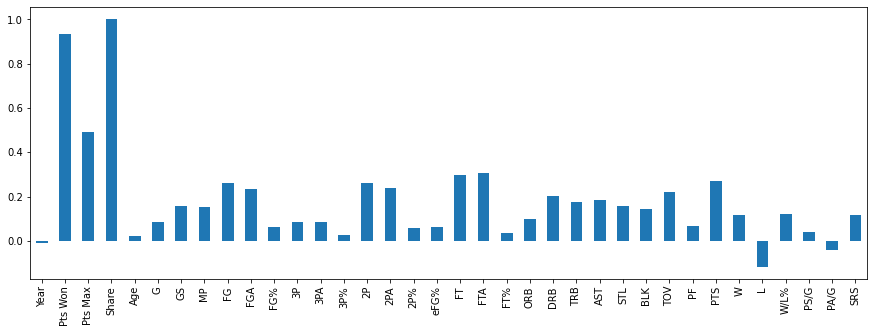

In [ ]:
plt.figure(figsize=(15,5))
mvps_combine.corr()["Share"].plot.bar()

> Kita perlu mengabaikan Pts Won, Pts MAx, dan Share karena ketiga variabel tersebut merupakan berkaitan dengan poin voting MVP.

> Berdasarkan bar plot diatas, terlihat bahwa yang paling berkorelasi terhadap share adalah FG, FT, dan PTS.

> Dapat disimpulkan bahwa yang faktor utama seseorang menjadi MVP adalah banyaknya rerata field goal, free throw, dan points dari pemain tersebut dalam suatu musim.

##### 2. Apakah terdapat kenaikan rata-rata gaji pemain dari tahun 2000 - 2019?

> Untuk menjawab pertanyaan ini, kami membuat dua kasus:
1. Tanpa mempertimbangkan inflasi
2. Dengan mempertimbangkan inflasi

Untuk keduanya, hanya diperlukan dataset salaries dan ide kami adalah dengan mencari rata-rata gaji setiap tahunnya lalu divisualisasikan menggunakan line plot.

Karena dataset salaries sudah melalui tahapan cleaning, kita bisa langsung mengolahnya.

**1. Tanpa mempertimbangkan inflasi**

In [ ]:
# melakukan groupby tahun dan menghitung mean dari salaries pada masing-masing tahun
salaries_grouped = pd.DataFrame(salaries.groupby('Year', as_index=False)['Salaries'].mean())
salaries_grouped

Year      Salaries
0   2000  4.232653e+06
1   2001  3.304929e+06
2   2002  3.463517e+06
3   2003  3.702468e+06
4   2004  3.684160e+06
5   2005  3.773688e+06
6   2006  3.961305e+06
7   2007  3.917887e+06
8   2008  4.400601e+06
9   2009  4.692348e+06
10  2010  4.633963e+06
11  2011  4.413547e+06
12  2012  4.354508e+06
13  2013  4.274056e+06
14  2014  4.322504e+06
15  2015  4.293243e+06
16  2016  4.708117e+06
17  2017  5.442311e+06
18  2018  5.729243e+06
19  2019  7.010580e+06

Setelah didapatkan rata-rata gaji dari setiap tahun, untuk bisa melihat apakah terdapat kenaikan rata-rata gaji, lebih baik menggunakan visualisasi data. Untuk itu, kami memilih untuk menampilkan datanya menggunakan line plot agar dapat melihat kenaikan trend dengan lebih baik.

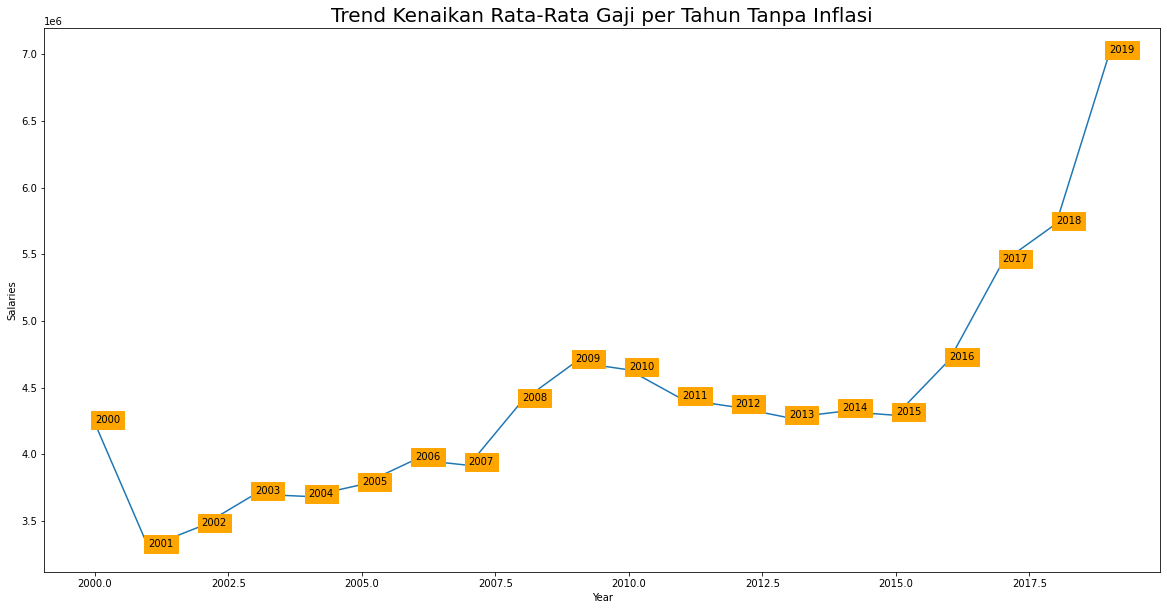

In [ ]:
#visualisasi data menggunakan line plot
plt.figure(figsize=(20,10))
plt.title("Trend Kenaikan Rata-Rata Gaji per Tahun Tanpa Inflasi", size=20)
sns.lineplot(data=salaries_grouped, x='Year', y='Salaries', markers="x")
for x, y in zip(salaries_grouped['Year'], salaries_grouped['Salaries']):
  plt.text(x = x, y = y-150, s = x, color = 'black').set_backgroundcolor('orange')

> Dari plot di atas, dapat disimpulkan bahwa rata-rata gaji pemain dari tahun 2000-2019 tanpa mempertimbangkan inflasi cenderung mengalami peningkatan walaupun ada saat dimana terlihat fluktuatif.

**2. Dengan mempertimbangkan inflasi**

In [ ]:
#melakukan groupby tahun dan menghitung mean dari salaries pada masing-masing tahun
salaries_inflation_grouped = pd.DataFrame(salaries_inflation.groupby('Year', as_index=False)['salaries_converted'].mean())
salaries_inflation_grouped

Year  salaries_converted
0   2000        6.497122e+06
1   2001        4.907820e+06
2   2002        5.001319e+06
3   2003        5.261207e+06
4   2004        5.120982e+06
5   2005        5.105799e+06
6   2006        5.185348e+06
7   2007        4.967881e+06
8   2008        5.425941e+06
9   2009        5.569817e+06
10  2010        5.523684e+06
11  2011        5.172677e+06
12  2012        4.946721e+06
13  2013        4.757024e+06
14  2014        4.741786e+06
15  2015        4.636702e+06
16  2016        5.080058e+06
17  2017        5.796061e+06
18  2018        5.975601e+06
19  2019        7.136770e+06

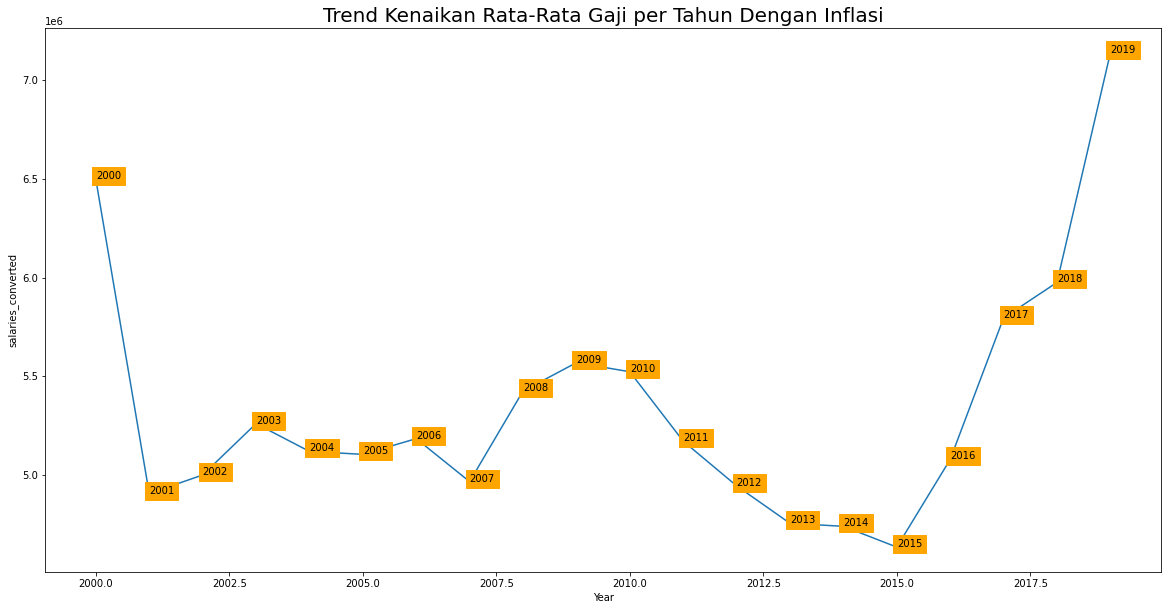

In [ ]:
#visualisasi data menggunakan line plot
plt.figure(figsize=(20,10))
plt.title("Trend Kenaikan Rata-Rata Gaji per Tahun Dengan Inflasi", size=20)
sns.lineplot(data=salaries_inflation_grouped, x='Year', y='salaries_converted', markers="x")
for x, y in zip(salaries_inflation_grouped['Year'], salaries_inflation_grouped['salaries_converted']):
  plt.text(x = x, y = y-150, s = x, color = 'black').set_backgroundcolor('orange')

> Dari plot di atas, dapat disimpulkan bahwa rata-rata gaji pemain dari tahun 2000-2019 dengan mempertimbangkan inflasi sangat fluktuatif, terlebih pada awal tahun hingga tahun 2010. Dapat dilihat bahwa dari tahun 2010, tren kenaikan gaji menurun, tetapi mulai tahun 2015 trennya sudah lebih cenderung meningkat.

##### 3. Apakah kemenangan dari suatu tim dapat dikorelasikan dengan suatu variabel tertentu?

> Hasil penentuan ini didapatkan dari pencarian korelasi antara variabel dependen (`W`) dan semua variabel independen lainnya pada dataset players_teams_combine_grouped.



Karena dataset players_teams_combine_grouped sudah melalui tahapan pre processing, kita bisa langsung mencari korelasinya.

In [ ]:
players_teams_combine_grouped.head()

Age          G         GS         MP        FG       FGA        FG%  \
0  27.692308  64.230769  31.538462  20.553846  3.407692  7.407692  41.769928   
1  27.466667  52.200000  27.333333  19.513333  3.526667  7.080000  46.061501   
2  25.800000  58.200000  27.600000  20.033333  3.080000  6.813333  44.319416   
3  26.583333  74.833333  34.166667  21.125000  3.841667  7.558333  49.151488   
4  26.000000  51.187500  25.812500  21.418750  3.462500  7.481250  43.497039   

         3P       3PA        3P%  ...       BLK       TOV        PF       PTS  \
0  0.261538  0.830769  20.313557  ...  0.400000  1.276923  1.861538  9.192308   
1  0.113333  0.400000   8.292929  ...  0.586667  1.353333  1.806667  8.860000   
2  0.120000  0.400000  11.757576  ...  0.333333  1.193333  2.053333  7.793333   
3  0.166667  0.450000  16.919192  ...  0.475000  1.233333  1.900000  9.550000   
4  0.218750  0.650000  19.247159  ...  0.450000  1.412500  1.812500  9.006250   

      W     L       W/L%   PS/G   PA/G   SRS  
0  43.0  39.0  52.439024  109.8  109.0  0.72  
1  56.0  26.0  68.292683  111.5  105.7  5.22  
2  26.0  56.0  31.707317  102.8  108.0 -4.95  
3  61.0  21.0  74.390244  110.0  101.0  8.57  
4  33.0  49.0  40.243902  101.7  104.2 -2.33  

[5 rows x 32 columns]

In [ ]:
players_teams_combine_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     906 non-null    float64
 1   G       906 non-null    float64
 2   GS      906 non-null    float64
 3   MP      906 non-null    float64
 4   FG      906 non-null    float64
 5   FGA     906 non-null    float64
 6   FG%     906 non-null    float64
 7   3P      906 non-null    float64
 8   3PA     906 non-null    float64
 9   3P%     906 non-null    float64
 10  2P      906 non-null    float64
 11  2PA     906 non-null    float64
 12  2P%     906 non-null    float64
 13  eFG%    906 non-null    float64
 14  FT      906 non-null    float64
 15  FTA     906 non-null    float64
 16  FT%     906 non-null    float64
 17  ORB     906 non-null    float64
 18  DRB     906 non-null    float64
 19  TRB     906 non-null    float64
 20  AST     906 non-null    float64
 21  STL     906 non-null    float64
 22  BL

Karena semua kolom sudah berupa numerik diubah menjadi numerikal, maka dapat dilakukan visualisasi data untuk melihat korelasi antara variable independent dengan variable dependent pada kasus. Pada kasus ini, kami menampilkan hasil perhitungan korelasi menggunakan pearson r yang akan divisualisasikan menggunakan heatmap.

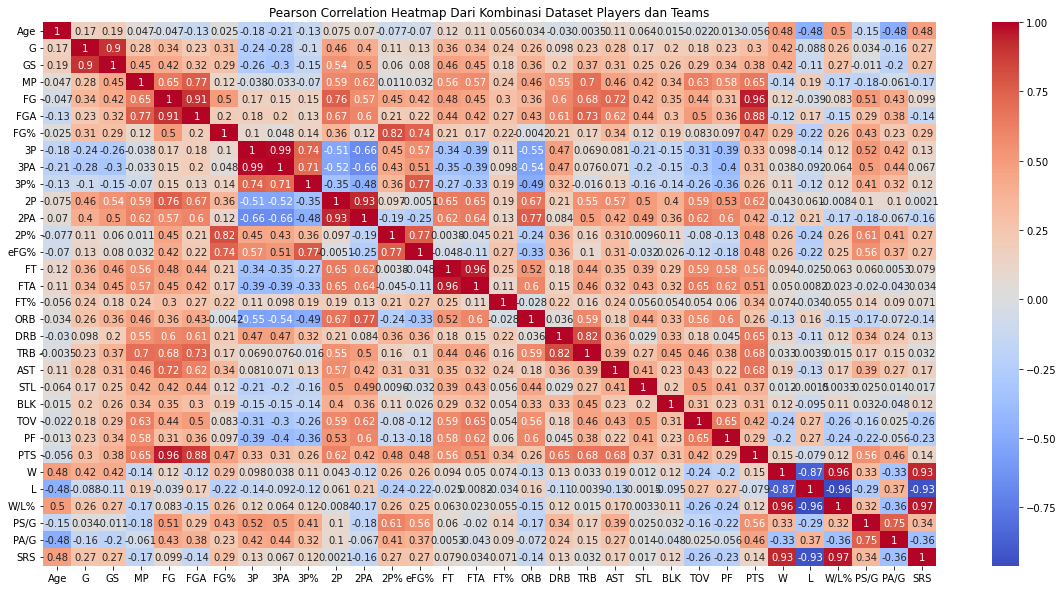

In [ ]:
#visualisasi korelasi variable menggunakan heatmap
plt.figure(figsize=(20,10))
plt.title("Pearson Correlation Heatmap Dari Kombinasi Dataset Players dan Teams")
cor = players_teams_combine_grouped.corr(method='pearson')
heatmap = sns.heatmap(cor, annot=True, cmap='coolwarm')

Dari visualisasi heatmap menggunakan Pearson di atas, didapatkan nilai tingkatan korelasi antarvariable. Baris keenam dari bawah pada heatmap memperlihatkan nilai korelasi antara variable-variable independent lainnya dengan variable dependent `W`.

In [ ]:
players_teams_combine_grouped.corr()["W"]

Age     0.481856
G       0.416029
GS      0.420071
MP     -0.138630
FG      0.123007
FGA    -0.115916
FG%     0.287980
3P      0.097785
3PA     0.038114
3P%     0.111127
2P      0.042748
2PA    -0.120100
2P%     0.259016
eFG%    0.260437
FT      0.094015
FTA     0.049896
FT%     0.074306
ORB    -0.130284
DRB     0.129488
TRB     0.032852
AST     0.194656
STL     0.012419
BLK     0.118679
TOV    -0.239833
PF     -0.200298
PTS     0.150592
W       1.000000
L      -0.866582
W/L%    0.963717
PS/G    0.328077
PA/G   -0.326681
SRS     0.932137
Name: W, dtype: float64

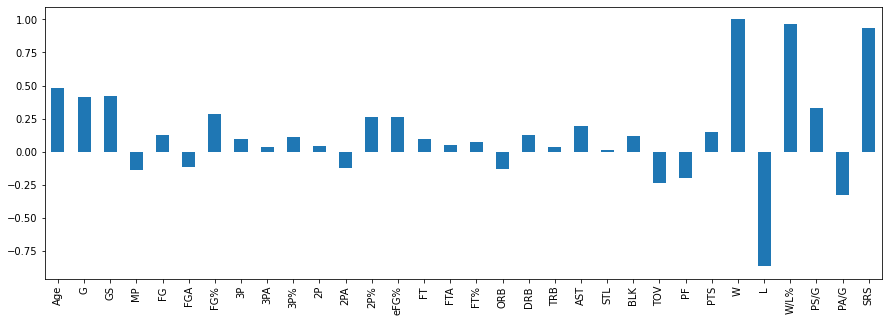

In [ ]:
plt.figure(figsize=(15,5))
players_teams_combine_grouped.corr()["W"].plot.bar()

> Kesimpulannya, berdasarkan hasil visualisasi data, karena tidak ada hasil korelasi yang bernilai 0, disimpulkan bahwa kemenangan dari suatu tim atau yang direpresentasikan oleh variable `W` berkorelasi dengan variable lainnya, hanya saja tergantung apakah jenis korelasinya positif atau negatif dan apakah tergolong besar, moderate, atau kecil.

> Dari hasil visualisasi di atas yang mengukur tingkatan korelasi antarvariable berdasarkan metode Pearson r, terdapat empat variable yang berkorelasi positif dengan target variable, yaitu `SRS`, `Age`, `G` dan `GS` dengan mengabaikan `W/L%` karena hanya berupa persentase menang dan kalah tim tersebut.

> Maka dari itu, dapat disimpulkan bahwa yang dapat menentukan `W` adalah `SRS` (very strong), `Age` (moderate), `G` (moderate), dan `GS` (moderate).

##### 4. Tahun berapakah yang merupakan tahun yang paling kompetitif untuk liga NBA?

Menurut asumsi kami, kata `tahun yang paling kompetitif pada liga NBA` adalah tahun yang memiliki rata rata jarak kemenangan antar tim yang dekat, dan juga memiliki jumlah akumulasi SRS dari semua tim yang mendekati 0. Hal ini dikarenakan definisi dari SRS tersebut adalah selisih nilai team mencetak skor dengan nilai team kebobolan skor. jadi semakin SRS mendekati 0, maka semakin kompetitif suatu permainan. Selain itu juga semakin dekat jarak kemenangan antar tim, maka semakin seru sebuah musim. oleh karena itu saya berencana untuk mengolah data teams untuk menemukan tahun paling kompetitif pada liga NBA

In [ ]:
# Melakukan sort data win pertahun
teams_grouped_year = teams.groupby('Year')

sorted_teams = teams_grouped_year.apply(lambda _df: _df.sort_values(by=['W'], ascending=False))
sorted_teams = sorted_teams.drop(['Year'], inplace=False, axis=1).reset_index()
sorted_teams = sorted_teams.drop(['level_1'], inplace=False, axis=1)
sorted_teams

Year   W   L       W/L%   PS/G   PA/G    SRS                    Team
0    1991  63  19  76.829268  114.7  106.0   8.47  Portland Trail Blazers
1    1991  61  21  74.390244  110.0  101.0   8.57           Chicago Bulls
2    1991  58  24  70.731707  106.3   99.6   6.73      Los Angeles Lakers
3    1991  56  26  68.292683  111.5  105.7   5.22          Boston Celtics
4    1991  55  27  67.073171  114.0  107.5   6.49            Phoenix Suns
..    ...  ..  ..        ...    ...    ...    ...                     ...
901  2021  22  50  30.555556  105.0  115.6 -10.13   Oklahoma City Thunder
902  2021  22  50  30.555556  103.8  112.3  -8.19     Cleveland Cavaliers
903  2021  21  51  29.166667  104.0  113.3  -9.02           Orlando Magic
904  2021  20  52  27.777778  106.6  111.1  -4.38         Detroit Pistons
905  2021  17  55  23.611111  108.8  116.7  -7.50         Houston Rockets

[906 rows x 8 columns]

In [ ]:
# Menghitung rata rata selisih win team pertahun
yearly_competitive_stats = {'Year': [], 'Mean Win Range': []}
temp_list_selisih = []
for i in range(len(sorted_teams) - 2):
  team = sorted_teams.loc[sorted_teams.index[i]]
  if (team['Year'] not in yearly_competitive_stats['Year']):
    yearly_competitive_stats['Year'].append(team['Year'])

  if (
      sorted_teams.loc[sorted_teams.index[i + 1]]['Year'] not in yearly_competitive_stats['Year'] or
      i == len(sorted_teams) - 3
    ):
    yearly_competitive_stats['Mean Win Range'].append(sum(temp_list_selisih) / len(temp_list_selisih))
    temp_list_selisih = []
  else:
    tempSelisih = team['W'] - sorted_teams.loc[sorted_teams.index[i + 1]]['W']
    temp_list_selisih.append(tempSelisih)


df_yearly_competitive_stats = pd.DataFrame(yearly_competitive_stats)
df_yearly_competitive_stats.head()

Year  Mean Win Range
0  1991        1.653846
1  1992        2.000000
2  1993        1.961538
3  1994        1.923077
4  1995        1.730769

In [ ]:
# memasukkan total srs team per tahun dan di absolute
df_yearly_competitive_stats['tot_SRS'] = teams_grouped_year['SRS'].sum().reset_index()['SRS'].apply(abs)
df_yearly_competitive_stats.head()

Year  Mean Win Range       tot_SRS
0  1991        1.653846  9.000000e-02
1  1992        2.000000  4.000000e-02
2  1993        1.961538  1.000000e-02
3  1994        1.923077  8.881784e-16
4  1995        1.730769  1.400000e-01

> Memvisualisasi hasi olahan data, untuk melihat dan menarik kesimpulan dari informasi pada data

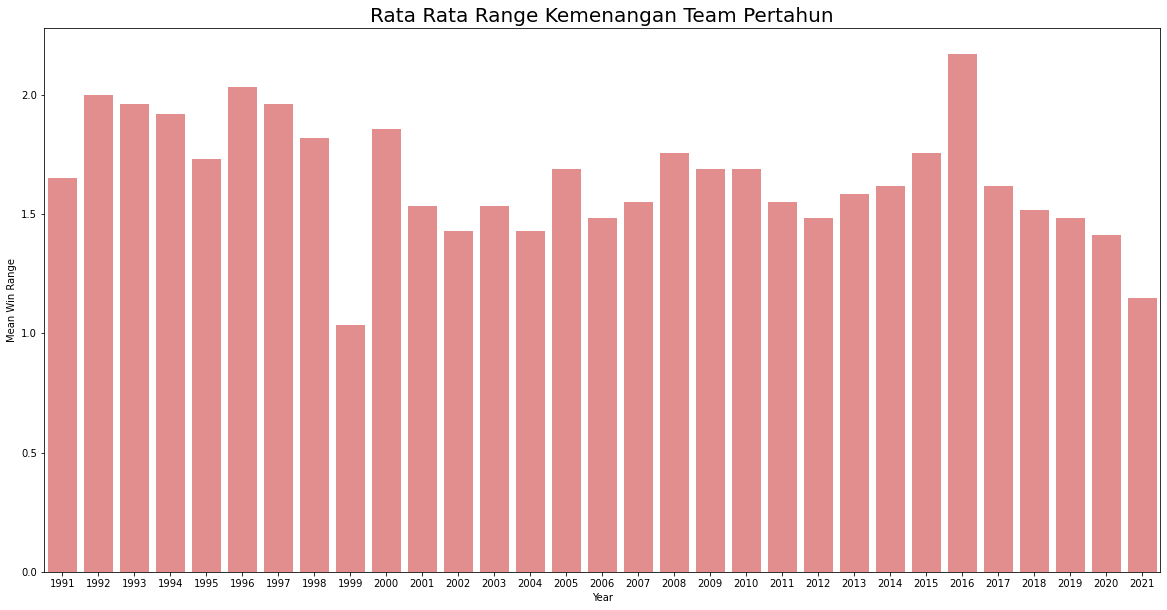

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Rata Rata Range Kemenangan Team Pertahun", size=20)
sns.barplot(
    x='Year',
    y='Mean Win Range',
    data=df_yearly_competitive_stats,
    color='lightcoral'
  )
plt.show()

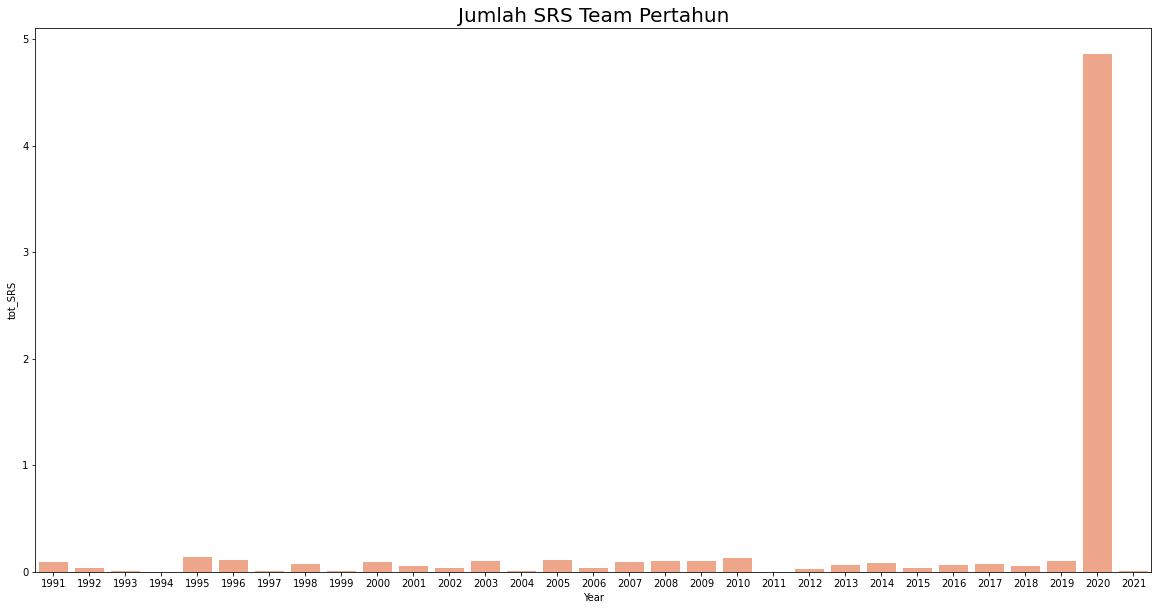

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Jumlah SRS Team Pertahun", size=20)
sns.barplot(
    x='Year',
    y='tot_SRS',
    data=df_yearly_competitive_stats,
    color='lightsalmon'
  )
plt.show()

In [ ]:
df_yearly_competitive_stats.sort_values('tot_SRS').head()

Year  Mean Win Range       tot_SRS
20  2011        1.551724  0.000000e+00
3   1994        1.923077  8.881784e-16
2   1993        1.961538  1.000000e-02
6   1997        1.964286  1.000000e-02
8   1999        1.035714  1.000000e-02

In [ ]:
df_yearly_competitive_stats.sort_values('Mean Win Range').head()

Year  Mean Win Range  tot_SRS
8   1999        1.035714     0.01
30  2021        1.148148     0.01
29  2020        1.413793     4.86
13  2004        1.428571     0.01
11  2002        1.428571     0.04

> Dapat disimpulkan dari data visualisasi tahun terkompetitif pada liga NBA adalah tahun 1999, dengan rata rata jarak kemenangan antar tim selama satu musim paling rendang ditambah selisih skor cetak dan skor kebobolan rendah.

##### 5. Bagaimanakah pengaruh turnover terhadap win/lose percentage tim?

Disini kita akan mencari tau, ada kah pengaruh Turn Over pemain pada tim terhadap kemenangan tim nya pada suatu musim. Kita bisa melihatnya dengan menjumlahkan status TOV setiap players berdasarkan tahun dan team, lalu melihat korelasinya terhadap Win, Lose, dan Win/Lose persentage.

In [ ]:
mvps_combine_copy = mvps_combine.copy()

tov_players = mvps_combine_copy.groupby(['Year', 'Team'])
tov_players = tov_players['TOV'].sum().reset_index()

In [ ]:
tov_teams_combine = tov_players.merge(teams, how='outer', on=['Year', 'Team'])
tov_teams_combine.head()

Year                 Team   TOV   W   L       W/L%   PS/G   PA/G   SRS
0  1991        Atlanta Hawks  16.6  43  39  52.439024  109.8  109.0  0.72
1  1991       Boston Celtics  20.3  56  26  68.292683  111.5  105.7  5.22
2  1991    Charlotte Hornets  17.9  26  56  31.707317  102.8  108.0 -4.95
3  1991        Chicago Bulls  14.8  61  21  74.390244  110.0  101.0  8.57
4  1991  Cleveland Cavaliers  22.6  33  49  40.243902  101.7  104.2 -2.33

In [ ]:
tov_teams_combine[tov_teams_combine.isna().any(axis=1)]

Empty DataFrame
Columns: [Year, Team, TOV, W, L, W/L%, PS/G, PA/G, SRS]
Index: []

In [ ]:
tov_teams_combine = tov_teams_combine[['Year', 'Team', 'TOV', 'W', 'L', 'W/L%']]
tov_teams_combine.head()

Year                 Team   TOV   W   L       W/L%
0  1991        Atlanta Hawks  16.6  43  39  52.439024
1  1991       Boston Celtics  20.3  56  26  68.292683
2  1991    Charlotte Hornets  17.9  26  56  31.707317
3  1991        Chicago Bulls  14.8  61  21  74.390244
4  1991  Cleveland Cavaliers  22.6  33  49  40.243902

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(tov_teams_combine[['TOV', 'W', 'L', 'W/L%']].corr(method='pearson'), annot = True)

Dapat dilihat bahwa banyak jumlah TOV yang dilakukan player dalam satu tim, tidak terlalu berpengaruh secara signifikan pada kekalahan dari tim player pada musim tersebut. Hal ini dibuktikan dengan jumlah tov player pada tim di musim nya,tidak terlalu mempengaruhi jumlah kekalahan tim pada musim tersebut. Pengaruh yang diberikan hanya sebesar 0.37, tetapi tetap saja hal ini tidak bisa dianggap tidak ada karena TOV juga mempengaruhi jumlah kemenangan walau pun sama seperti jumlah kekalahan yaitu tidak terlalu signifikan. Yaitu hanya 0.4 dengan pengaruh negatif.

##### 6. Bagaimanakah korelasi mvp dengan Win Lose Persentage tim pada suatu musim?

In [ ]:
mvps_team = mvps_combine[mvps_combine['Pts Won'] > 0]

In [ ]:
mvps_team = mvps_team.groupby(['Year', 'Team'])
mvps_team.apply(lambda _df: _df.sort_values(by=['W'], ascending=False)).head()

Player  Year  Pts Won  Pts Max   Share  \
Year Team                                                                    
1991 Atlanta Hawks  95   Dominique Wilkins  1991     29.0    960.0    0.03   
     Boston Celtics 108         Larry Bird  1991     25.0    960.0   26.00   
                    109      Robert Parish  1991     10.0    960.0    0.01   
                    110       Kevin McHale  1991      1.0    960.0    1.00   
     Chicago Bulls  0       Michael Jordan  1991    891.0    960.0  928.00   

                        Pos  Age   Tm   G  GS  ...  TOV   PF   PTS  \
Year Team                                      ...                   
1991 Atlanta Hawks  95   SF   31  ATL  81  81  ...  2.5  1.9  25.9   
     Boston Celtics 108  SF   34  BOS  60  60  ...  3.1  2.0  19.4   
                    109   C   37  BOS  81  81  ...  1.9  2.4  14.9   
                    110  PF   33  BOS  68  10  ...  2.1  2.9  18.4   
     Chicago Bulls  0    SG   27  CHI  82  82  ...  2.5  2.8  31.5   

                                   Team   W   L       W/L%   PS/G   PA/G   SRS  
Year Team                                                                       
1991 Atlanta Hawks  95    Atlanta Hawks  43  39  52.439024  109.8  109.0  0.72  
     Boston Celtics 108  Boston Celtics  56  26  68.292683  111.5  105.7  5.22  
                    109  Boston Celtics  56  26  68.292683  111.5  105.7  5.22  
                    110  Boston Celtics  56  26  68.292683  111.5  105.7  5.22  
     Chicago Bulls  0     Chicago Bulls  61  21  74.390244  110.0  101.0  8.57  

[5 rows x 40 columns]

In [ ]:
mvps_team = mvps_team['Player'].count().reset_index()
mvps_team

Year                    Team  Player
0    1991           Atlanta Hawks       1
1    1991          Boston Celtics       3
2    1991           Chicago Bulls       1
3    1991         Detroit Pistons       2
4    1991   Golden State Warriors       1
..    ...                     ...     ...
376  2021      Philadelphia 76ers       2
377  2021            Phoenix Suns       1
378  2021  Portland Trail Blazers       1
379  2021               Utah Jazz       1
380  2021      Washington Wizards       1

[381 rows x 3 columns]

In [ ]:
mvps_team = mvps_team.merge(teams, how='outer', on=['Year', 'Team'])
mvps_team['Player'] = mvps_team['Player'].fillna(0)
mvps_team

Year                   Team  Player   W   L       W/L%   PS/G   PA/G  \
0    1991          Atlanta Hawks     1.0  43  39  52.439024  109.8  109.0   
1    1991         Boston Celtics     3.0  56  26  68.292683  111.5  105.7   
2    1991          Chicago Bulls     1.0  61  21  74.390244  110.0  101.0   
3    1991        Detroit Pistons     2.0  50  32  60.975610  100.1   96.8   
4    1991  Golden State Warriors     1.0  44  38  53.658537  116.6  115.0   
..    ...                    ...     ...  ..  ..        ...    ...    ...   
901  2021       Sacramento Kings     0.0  31  41  43.055556  113.7  117.4   
902  2021      Memphis Grizzlies     0.0  38  34  52.777778  113.3  112.3   
903  2021      San Antonio Spurs     0.0  33  39  45.833333  111.1  112.8   
904  2021   New Orleans Pelicans     0.0  31  41  43.055556  114.6  114.9   
905  2021        Houston Rockets     0.0  17  55  23.611111  108.8  116.7   

      SRS  
0    0.72  
1    5.22  
2    8.57  
3    3.08  
4    1.72  
..    ...  
901 -3.45  
902  1.07  
903 -1.58  
904 -0.20  
905 -7.50  

[906 rows x 9 columns]

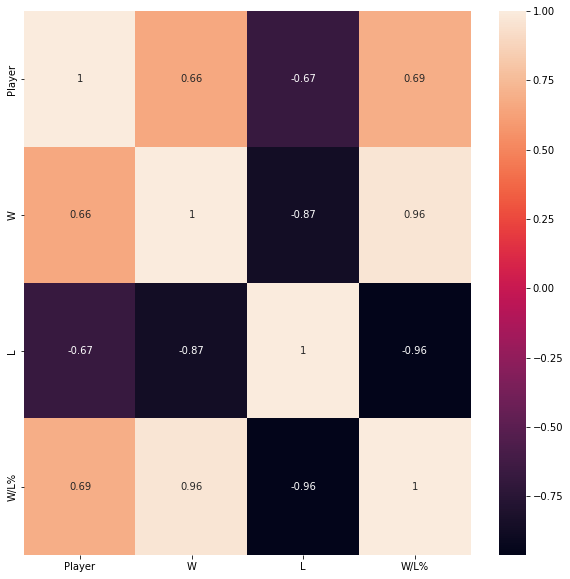

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(mvps_team[['Player', 'W', 'L', 'W/L%']].corr(method='pearson'), annot = True)

### **Data Modelling**

###### 1. **Buatlah model untuk memprediksi posisi dari seorang pemain (C, PF, SF, SG, PG)!**

In [ ]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split

In [ ]:
players.head()

Player Pos  Age   Tm   G  GS    MP   FG   FGA   FG%  ...  ORB  \
0      Alaa Abdelnaby  PF   22  POR  43   0  6.70 1.30  2.70 48.15  ... 0.60   
1  Mahmoud Abdul-Rauf  PG   21  DEN  67  19 22.50 6.20 15.10 41.06  ... 0.50   
2          Mark Acres   C   28  ORL  68   0 19.30 1.60  3.10 51.61  ... 2.10   
3       Michael Adams  PG   28  DEN  66  66 35.50 8.50 21.50 39.53  ... 0.90   
4        Mark Aguirre  SF   31  DET  78  13 25.70 5.40 11.70 46.15  ... 1.70   

   DRB  TRB   AST  STL  BLK  TOV   PF   PTS  Year  
0 1.40 2.10  0.30 0.10 0.30 0.50 0.90  3.10  1991  
1 1.30 1.80  3.10 0.80 0.10 1.60 2.20 14.10  1991  
2 3.20 5.30  0.40 0.40 0.40 0.60 3.20  4.20  1991  
3 3.00 3.90 10.50 2.20 0.10 3.60 2.50 26.50  1991  
4 3.10 4.80  1.80 0.60 0.30 1.60 2.70 14.20  1991  

[5 rows x 30 columns]

In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14104 entries, 0 to 18043
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  14104 non-null  object 
 1   Pos     14104 non-null  object 
 2   Age     14104 non-null  int64  
 3   Tm      14104 non-null  object 
 4   G       14104 non-null  int64  
 5   GS      14104 non-null  int64  
 6   MP      14104 non-null  float64
 7   FG      14104 non-null  float64
 8   FGA     14104 non-null  float64
 9   FG%     14104 non-null  float64
 10  3P      14104 non-null  float64
 11  3PA     14104 non-null  float64
 12  3P%     14104 non-null  float64
 13  2P      14104 non-null  float64
 14  2PA     14104 non-null  float64
 15  2P%     14104 non-null  float64
 16  eFG%    14104 non-null  float64
 17  FT      14104 non-null  float64
 18  FTA     14104 non-null  float64
 19  FT%     14104 non-null  float64
 20  ORB     14104 non-null  float64
 21  DRB     14104 non-null  float64
 22

In [ ]:
feature_players_pred_possition = players.drop(['Player', 'Tm'], axis=1)
feature_players_pred_possition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14104 entries, 0 to 18043
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pos     14104 non-null  object 
 1   Age     14104 non-null  int64  
 2   G       14104 non-null  int64  
 3   GS      14104 non-null  int64  
 4   MP      14104 non-null  float64
 5   FG      14104 non-null  float64
 6   FGA     14104 non-null  float64
 7   FG%     14104 non-null  float64
 8   3P      14104 non-null  float64
 9   3PA     14104 non-null  float64
 10  3P%     14104 non-null  float64
 11  2P      14104 non-null  float64
 12  2PA     14104 non-null  float64
 13  2P%     14104 non-null  float64
 14  eFG%    14104 non-null  float64
 15  FT      14104 non-null  float64
 16  FTA     14104 non-null  float64
 17  FT%     14104 non-null  float64
 18  ORB     14104 non-null  float64
 19  DRB     14104 non-null  float64
 20  TRB     14104 non-null  float64
 21  AST     14104 non-null  float64
 22

In [ ]:
feature_players_pred_possition['Pos'].unique()

array(['PF', 'PG', 'C', 'SF', 'SG'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder
encoder = LabelEncoder()

# transform and re-assign to feature_players_pred_possition
feature_players_pred_possition['Pos'] = encoder.fit_transform(feature_players_pred_possition['Pos'])
feature_players_pred_possition

Pos  Age   G  GS    MP   FG   FGA   FG%   3P  3PA  ...  ORB  DRB  TRB  \
0        1   22  43   0  6.70 1.30  2.70 48.15 0.00 0.00  ... 0.60 1.40 2.10   
1        2   21  67  19 22.50 6.20 15.10 41.06 0.40 1.50  ... 0.50 1.30 1.80   
2        0   28  68   0 19.30 1.60  3.10 51.61 0.00 0.00  ... 2.10 3.20 5.30   
3        2   28  66  66 35.50 8.50 21.50 39.53 2.50 8.50  ... 0.90 3.00 3.90   
4        3   31  78  13 25.70 5.40 11.70 46.15 0.30 1.00  ... 1.70 3.10 4.80   
...    ...  ...  ..  ..   ...  ...   ...   ...  ...  ...  ...  ...  ...  ...   
18037    2   28  63  39 27.70 3.80  8.20 46.34 1.00 2.70  ... 1.00 3.20 4.30   
18040    1   32  68  23 24.30 5.40  9.70 55.67 0.20 0.70  ... 2.50 3.80 6.20   
18041    2   22  63  63 33.70 7.70 17.70 43.50 2.20 6.30  ... 0.60 3.30 3.90   
18042    0   28  48  21 20.90 3.80  6.80 55.88 0.10 0.60  ... 2.50 4.40 6.80   
18043    0   23  72  33 22.30 3.60  5.50 65.45 0.00 0.10  ... 2.60 4.60 7.20   

        AST  STL  BLK  TOV   PF   PTS  Year  
0      0.30 0.10 0.30 0.50 0.90  3.10  1991  
1      3.10 0.80 0.10 1.60 2.20 14.10  1991  
2      0.40 0.40 0.40 0.60 3.20  4.20  1991  
3     10.50 2.20 0.10 3.60 2.50 26.50  1991  
4      1.80 0.60 0.30 1.60 2.70 14.20  1991  
...     ...  ...  ...  ...  ...   ...   ...  
18037  4.40 1.60 0.50 1.30 1.20 10.20  2021  
18040  4.30 1.10 0.60 2.00 2.20 12.10  2021  
18041  9.40 0.80 0.20 4.10 1.80 25.30  2021  
18042  1.80 0.60 0.40 1.10 2.50  9.40  2021  
18043  1.30 0.30 0.90 1.10 2.60  9.00  2021  

[14104 rows x 28 columns]

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(feature_players_pred_possition.corr(method='pearson'), annot = True)

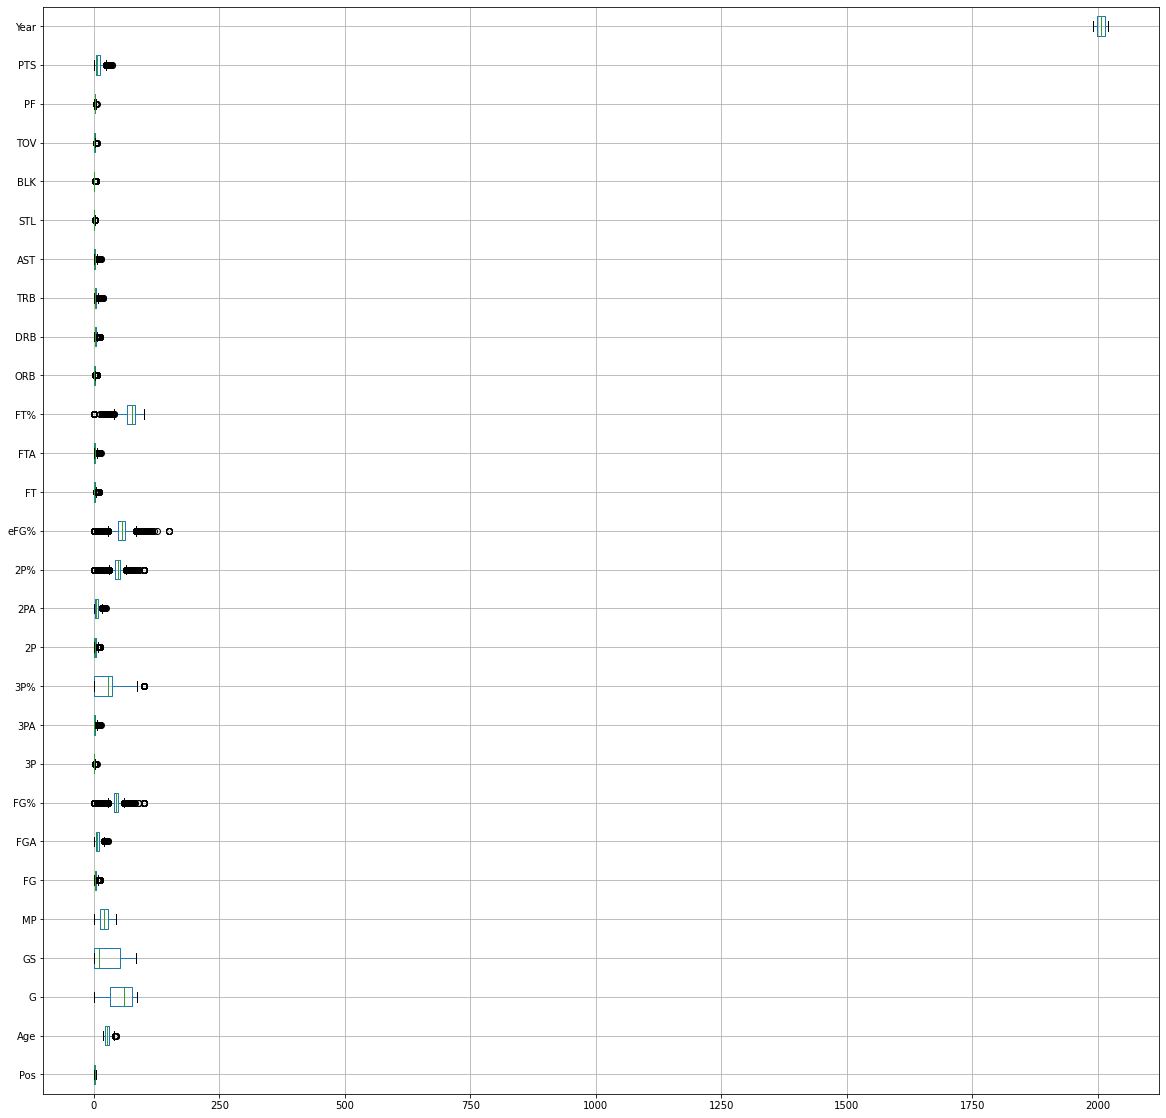

In [ ]:
feature_players_pred_possition.boxplot(vert=False, figsize=(20,20))

Drop beberapa feature yang tidak terlalu merepresentasikan posisi dari player, seperti Free Throw dan Age. Selanjutnya melakukan drop pada beberapa feature yang sudah di definisikan oleh feature lain seperti FG, TRB, 3P, dan 2P.

In [ ]:
feature_players_pred_possition.drop(['FT', 'FTA', 'FT%', 'Age'], axis=1, inplace=True)
feature_players_pred_possition.drop(['FG', 'TRB', '3P', '2P'], axis=1, inplace=True)

In [ ]:
label_pred_positions = feature_players_pred_possition['Pos']
feature_players_pred_possition.drop('Pos', axis=1, inplace=True)

label_pred_positions.head()

0    1
1    2
2    0
3    2
4    3
Name: Pos, dtype: int64

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector_feature = SelectKBest(f_classif, k=16) # kita akan memilih 12 variable terbaik dari features kita
feature_players_pred_possition_fix = selector_feature.fit_transform(
    feature_players_pred_possition,
    label_pred_positions
  )

input_features = selector_feature.feature_names_in_
selector_feature.get_feature_names_out(input_features=input_features)

array(['MP', 'FGA', 'FG%', '3PA', '3P%', '2PA', '2P%', 'eFG%', 'ORB',
       'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'], dtype=object)

In [ ]:
feature_train, feature_test, label_train, label_test = train_test_split(
    feature_players_pred_possition_fix,
    label_pred_positions,
    test_size = 0.15,
    random_state = 42
)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(feature_train, feature_test, label_train, label_test)
models

100%|██████████| 29/29 [01:27<00:00,  3.00s/it]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
SVC                                0.66               0.66    None      0.65   
LogisticRegression                 0.64               0.64    None      0.64   
LGBMClassifier                     0.63               0.63    None      0.63   
NuSVC                              0.63               0.63    None      0.63   
RandomForestClassifier             0.63               0.63    None      0.62   
CalibratedClassifierCV             0.62               0.62    None      0.61   
ExtraTreesClassifier               0.62               0.62    None      0.62   
XGBClassifier                      0.62               0.62    None      0.62   
LinearSVC                          0.61               0.61    None      0.59   
BaggingClassifier                  0.61               0.61    None      0.60   
LinearDiscriminantAnalysis         0.60               0.60    None      0.60   
KNeighborsClassifier               0.58               0.58    None      0.58   
SGDClassifier                      0.58               0.58    None      0.55   
AdaBoostClassifier                 0.58               0.58    None      0.56   
RidgeClassifier                    0.58               0.57    None      0.55   
RidgeClassifierCV                  0.58               0.57    None      0.55   
LabelPropagation                   0.56               0.56    None      0.56   
LabelSpreading                     0.56               0.56    None      0.56   
NearestCentroid                    0.53               0.53    None      0.52   
DecisionTreeClassifier             0.52               0.52    None      0.52   
GaussianNB                         0.52               0.52    None      0.49   
QuadraticDiscriminantAnalysis      0.51               0.51    None      0.49   
Perceptron                         0.49               0.49    None      0.50   
ExtraTreeClassifier                0.48               0.48    None      0.48   
BernoulliNB                        0.47               0.47    None      0.45   
PassiveAggressiveClassifier        0.47               0.47    None      0.47   
DummyClassifier                    0.21               0.20    None      0.07   

                               Time Taken  
Model                                      
SVC                                  7.56  
LogisticRegression                   1.09  
LGBMClassifier                       2.11  
NuSVC                               15.48  
RandomForestClassifier               3.15  
CalibratedClassifierCV              18.31  
ExtraTreesClassifier                 2.17  
XGBClassifier                        3.80  
LinearSVC                            4.91  
BaggingClassifier                    1.05  
LinearDiscriminantAnalysis           0.08  
KNeighborsClassifier                 0.97  
SGDClassifier                        0.42  
AdaBoostClassifier                   1.07  
RidgeClassifier                      0.17  
RidgeClassifierCV                    0.23  
LabelPropagation                     9.39  
LabelSpreading                      14.46  
NearestCentroid                      0.03  
DecisionTreeClassifier               0.17  
GaussianNB                           0.03  
QuadraticDiscriminantAnalysis        0.04  
Perceptron                           0.08  
ExtraTreeClassifier                  0.04  
BernoulliNB                          0.04  
PassiveAggressiveClassifier          0.08  
DummyClassifier                      0.03

Dari percobaan dengan menggunakan lazy predict classification, kami melihat terdapat 5 model terbaik yang bisa di pilih. Dari model tersebut, kami memilih 3 model pilihan yang dipelajar di kelas, yaitu linier regression (classifier), Random Forest Classifier, dan juga LGBM Classifier. Kami tidak mengambil SVC, karena menggunakan support vector based yang tidak dipelajari di kelas.

In [ ]:
encoder.inverse_transform([0, 1, 2, 3, 4])

array(['C', 'PF', 'PG', 'SF', 'SG'], dtype=object)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

**LGBM Classifier**

In [ ]:
import lightgbm as lgb
score = cross_val_score(lgb.LGBMClassifier(), feature_train, label_train, cv = kf, scoring="accuracy")
print(f'Scores for each fold: {score}')
print(np.mean(score))

Scores for each fold: [0.63636364 0.61968307 0.63386155 0.62494785 0.64288694]
0.6315486100745198


In [ ]:
clf = lgb.LGBMClassifier()
clf.fit(feature_train, label_train)

LGBMClassifier()

In [ ]:
label_pred=clf.predict(feature_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(label_test, label_pred)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy))

LightGBM Model accuracy score: 0.6352


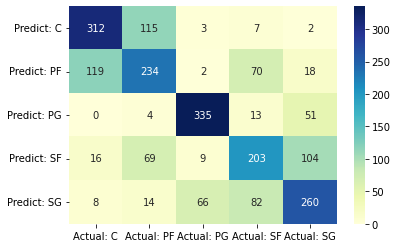

In [ ]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test, label_pred)
cm_matrix = pd.DataFrame(
    data=cm,
    columns=['Actual: C', 'Actual: PF', 'Actual: PG', 'Actual: SF', 'Actual: SG'],
    index=['Predict: C', 'Predict: PF', 'Predict: PG', 'Predict: SF', 'Predict: SG']
  )
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_test, label_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       439
           1       0.54      0.53      0.53       443
           2       0.81      0.83      0.82       403
           3       0.54      0.51      0.52       401
           4       0.60      0.60      0.60       430

    accuracy                           0.64      2116
   macro avg       0.63      0.64      0.63      2116
weighted avg       0.63      0.64      0.63      2116



**Parameter Tunning**

In [ ]:
model = lgb.LGBMClassifier()

# Buat parameter grid untuk Grid Search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 5, 10]
}

# Instansiasi Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Latih model menggunakan Grid Search
grid_search.fit(feature_train, label_train)

# Tampilkan hasil terbaik
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 31}


In [ ]:
modal = lgb.LGBMClassifier(
    learning_rate= 0.1,
    max_depth= -1,
    n_estimators= 200,
    num_leaves= 31
  )
score = cross_val_score(model, feature_train, label_train, cv = kf, scoring="accuracy")
print(f'Scores for each fold: {score}')
print(np.mean(score))

Scores for each fold: [0.63135947 0.63719766 0.64428691 0.62870254 0.64831039]
0.6379713939059911


In [ ]:
clf = lgb.LGBMClassifier(
    learning_rate= 0.1,
    max_depth= -1,
    n_estimators= 200,
    num_leaves= 31
  )
clf.fit(feature_train, label_train)

LGBMClassifier(n_estimators=200)

In [ ]:
label_pred=clf.predict(feature_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(label_test, label_pred)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy))

LightGBM Model accuracy score: 0.6437


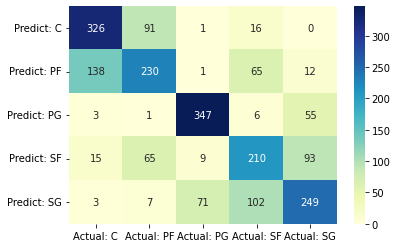

In [ ]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test, label_pred)
cm_matrix = pd.DataFrame(
    data=cm,
    columns=['Actual: C', 'Actual: PF', 'Actual: PG', 'Actual: SF', 'Actual: SG'],
    index=['Predict: C', 'Predict: PF', 'Predict: PG', 'Predict: SF', 'Predict: SG']
  )
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_test, label_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       434
           1       0.58      0.52      0.55       446
           2       0.81      0.84      0.83       412
           3       0.53      0.54      0.53       392
           4       0.61      0.58      0.59       432

    accuracy                           0.64      2116
   macro avg       0.64      0.64      0.64      2116
weighted avg       0.64      0.64      0.64      2116



**Logistic Regression (Classifier)**

In [ ]:
from sklearn.linear_model import LogisticRegression

score = cross_val_score(LogisticRegression(), feature_train, label_train, cv = kf, scoring="accuracy")
print(f'Scores for each fold: {score}')
print(np.mean(score))

Scores for each fold: [0.60967473 0.59924937 0.59174312 0.60867751 0.61201502]
0.6042719510035306


In [ ]:
lg_r_cls = LogisticRegression()
lg_r_cls.fit(feature_train, label_train)

LogisticRegression()

In [ ]:
label_pred = lg_r_cls.predict(feature_test)

In [ ]:
accuracy = accuracy_score(label_test, label_pred)
print('Logistic Regression Model accuracy score: {0:0.4f}'.format(accuracy))

Logistic Regression Model accuracy score: 0.6144


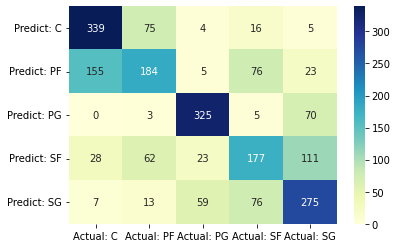

In [ ]:
cm = confusion_matrix(label_test, label_pred)
cm_matrix = pd.DataFrame(
    data=cm,
    columns=['Actual: C', 'Actual: PF', 'Actual: PG', 'Actual: SF', 'Actual: SG'],
    index=['Predict: C', 'Predict: PF', 'Predict: PG', 'Predict: SF', 'Predict: SG']
  )
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(label_test, label_pred))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       439
           1       0.55      0.42      0.47       443
           2       0.78      0.81      0.79       403
           3       0.51      0.44      0.47       401
           4       0.57      0.64      0.60       430

    accuracy                           0.61      2116
   macro avg       0.61      0.61      0.61      2116
weighted avg       0.61      0.61      0.61      2116



**Parameter Tunning**

In [ ]:
# Buat model Logistic Regression Classifier
model = LogisticRegression()

# Buat parameter grid untuk Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Instansiasi Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Latih model menggunakan Grid Search
grid_search.fit(feature_train, label_train)

# Tampilkan hasil terbaik
print(grid_search.best_params_)

{'C': 10, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
model = LogisticRegression(
    C=10,
    penalty='l2',
    solver='saga'
)

score = cross_val_score(model, feature_train, label_train, cv = kf, scoring="accuracy")
print(f'Scores for each fold: {score}')
print(np.mean(score))

Scores for each fold: [0.60508757 0.62427023 0.60633862 0.62119316 0.62619942]
0.6166177975457925


In [ ]:
lg_r_cls = LogisticRegression(
    C=10,
    penalty='l2',
    solver='saga'
)
lg_r_cls.fit(feature_train, label_train)

LogisticRegression(C=10, solver='saga')

In [ ]:
label_pred = lg_r_cls.predict(feature_test)

In [ ]:
accuracy = accuracy_score(label_test, label_pred)
print('Logistic Regression Model accuracy score: {0:0.4f}'.format(accuracy))

Logistic Regression Model accuracy score: 0.6267


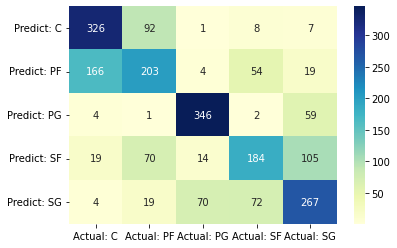

In [ ]:
cm = confusion_matrix(label_test, label_pred)
cm_matrix = pd.DataFrame(
    data=cm,
    columns=['Actual: C', 'Actual: PF', 'Actual: PG', 'Actual: SF', 'Actual: SG'],
    index=['Predict: C', 'Predict: PF', 'Predict: PG', 'Predict: SF', 'Predict: SG']
  )
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(label_test, label_pred))

              precision    recall  f1-score   support

           0       0.63      0.75      0.68       434
           1       0.53      0.46      0.49       446
           2       0.80      0.84      0.82       412
           3       0.57      0.47      0.52       392
           4       0.58      0.62      0.60       432

    accuracy                           0.63      2116
   macro avg       0.62      0.63      0.62      2116
weighted avg       0.62      0.63      0.62      2116



**Random Forest Tree Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

score = cross_val_score(RandomForestClassifier(n_estimators=100), feature_train, label_train, cv = kf, scoring="accuracy")
print(f'Scores for each fold: {score}')
print(np.mean(score))

Scores for each fold: [0.62760634 0.62427023 0.63594662 0.63078849 0.62953692]
0.6296297185493543


In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(feature_train, label_train)

RandomForestClassifier()

In [ ]:
label_pred = rf_clf.predict(feature_test)

In [ ]:
accuracy = accuracy_score(label_test, label_pred)
print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy))

Random Forest Model accuracy score: 0.6328


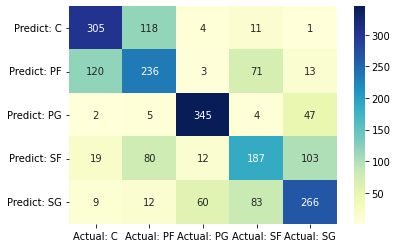

In [ ]:
cm = confusion_matrix(label_test, label_pred)
cm_matrix = pd.DataFrame(
    data=cm,
    columns=['Actual: C', 'Actual: PF', 'Actual: PG', 'Actual: SF', 'Actual: SG'],
    index=['Predict: C', 'Predict: PF', 'Predict: PG', 'Predict: SF', 'Predict: SG']
  )
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(label_test, label_pred))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       439
           1       0.52      0.53      0.53       443
           2       0.81      0.86      0.83       403
           3       0.53      0.47      0.49       401
           4       0.62      0.62      0.62       430

    accuracy                           0.63      2116
   macro avg       0.63      0.63      0.63      2116
weighted avg       0.63      0.63      0.63      2116



**Parameter Tunning**

In [ ]:
model = RandomForestClassifier()

# Buat parameter grid untuk Grid Search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instansiasi Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Latih model menggunakan Grid Search
grid_search.fit(feature_train, label_train)

# Tampilkan hasil terbaik
print(grid_search.best_params_)

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
model = RandomForestClassifier(
    max_depth= 15,
    min_samples_leaf= 1,
    min_samples_split= 5,
    n_estimators= 200
  )
score = cross_val_score(model, feature_train, label_train, cv = kf, scoring="accuracy")
print(f'Scores for each fold: {score}')
print(np.mean(score))

Scores for each fold: [0.63636364 0.62510425 0.63678065 0.64747601 0.63996662]
0.637138235415899


In [ ]:
rf_clf = RandomForestClassifier(
    max_depth= 15,
    min_samples_leaf= 1,
    min_samples_split= 5,
    n_estimators= 200
  )
rf_clf.fit(feature_train, label_train)

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=200)

In [ ]:
label_pred = rf_clf.predict(feature_test)

In [ ]:
accuracy = accuracy_score(label_test, label_pred)
print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy))

Random Forest Model accuracy score: 0.6314


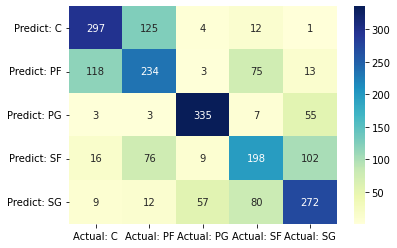

In [ ]:
cm = confusion_matrix(label_test, label_pred)
cm_matrix = pd.DataFrame(
    data=cm,
    columns=['Actual: C', 'Actual: PF', 'Actual: PG', 'Actual: SF', 'Actual: SG'],
    index=['Predict: C', 'Predict: PF', 'Predict: PG', 'Predict: SF', 'Predict: SG']
  )
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(label_test, label_pred))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67       439
           1       0.52      0.53      0.52       443
           2       0.82      0.83      0.83       403
           3       0.53      0.49      0.51       401
           4       0.61      0.63      0.62       430

    accuracy                           0.63      2116
   macro avg       0.63      0.63      0.63      2116
weighted avg       0.63      0.63      0.63      2116



**Mencari insight tambahan untuk menaikkan hasil evaluasi model**

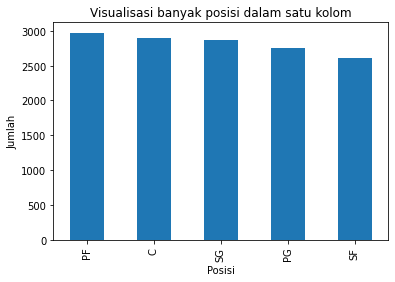

In [ ]:
# memvisualisasikan banyak label posisi yang ada
players['Pos'].value_counts().plot.bar()

# Tambahkan judul dan label sumbu x dan y
plt.title('Visualisasi banyak posisi dalam satu kolom')
plt.xlabel('Posisi')
plt.ylabel('Jumlah')

# Tampilkan plot
plt.show()

In [ ]:
players['Pos'].value_counts()

PF    2973
C     2893
SG    2875
PG    2748
SF    2615
Name: Pos, dtype: int64

In [ ]:
feature_train, feature_test, label_train, label_test = train_test_split(
    feature_players_pred_possition_fix,
    label_pred_positions,
    test_size = 0.15,
    random_state = 42,
    stratify = label_pred_positions
)

In [ ]:
label_train_check_value = label_train.copy()
label_train_check_value = pd.DataFrame({'Pos': encoder.inverse_transform(label_train_check_value)})

label_train_check_value['Pos'].value_counts()

PF    2527
C     2459
SG    2443
PG    2336
SF    2223
Name: Pos, dtype: int64

terdapat imbalance pada data, walau hanya sedikit. Mungkin jika kita membuat data sintetis baru untuk membuat batas lebih jelas bisa meningkatkan akurasi

In [ ]:
from imblearn.over_sampling import SVMSMOTE

# Instansiasi smote
smote = SVMSMOTE(random_state=42)

# Aplikasikan smote ke dataset
feature_train_resampled, label_train_resampled = smote.fit_resample(feature_train, label_train)

In [ ]:
label_train_resampled_check_value = label_train_resampled.copy()
label_train_resampled_check_value = pd.DataFrame({'Pos': encoder.inverse_transform(label_train_resampled_check_value)})

label_train_resampled_check_value['Pos'].value_counts()

PF    2527
SF    2527
C     2527
PG    2527
SG    2527
Name: Pos, dtype: int64

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(feature_train_resampled, label_train_resampled)

LGBMClassifier()

In [ ]:
label_pred=clf.predict(feature_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(label_test, label_pred)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy))

LightGBM Model accuracy score: 0.6356


In [ ]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test, label_pred)
cm_matrix = pd.DataFrame(
    data=cm,
    columns=['Actual: C', 'Actual: PF', 'Actual: PG', 'Actual: SF', 'Actual: SG'],
    index=['Predict: C', 'Predict: PF', 'Predict: PG', 'Predict: SF', 'Predict: SG']
  )
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_test, label_pred))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       434
           1       0.57      0.46      0.51       446
           2       0.81      0.83      0.82       412
           3       0.52      0.56      0.54       392
           4       0.61      0.56      0.58       432

    accuracy                           0.64      2116
   macro avg       0.63      0.64      0.63      2116
weighted avg       0.63      0.64      0.63      2116



Hasil sintetis data tidak begitu baik dikarenakan batas antara posisi rancu dengan data yang ada.

**Kesimpulan**

Hasil evaluasi model yang dibuat dari 3 model pilihan sudah berada pada angka yang cukup baik, yaitu pada akurasi 61% - 63%.

Menurut hasil evaluasi matriks, persisi hasil PG menunjukkan nilai yang cukup baik yaitu 79% - 81%. Timbul kerincuan pada persisi posisi lain dikarenakan memang secara statistik game pemain:
- C dan PF memiliki statistik yang kurang lebih mirip, dikarenakan memiliki gaya bermain yang sama yaitu bermain di dalam (). Jadi memiliki offensive rebound yang kurang lebih sama-sama tinggi.
- C, PF dan SF memiliki statistik permainan yang juga kurang lebih sama dikarenakan tingkat kemungkinan dan upaya mencetak 2 point yang kurang lebih sama sama tinggi.
- SF dan SG memiliki statistik permainan yang juga kurang lebih sama dikarenakan tingkat kemungkinan dan upaya mencetak 2 point dan 3 poin yang cukup tinggi keduanya.

Menurut saya, ada beberapa cara yang paling baik untuk meningkatkan akurasi dari model ini, terutama dengan menambahkan informasi pada dataset pemain. Menurut kami dibutuhkan data tambahan terkait dengan statistik pemain itu sendiri, tidak hanya statistik permainan pemain. Seperti tinggi badan, wing span, berat badan, dan massa otot. Hal ini dikarenakan ada beberapa posisi yang memiliki karakteristik tersendiri sesuai dengan statistik pemain, misalnya C yang biasanya memiliki tinggi badan yang lebih besar dari pada SG sedangkan PF yang memiliki performa badan yang lebih atletis di banding dengan SF.

Selain itu kita bisa juga menambahkan data statistik permainan pemain yang lebih mendefinisikan posisi seperti lama waktu memegang bola atau usaha menembak bola (tidak termasuk lay-up).

###### 2. **Buatlah model untuk memprediksi gaji dari seorang pemain!**

Sebelum membuat model, kita akan menyeusaikan data dengan model yang akan digunakan. Kami menghapus beberapa kolom yang sudah terwakilkan oleh kolom lainnya. Selain itu, dilakukan one-hot encoding pada fitur Pos (Position) karena regresi membutuhkan data numerikal

In [ ]:
players_salaries.drop(['Player', 'Tm', 'Rank', 'Salaries', 'Year', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA'],inplace=True, axis=1)
players_salaries.shape

(8077, 20)

In [ ]:
# Melakukan one-hot encoding data kategorikal

players_salaries = pd.get_dummies(players_salaries, drop_first=True)
players_salaries.head()

Age     G    GS    MP        FG%        3P%        2P%       eFG%  \
3725  24.0  82.0  82.0  37.4  45.348837  42.000000  46.721311  66.348837   
3726  23.0  27.0   0.0  13.4  28.571429  20.000000  30.000000  38.571429   
3729  29.0  82.0  82.0  31.6  44.166667  37.037037  46.236559  62.685185   
3735  31.0  82.0  82.0  31.6  43.382353  34.693878  48.275862  60.729292   
3738  30.0  59.0  23.0  19.9  43.333333   0.000000  42.372881  43.333333   

             FT%  ORB  ...  STL  BLK  TOV   PF   PTS  salaries_converted  \
3725   87.755102  1.0  ...  1.3  0.2  2.2  2.3  22.1          13815000.0   
3726  100.000000  0.2  ...  0.4  0.0  1.1  1.1   2.2            462035.0   
3729   77.419355  0.7  ...  1.7  0.1  1.6  2.8  14.0          10253800.0   
3735   90.000000  0.8  ...  2.1  0.1  3.0  1.7  16.2           6331875.0   
3738   69.565217  1.1  ...  0.3  0.6  1.8  2.2   6.7           7397165.0   

      Pos_PF  Pos_PG  Pos_SF  Pos_SG  
3725       0       0       0       1  
3726       0       1       0       0  
3729       0       1       0       0  
3735       0       1       0       0  
3738       0       0       0       0  

[5 rows x 23 columns]

In [ ]:
from lazypredict.Supervised import LazyRegressor

X = players_salaries.drop('salaries_converted', axis = 1)
Y = players_salaries['salaries_converted']

X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=.1, random_state=123)

In [ ]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|█████████████████████████████████████████| 42/42 [1:09:38<00:00, 99.50s/it]


In [ ]:
models

Adjusted R-Squared  R-Squared       RMSE  \
Model                                                                     
HistGradientBoostingRegressor                0.65       0.66 3559076.39   
LGBMRegressor                                0.64       0.65 3595437.09   
GradientBoostingRegressor                    0.64       0.65 3600876.00   
ExtraTreesRegressor                          0.64       0.65 3607230.21   
RandomForestRegressor                        0.63       0.64 3623327.87   
XGBRegressor                                 0.62       0.63 3704648.54   
BaggingRegressor                             0.61       0.62 3749889.23   
PoissonRegressor                             0.59       0.60 3852854.16   
Lars                                         0.58       0.59 3900351.84   
Lasso                                        0.57       0.59 3900495.04   
LassoLarsIC                                  0.57       0.59 3901554.69   
LassoCV                                      0.57       0.59 3901611.06   
LassoLarsCV                                  0.57       0.59 3901694.76   
Ridge                                        0.57       0.59 3901937.56   
RidgeCV                                      0.57       0.59 3902176.55   
LassoLars                                    0.57       0.59 3902452.90   
TransformedTargetRegressor                   0.57       0.59 3902900.91   
LinearRegression                             0.57       0.59 3902900.91   
BayesianRidge                                0.57       0.59 3903494.19   
SGDRegressor                                 0.57       0.58 3918069.05   
KNeighborsRegressor                          0.56       0.57 3957656.94   
OrthogonalMatchingPursuitCV                  0.55       0.56 4013349.58   
LarsCV                                       0.55       0.56 4017049.37   
HuberRegressor                               0.54       0.55 4067424.14   
OrthogonalMatchingPursuit                    0.51       0.52 4191758.06   
ElasticNet                                   0.51       0.52 4195134.57   
GammaRegressor                               0.50       0.51 4246678.71   
TweedieRegressor                             0.47       0.48 4362174.63   
GaussianProcessRegressor                     0.37       0.39 4736980.97   
ExtraTreeRegressor                           0.28       0.30 5075397.59   
PassiveAggressiveRegressor                   0.27       0.29 5103770.63   
DecisionTreeRegressor                        0.27       0.29 5129278.93   
RANSACRegressor                              0.24       0.26 5208562.46   
AdaBoostRegressor                            0.11       0.14 5638983.04   
ElasticNetCV                                -0.03       0.00 6061604.50   
DummyRegressor                              -0.03      -0.00 6066334.69   
NuSVR                                       -0.06      -0.04 6172583.00   
SVR                                         -0.17      -0.14 6480041.84   
QuantileRegressor                           -0.17      -0.14 6480339.34   
KernelRidge                                 -0.28      -0.25 6776902.60   
MLPRegressor                                -0.86      -0.81 8158187.11   
LinearSVR                                   -0.88      -0.83 8196222.37   

                               Time Taken  
Model                                      
HistGradientBoostingRegressor        0.58  
LGBMRegressor                        0.29  
GradientBoostingRegressor            2.30  
ExtraTreesRegressor                  4.01  
RandomForestRegressor                5.67  
XGBRegressor                         0.60  
BaggingRegressor                     0.84  
PoissonRegressor                     0.08  
Lars                                 0.02  
Lasso                                0.17  
LassoLarsIC                          0.03  
LassoCV                              0.23  
LassoLarsCV                          0.09  
Ridge                                0.02  
RidgeCV                   

> Berdasarkan hasil lazy regressor diatas, kami memutuskan menggunakan beberapa model terbaik yang yang masih termasuk tree-base dan juga menggunakan model yang sudah dipelajari dikelas. Model yang dipilih yaitu HistGradientBoostingRegressor, Random Forest Regressor, Lasso Regressor, dan Ridge Regressor. Berikut ini adalah implementasi dari beberapa model yang kami pilih :

In [ ]:
# membuat 5 fold yang akan digunakan sebagai cross validation terhadap X dan Y
kf =KFold(n_splits=5, shuffle=True, random_state=42)

**Histogram Gradient Boosting Regressor**

In [ ]:
score = cross_val_score(HistGradientBoostingRegressor(), X, Y, cv = kf, scoring="r2")
print(f'Scores for each fold: {score}')
print(np.mean(score))

Scores for each fold: [0.62217504 0.61220578 0.65979542 0.61746354 0.60392323]
0.6231125993779877


In [ ]:
hist_regressor = HistGradientBoostingRegressor()
hist_regressor.fit(X_train, y_train)

y_predict = hist_regressor.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_predict)
print('Histogram Gradient Boosting Regressor Model R2 score: {0:0.4f}'.format(r2))

Histogram Gradient Boosting Regressor Model R2 score: 0.6578


In [ ]:
# Visualisasi hasil prediksi
plt.figure
plt.scatter(y_test, y_predict)
plt.plot(y_test, y_test, color="red")
plt.show()

**Parameter Tuning**

In [ ]:
param_grid = {'learning_rate': [0.1, 0.01, 0.001],
              'max_depth': [3, 5, 7, 10, 20, 50]}

hist_regressor = GridSearchCV(HistGradientBoostingRegressor(), param_grid, cv=kf, scoring= 'r2')
hist_regressor.fit(X_train, y_train)

print(hist_regressor.best_params_)
print(hist_regressor.best_score_)

{'learning_rate': 0.1, 'max_depth': 10}
0.6151776918368161


In [ ]:
hist_regressor = HistGradientBoostingRegressor(learning_rate= 0.1, max_depth= 10)
hist_regressor.fit(X_train, y_train)

y_predict = hist_regressor.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_predict)
print('Histogram Gradient Boosting Regressor Model w/ hyperparameter tuning R2 score: {0:0.4f}'.format(r2))

Histogram Gradient Boosting Regressor Model w/ hyperparameter tuning R2 score: 0.6609


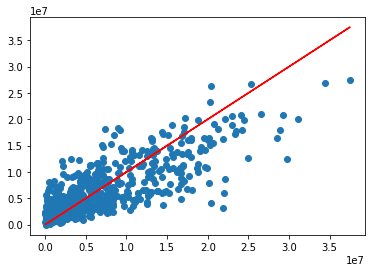

In [ ]:
# Visualisasi hasil prediksi
plt.figure
plt.scatter(y_test, y_predict)
plt.plot(y_test, y_test, color="red")
plt.show()

**Random Forest Regressor**

In [ ]:
score = cross_val_score(RandomForestRegressor(), X, Y, cv = kf, scoring="r2")
print(f'Scores for each fold: {score}')
print(np.mean(score))

Scores for each fold: [0.61868365 0.59711936 0.65350307 0.60115641 0.58889325]
0.6118711485146819


In [ ]:
rand_forest = RandomForestRegressor()
rand_forest.fit(X_train, y_train)

y_predict = rand_forest.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_predict)
print('Random Forest Regressor Model R2 score: {0:0.4f}'.format(r2))

Random Forest Regressor Model R2 score: 0.6440


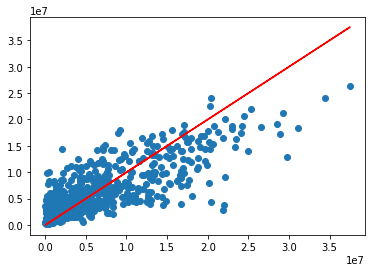

In [ ]:
# Visualisasi hasil prediksi
plt.figure
plt.scatter(y_test, y_predict)
plt.plot(y_test, y_test, color="red")
plt.show()

**Parameter Tuning**

In [ ]:
param_grid = {'n_estimators': [100, 500, 1000],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10]}

rand_forest_regressor = GridSearchCV(RandomForestRegressor(), param_grid, cv=kf, scoring='r2')
rand_forest_regressor.fit(X_train, y_train)

print(rand_forest_regressor.best_params_)
print(rand_forest_regressor.best_score_)

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 1000}
0.608093578530695


In [ ]:
rand_forest = RandomForestRegressor(max_depth= 15, min_samples_split = 2, n_estimators = 1000)
rand_forest.fit(X_train, y_train)

y_predict = rand_forest.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_predict)
print('Random Forest Regressor Model w/ hyperparameter tuning R2 score: {0:0.4f}'.format(r2))

Random Forest Regressor Model w/ hyperparameter tuning R2 score: 0.6471


In [ ]:
# Visualisasi hasil prediksi
plt.figure
plt.scatter(y_test, y_predict)
plt.plot(y_test, y_test, color="red")
plt.show()

**Lasso Regression**

In [ ]:
score = cross_val_score(Lasso(), X, Y, cv = kf, scoring="r2")
print(f'Scores for each fold: {score}')
print(np.mean(score))

Scores for each fold: [0.54080167 0.52865281 0.57913036 0.54266433 0.53284258]
0.544818351003995


In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)

y_predict = lasso.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_predict)
print('Lasso Regressor Model R2 score: {0:0.4f}'.format(r2))

Lasso Regressor Model R2 score: 0.5866


In [ ]:
# Visualisasi hasil prediksi
plt.figure
plt.scatter(y_test, y_predict)
plt.plot(y_test, y_test, color="red")
plt.show()

**Parameter Tuning**

In [ ]:
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0],
              'max_iter': [1000, 10000, 100000]}

lasso_regressor = GridSearchCV(Lasso(), param_grid, cv=kf, scoring='r2')
lasso_regressor.fit(X_train, y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 10.0, 'max_iter': 1000}
0.5403510251442902


In [ ]:
lasso = Lasso(alpha = 10.0, max_iter = 1000)
lasso.fit(X_train, y_train)

y_predict = lasso.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_predict)
print('Lasso Regressor Model w/ hyperparameter tuning R2 score: {0:0.4f}'.format(r2))

Lasso Regressor Model w/ hyperparameter tuning R2 score: 0.5866


In [ ]:
# Visualisasi hasil prediksi
plt.figure
plt.scatter(y_test, y_predict)
plt.plot(y_test, y_test, color="red")
plt.show()

**Ridge Regression**

In [ ]:
score = cross_val_score(Ridge(), X, Y, cv = kf, scoring="r2")
print(f'Scores for each fold: {score}')
print(np.mean(score))

Scores for each fold: [0.54086651 0.52876026 0.57913806 0.54279531 0.53257999]
0.5448280259076718


In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)

y_predict = ridge.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_predict)
print('Ridge Regressor Model R2 score: {0:0.4f}'.format(r2))

Ridge Regressor Model R2 score: 0.5862


In [ ]:
# Visualisasi hasil prediksi
plt.figure
plt.scatter(y_test, y_predict)
plt.plot(y_test, y_test, color="red")
plt.show()

**Parameter Tuning**

In [ ]:
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0],
              'max_iter': [1000, 10000, 100000]}

ridge_regressor = GridSearchCV(Ridge(), param_grid, cv=kf, scoring='r2')
ridge_regressor.fit(X_train, y_train)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 10.0, 'max_iter': 1000}
0.5403990559270484


In [ ]:
ridge = Ridge(alpha= 10.0, max_iter= 1000)
ridge.fit(X_train, y_train)

y_predict = ridge.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_predict)
print('Ridge Regressor Model w/ hyperparameter tuning R2 score: {0:0.4f}'.format(r2))

Ridge Regressor Model w/ hyperparameter tuning R2 score: 0.5865


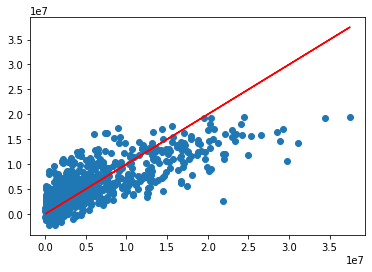

In [ ]:
# Visualisasi hasil prediksi
plt.figure
plt.scatter(y_test, y_predict)
plt.plot(y_test, y_test, color="red")
plt.show()

**Kesimpulan**

> * Berdasarkan keempat model yang dibuat, R2 score data testing berada pada kisaran 58% - 66%.
* Model terbaik adalah Histogram Gradient Boosting Regressor dengan R2 score 66%.
* Penggunaan hyperparameter tidak terlalu berdampak terhadap model karena peningkatan R2 score yang cukup kecil yaitu sekitar 0.01 saja.
* Berdasarkan analisa kami, model menghasilkan regresi yang cukup baik dan realistis berdasarkan dataset yang ada.
* Untuk meningkatkan kualitas dari model, diperlukan beberapa langkah tambahan seperti *feature engineering*, dan mencari informasi tambahan terkait pemain seperti tingkat popularitas, performa diluar NBA (Olimpiade / FIBA World Cup), kondisi kesehatan pemain, dan *behavior* pemain di luar lapangan.

###### 3. **Buatlah cluster dari dataset dan jelaskan karakteristik dari cluster-cluster yang terbentuk!**

> Untuk soal ini, kami memilih untuk melakukan clustering pada dataset players dengan melakukan percobaan clustering pada semua fitur dengan melakukan pca dengan 9 komponen serta pada beberapa pasangan fitur yang kami pilih untuk dihasilkan insight baru.

In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14104 entries, 0 to 18043
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  14104 non-null  object 
 1   Pos     14104 non-null  object 
 2   Age     14104 non-null  int64  
 3   Tm      14104 non-null  object 
 4   G       14104 non-null  int64  
 5   GS      14104 non-null  int64  
 6   MP      14104 non-null  float64
 7   FG      14104 non-null  float64
 8   FGA     14104 non-null  float64
 9   FG%     14104 non-null  float64
 10  3P      14104 non-null  float64
 11  3PA     14104 non-null  float64
 12  3P%     14104 non-null  float64
 13  2P      14104 non-null  float64
 14  2PA     14104 non-null  float64
 15  2P%     14104 non-null  float64
 16  eFG%    14104 non-null  float64
 17  FT      14104 non-null  float64
 18  FTA     14104 non-null  float64
 19  FT%     14104 non-null  float64
 20  ORB     14104 non-null  float64
 21  DRB     14104 non-null  float64
 22

Sebelum dilakukan scaling, kami melakukan *dropping* pada kolom yang tidak digunakan pada kasus ini, yaitu kolom `Player`, `Tm`, dan `Year`. Maka dari itu, tersisa 27 fitur yang akan dilakukan scaling dan PCA.

In [ ]:
selected_feat = players.drop(['Player', 'Tm', 'Year'], axis=1)
selected_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14104 entries, 0 to 18043
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pos     14104 non-null  object 
 1   Age     14104 non-null  int64  
 2   G       14104 non-null  int64  
 3   GS      14104 non-null  int64  
 4   MP      14104 non-null  float64
 5   FG      14104 non-null  float64
 6   FGA     14104 non-null  float64
 7   FG%     14104 non-null  float64
 8   3P      14104 non-null  float64
 9   3PA     14104 non-null  float64
 10  3P%     14104 non-null  float64
 11  2P      14104 non-null  float64
 12  2PA     14104 non-null  float64
 13  2P%     14104 non-null  float64
 14  eFG%    14104 non-null  float64
 15  FT      14104 non-null  float64
 16  FTA     14104 non-null  float64
 17  FT%     14104 non-null  float64
 18  ORB     14104 non-null  float64
 19  DRB     14104 non-null  float64
 20  TRB     14104 non-null  float64
 21  AST     14104 non-null  float64
 22

Karena kolom `Pos` masih bertipe kategorikal, perlu dilakukan encoding.

In [ ]:
selected_feat['Pos'] = encoder.fit_transform(selected_feat['Pos'])
selected_feat

Pos  Age   G  GS    MP   FG   FGA   FG%   3P  3PA  ...   FT%  ORB  DRB  \
0        1   22  43   0  6.70 1.30  2.70 48.15 0.00 0.00  ... 60.00 0.60 1.40   
1        2   21  67  19 22.50 6.20 15.10 41.06 0.40 1.50  ... 86.67 0.50 1.30   
2        0   28  68   0 19.30 1.60  3.10 51.61 0.00 0.00  ... 66.67 2.10 3.20   
3        2   28  66  66 35.50 8.50 21.50 39.53 2.50 8.50  ... 87.50 0.90 3.00   
4        3   31  78  13 25.70 5.40 11.70 46.15 0.30 1.00  ... 75.61 1.70 3.10   
...    ...  ...  ..  ..   ...  ...   ...   ...  ...  ...  ...   ...  ...  ...   
18037    2   28  63  39 27.70 3.80  8.20 46.34 1.00 2.70  ... 80.00 1.00 3.20   
18040    1   32  68  23 24.30 5.40  9.70 55.67 0.20 0.70  ... 58.82 2.50 3.80   
18041    2   22  63  63 33.70 7.70 17.70 43.50 2.20 6.30  ... 88.51 0.60 3.30   
18042    0   28  48  21 20.90 3.80  6.80 55.88 0.10 0.60  ... 72.00 2.50 4.40   
18043    0   23  72  33 22.30 3.60  5.50 65.45 0.00 0.10  ... 79.17 2.60 4.60   

       TRB   AST  STL  BLK  TOV   PF   PTS  
0     2.10  0.30 0.10 0.30 0.50 0.90  3.10  
1     1.80  3.10 0.80 0.10 1.60 2.20 14.10  
2     5.30  0.40 0.40 0.40 0.60 3.20  4.20  
3     3.90 10.50 2.20 0.10 3.60 2.50 26.50  
4     4.80  1.80 0.60 0.30 1.60 2.70 14.20  
...    ...   ...  ...  ...  ...  ...   ...  
18037 4.30  4.40 1.60 0.50 1.30 1.20 10.20  
18040 6.20  4.30 1.10 0.60 2.00 2.20 12.10  
18041 3.90  9.40 0.80 0.20 4.10 1.80 25.30  
18042 6.80  1.80 0.60 0.40 1.10 2.50  9.40  
18043 7.20  1.30 0.30 0.90 1.10 2.60  9.00  

[14104 rows x 27 columns]

Selanjutnya, dilakukan normalisasi menggunakan MinMaxScaler. Kami menggunakan MinMaxScaler agar tidak mengubah outlier yang ada.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_feat)

In [ ]:
# initialize PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)

PCA()

In [ ]:
# explained variants
explained_variants = pca.explained_variance_ratio_
explained_variants

array([4.86019560e-01, 1.91082059e-01, 6.58022606e-02, 4.77247821e-02,
       3.99591465e-02, 3.06945002e-02, 2.63293004e-02, 2.47442558e-02,
       1.89552407e-02, 1.57422734e-02, 1.51464833e-02, 8.22294350e-03,
       7.59753834e-03, 6.21574740e-03, 5.46868703e-03, 3.08936684e-03,
       2.63853906e-03, 1.98336904e-03, 1.65194741e-03, 4.91571678e-04,
       2.38778130e-04, 1.86279502e-04, 6.01846282e-06, 4.88623568e-06,
       2.88417220e-06, 1.58078023e-06, 9.58504575e-32])

Agar jumlah *principal component* yang baik lebih mudah dipilih, maka dilakukan *plotting*.

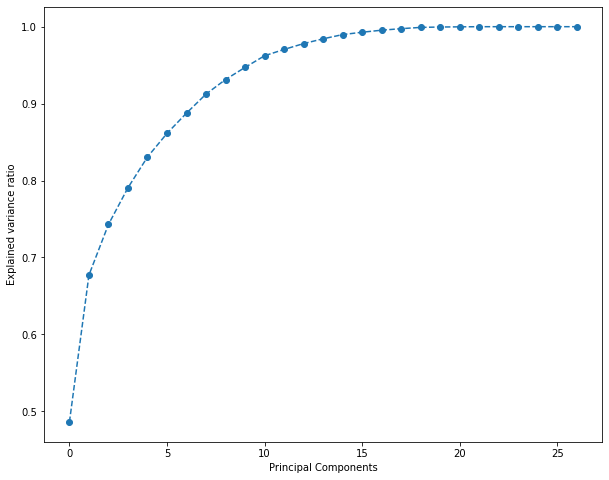

In [ ]:
# explained variance plot
plt.figure(figsize=(10, 8))
plt.plot(range(0, len(explained_variants)), explained_variants.cumsum(), marker = 'o', linestyle='--')
plt.xlabel('Principal Components')
plt.ylabel('Explained variance ratio')
plt.show()

Berdasarkan plot di atas, kami memilih untuk melakukan PCA dengan jumlah komponen = 9 karena sudah meng-*cover* 95% *variance* data.

In [ ]:
pca = PCA(n_components = 9)

In [ ]:
scaled_data_pca = pca.fit_transform(scaled_data)
scaled_data_pca

array([[-0.66024599,  0.27615776, -0.03229091, ..., -0.10245791,
        -0.06903537,  0.07541631],
       [ 0.34637873, -0.1052643 ,  0.06665456, ..., -0.13150716,
        -0.26587483,  0.10062244],
       [-0.26709279,  0.60431754, -0.27464127, ...,  0.15379501,
        -0.04963667, -0.08374371],
       ...,
       [ 1.22402001, -0.23317159,  0.41131913, ..., -0.21895867,
        -0.36861876,  0.13614794],
       [ 0.08284135,  0.5641734 ,  0.04272688, ...,  0.09513854,
         0.13543351,  0.0419727 ],
       [ 0.22419173,  0.67258835, -0.19986019, ..., -0.05281235,
         0.17306881,  0.0479823 ]])

In [ ]:
scaled_data_pca_df = pd.DataFrame(scaled_data_pca)
scaled_data_pca_df

0     1     2     3     4     5     6     7     8
0     -0.66  0.28 -0.03 -0.03  0.13 -0.14 -0.10 -0.07  0.08
1      0.35 -0.11  0.07  0.22  0.24 -0.15 -0.13 -0.27  0.10
2     -0.27  0.60 -0.27  0.08  0.19  0.03  0.15 -0.05 -0.08
3      1.43 -0.29  0.42  0.44 -0.29  0.02 -0.08 -0.51  0.12
4      0.42 -0.18 -0.01  0.11  0.38  0.13  0.28 -0.09  0.01
...     ...   ...   ...   ...   ...   ...   ...   ...   ...
14099  0.35 -0.12 -0.10  0.10 -0.17 -0.01  0.01 -0.01  0.08
14100  0.38  0.30 -0.00  0.13  0.06  0.03  0.34 -0.04  0.19
14101  1.22 -0.23  0.41  0.42 -0.15 -0.18 -0.22 -0.37  0.14
14102  0.08  0.56  0.04  0.21  0.06 -0.01  0.10  0.14  0.04
14103  0.22  0.67 -0.20  0.05  0.23 -0.12 -0.05  0.17  0.05

[14104 rows x 9 columns]

Untuk memilih jumlah kluster yang optimum, kami menggunakan silhouette score. Dapat dilihat dari perhitungan di bawah, jumlah cluster yang optimal adalah 2 cluster.

In [ ]:
# find the optimum k using silhouette score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

possible_k = [2, 3, 4, 5, 6, 7]

for k in possible_k:
    kmeans = KMeans(n_clusters = k, random_state=42, init = "k-means++").fit_predict(scaled_data_pca_df)
    sil_scr = silhouette_score(scaled_data_pca_df, kmeans)
    print(f"Silhouette score for k equals {k} is {sil_scr}")

Silhouette score for k equals 2 is 0.33038847630963875
Silhouette score for k equals 3 is 0.2453778236414386
Silhouette score for k equals 4 is 0.23244812018763025
Silhouette score for k equals 5 is 0.22632818052772605
Silhouette score for k equals 6 is 0.2179912613402635
Silhouette score for k equals 7 is 0.2154577307820661


In [ ]:
# predict the cluster labels
clusters_all_feat_3d = KMeans(n_clusters=2, random_state=42, init = "k-means++").fit(scaled_data_pca_df)
labels = clusters_all_feat_3d.predict(scaled_data_pca_df)

In [ ]:
scaled_data_pca_df['cluster'] = clusters_all_feat_3d.labels_
scaled_data_pca_df.head(20)

0     1     2     3     4     5     6     7     8  cluster
0  -0.66  0.28 -0.03 -0.03  0.13 -0.14 -0.10 -0.07  0.08        1
1   0.35 -0.11  0.07  0.22  0.24 -0.15 -0.13 -0.27  0.10        0
2  -0.27  0.60 -0.27  0.08  0.19  0.03  0.15 -0.05 -0.08        1
3   1.43 -0.29  0.42  0.44 -0.29  0.02 -0.08 -0.51  0.12        0
4   0.42 -0.18 -0.01  0.11  0.38  0.13  0.28 -0.09  0.01        0
5   0.13 -0.60 -0.25  0.17  0.22  0.07  0.30 -0.10  0.01        1
6  -0.35  0.19 -0.05  0.28  0.10  0.07 -0.10  0.00 -0.00        1
7  -0.62 -0.13 -0.06  0.22  0.06 -0.00 -0.16  0.11  0.17        1
8  -0.31  0.38 -0.15 -0.11  0.21 -0.04  0.14 -0.17 -0.10        1
9   0.61 -0.34  0.15 -0.23  0.34 -0.07  0.05  0.04  0.02        0
10  0.45 -0.18 -0.06  0.10  0.43  0.22  0.23 -0.11  0.07        0
11  0.95 -0.34  0.09 -0.34  0.17  0.07 -0.19  0.03  0.11        0
12 -0.29 -0.09 -0.17 -0.14  0.47 -0.03  0.01  0.02  0.02        1
13  0.03 -0.18 -0.31  0.29  0.22 -0.20  0.04 -0.21  0.18        1
14 -0.57 -0.37  0.37 -0.08  0.32  0.16 -0.18  0.17  0.03        1
15 -0.67 -0.25 -0.02 -0.15  0.07 -0.20  0.08  0.10  0.05        1
16 -0.92  0.22  0.24 -0.04 -0.06 -0.05 -0.27 -0.11 -0.04        1
17  0.42  0.36 -0.09  0.09  0.31  0.16  0.05 -0.20 -0.01        0
18 -0.92  0.20  0.14  0.17  0.03  0.07 -0.49  0.11 -0.10        1
19 -0.66  0.33 -0.07 -0.15 -0.00  0.01  0.20 -0.07  0.17        1

Untuk mempermudah visualisasi, kami hanya melakukan plotting 3d pada PC1, PC2, dan PC3.

In [ ]:
# create a 3D scatter plot of the data, with the clusters color-coded
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scaled_data_pca_df_arr = np.array(scaled_data_pca_df)

uniques = np.unique(labels)
for i in uniques:
  ax.scatter(scaled_data_pca_df_arr[labels == i , 0], scaled_data_pca_df_arr[labels == i , 1], scaled_data_pca_df_arr[labels == i , 2], label = i, cmap='viridis')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.legend()
plt.show()

In [ ]:
# compute the cluster sizes
sizes = scaled_data_pca_df['cluster'].value_counts()

# plotting the cluster sizes as a pie chart
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', colors=['#676ea0', '#ed6794', '#ffa600'], shadow=True)
plt.title('Persentase Cluster')
plt.axis('equal')
plt.show()

Dari hasil *plotting* dan perhitungan persentase pembagian kluster, dapat dilihat bahwa persentase kluster 1 lebih besar dari persentase kluster 0. Walaupun begitu, kami masih menemukan kesulitan dalam menginterpretasikan hasil *clustering* tersebut karena hanya direpresentasikan melalui *principal component*.

Maka dari itu, kami memilih empat pasangan fitur yang cukup berkorelasi untuk dilakukan clustering agar lebih mudah menghasilkan *insight* baru.
Pemilihan pasangan fitur tersebut antara lain:


1.   `FG` dan `MP`
2.   `FT` dan `2P`
3.   `2PA`, `3PA` dan `PTS`
4.   `BLK`, `STL` dan `DRB`



In [ ]:
insight1 = selected_feat[['FG', 'MP']]
insight2 = selected_feat[['FT', '2P']]
insight3 = selected_feat[['2PA', '3PA', 'PTS']]
insight4 = selected_feat[['BLK', 'STL', 'DRB']]

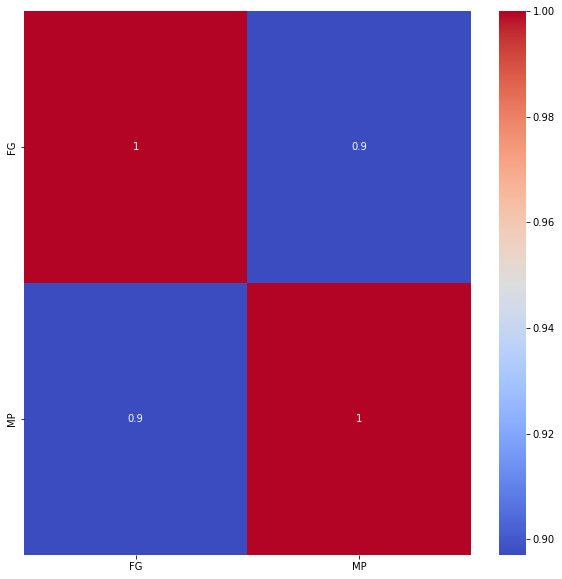

In [ ]:
# find the correlation between FG and MP
plt.figure(figsize=(10,10))
sns.heatmap(insight1.corr(method='pearson'), annot = True, cmap='coolwarm')

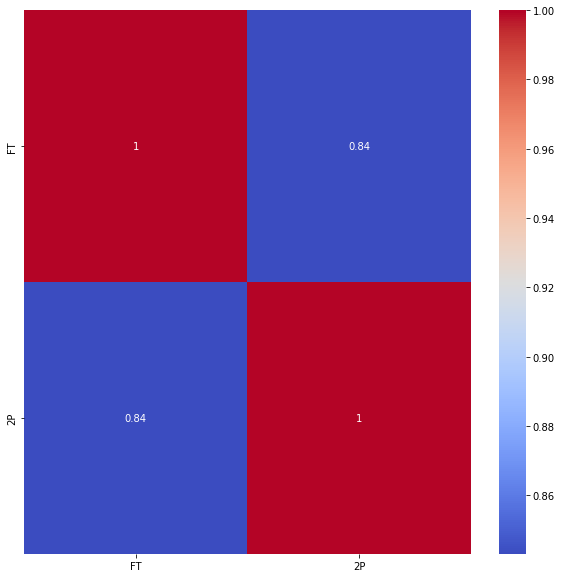

In [ ]:
# find the correlation between FT and 2P
plt.figure(figsize=(10,10))
sns.heatmap(insight2.corr(method='pearson'), annot = True, cmap='coolwarm')

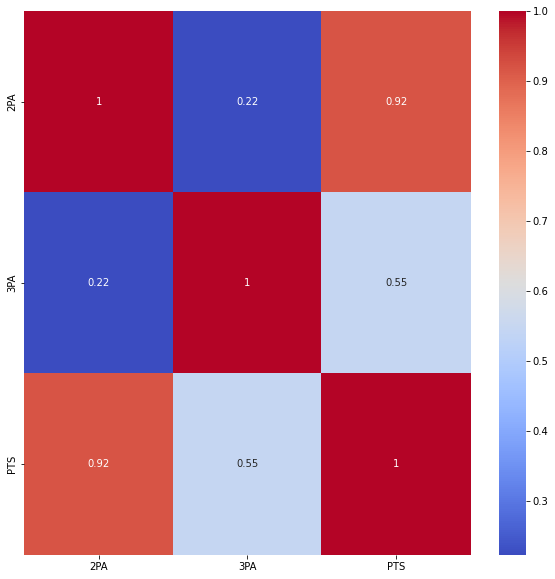

In [ ]:
# find the correlation between 2PA, 3PA, and PTS
plt.figure(figsize=(10,10))
sns.heatmap(insight3.corr(method='pearson'), annot = True, cmap='coolwarm')

In [ ]:
# find the correlation between BLK, STL, and DRB
plt.figure(figsize=(10,10))
sns.heatmap(insight4.corr(method='pearson'), annot = True, cmap='coolwarm')

In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Kali ini, untuk memilih jumlah kluster yang optimum, kami menggunakan elbow method.

In [ ]:
# find the optimum k using elbow method
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

def elbow_method(df):
  kelbow_visualizer(KMeans(random_state=42, init = "k-means++"), df, k=(1,11))

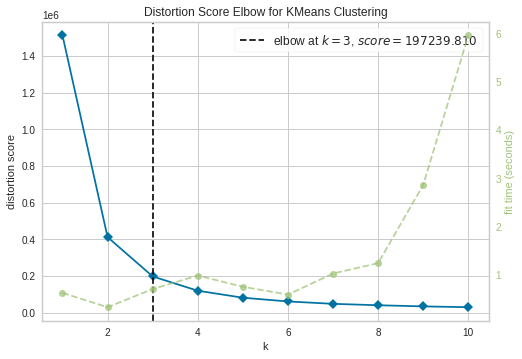

In [ ]:
elbow_method(insight1)

Berdasarkan hasil *plotting* elbow method di atas, didapat jumlah kluster yang optimum adalah 3. Maka dari itu, dibuat 3 kluster menggunakan algoritma kmeans. Setelah itu, ditampilkan visualisasi *plotting* kluster, persentase pembagian kluster, dan nilai rata-rata pada masing-masing fitur.

In [ ]:
# predict the cluster labels
clusters_insight1 = KMeans(n_clusters = 3, random_state=42, init = "k-means++").fit(insight1)
labels = clusters_insight1.predict(insight1)

In [ ]:
clusters_insight1_df = pd.concat([insight1.reset_index(drop=True), pd.DataFrame({'cluster':labels})], axis=1)
clusters_insight1_df

FG    MP  cluster
0     1.30  6.70        1
1     6.20 22.50        2
2     1.60 19.30        2
3     8.50 35.50        0
4     5.40 25.70        2
...    ...   ...      ...
14099 3.80 27.70        0
14100 5.40 24.30        2
14101 7.70 33.70        0
14102 3.80 20.90        2
14103 3.60 22.30        2

[14104 rows x 3 columns]

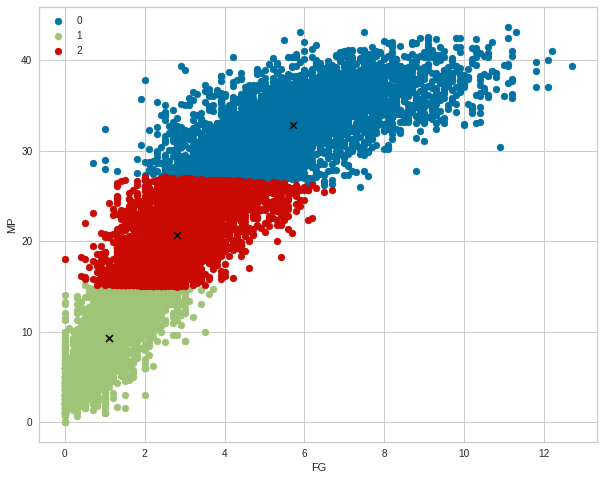

In [ ]:
# visualize cluster
centroids = np.array(clusters_insight1.cluster_centers_)
plt.figure(figsize=(10, 8))
insight1_arr = np.array(insight1)

uniques = np.unique(labels)
for i in uniques:
  plt.scatter(insight1_arr[labels == i , 0], insight1_arr[labels == i , 1], label = i, c=f'C{i}')

plt.xlabel('FG')
plt.ylabel('MP')

plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='k')
plt.legend()
plt.show()

In [ ]:
# compute the cluster sizes
sizes = clusters_insight1_df['cluster'].value_counts()

# plotting the cluster sizes as a pie chart
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', colors=['#676ea0', '#ed6794', '#ffa600'], shadow=True)
plt.title('Persentase Cluster')
plt.axis('equal')
plt.show()

In [ ]:
# show the value counts of each cluster
print(sizes)

1    4950
2    4875
0    4279
Name: cluster, dtype: int64


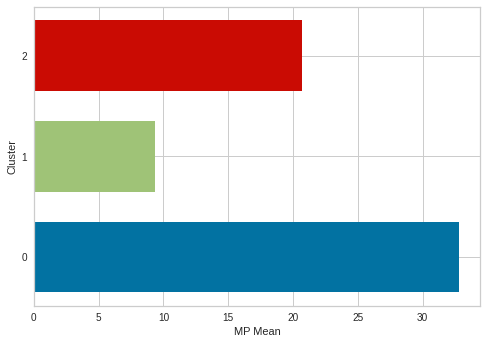

In [ ]:
# create a bar plot of the data, with the clusters as the y-axis labels
fig, ax = plt.subplots()
for i, cluster in enumerate(set(labels)):
    cluster_samples = clusters_insight1_df[labels == cluster]
    mean = cluster_samples['MP'].mean()

    ax.barh(i, mean, height=0.7)

ax.set_yticks(range(len(set(labels))))
ax.set_yticklabels(set(labels))
ax.set_xlabel('MP Mean')
ax.set_ylabel('Cluster')

plt.show()

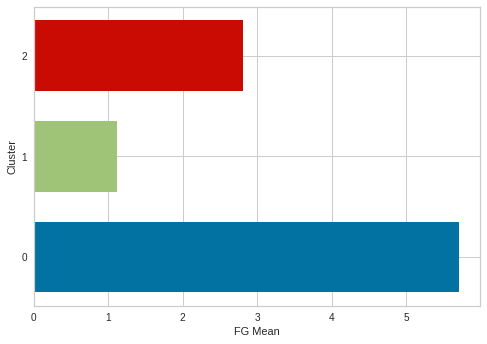

In [ ]:
# create a bar plot of the data, with the clusters as the y-axis labels
fig, ax = plt.subplots()
for i, cluster in enumerate(set(labels)):
    cluster_samples = clusters_insight1_df[labels == cluster]
    mean = cluster_samples['FG'].mean()

    ax.barh(i, mean, height=0.7)

ax.set_yticks(range(len(set(labels))))
ax.set_yticklabels(set(labels))
ax.set_xlabel('FG Mean')
ax.set_ylabel('Cluster')

plt.show()

In [ ]:
# create a pivot table showing the mean of FG and MP for each cluster
table = pd.pivot_table(data=clusters_insight1_df,index='cluster',
                       aggfunc={'FG':np.mean,'MP':np.mean})

print(table)

          FG    MP
cluster           
0       5.71 32.81
1       1.11  9.33
2       2.82 20.67


Dari perhitungan di atas, maka untuk pasangan fitur pertama didapatkan *insight* sebagai berikut (diukur dalam satu pertandingan):

| Cluster          | Players Characteristics    
| ---------------- | ------------
| `Cluster 0`      | Kumpulan player yang memiliki rata-rata jumlah keberhasilan menembak bola ke ring basket dan jumlah waktu bermain yang paling banyak
| `Cluster 1`      | Kumpulan player yang memiliki rata-rata jumlah keberhasilan menembak bola ke ring basket dan jumlah waktu bermain yang paling sedikit
| `Cluster 2`      | Kumpulan player yang memiliki rata-rata jumlah keberhasilan menembak bola ke ring basket dan jumlah waktu  bermain yang kedua terbanyak

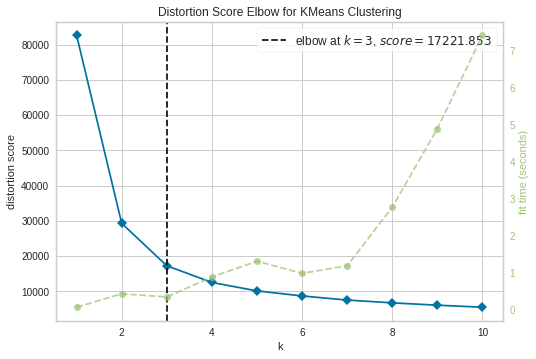

In [ ]:
elbow_method(insight2)

Berdasarkan hasil *plotting* elbow method di atas, didapat jumlah kluster yang optimum adalah 3. Maka dari itu, dibuat 3 kluster menggunakan algoritma kmeans. Setelah itu, ditampilkan visualisasi *plotting* kluster, persentase pembagian kluster, dan nilai rata-rata pada masing-masing fitur.

In [ ]:
# predict the cluster labels
clusters_insight2 = KMeans(n_clusters = 3, random_state=42, init = "k-means++").fit(insight2)
labels = clusters_insight2.predict(insight2)

In [ ]:
clusters_insight2_df = pd.concat([insight2.reset_index(drop=True), pd.DataFrame({'cluster':labels})], axis=1)
clusters_insight2_df

FT   2P  cluster
0     0.60 1.30        2
1     1.30 5.90        0
2     1.00 1.60        2
3     7.00 6.00        1
4     3.10 5.10        1
...    ...  ...      ...
14099 1.60 2.80        0
14100 1.00 5.30        0
14101 7.70 5.60        1
14102 1.80 3.70        0
14103 1.90 3.60        0

[14104 rows x 3 columns]

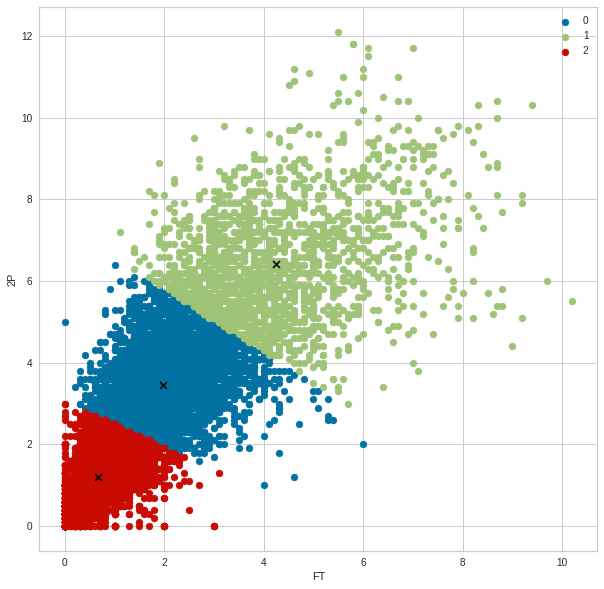

In [ ]:
# visualize cluster
centroids = np.array(clusters_insight2.cluster_centers_)
plt.figure(figsize=(10,10))
insight2_arr = np.array(insight2)

uniques = np.unique(labels)
for i in uniques:
  plt.scatter(insight2_arr[labels == i , 0], insight2_arr[labels == i , 1], label = i, c=f'C{i}')

plt.xlabel('FT')
plt.ylabel('2P')

plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='k')
plt.legend()
plt.show()

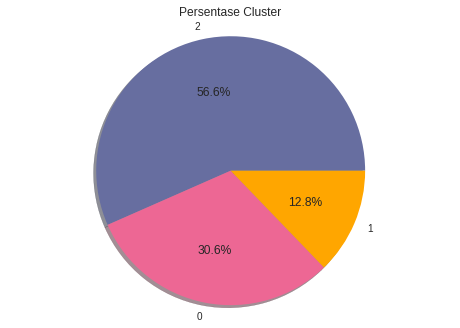

In [ ]:
# compute the cluster sizes
sizes = clusters_insight2_df['cluster'].value_counts()

# plotting the cluster sizes as a pie chart
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', colors=['#676ea0', '#ed6794', '#ffa600'], shadow=True)
plt.title('Persentase Cluster')
plt.axis('equal')
plt.show()

In [ ]:
# show the value counts of each cluster
print(sizes)

2    7983
0    4317
1    1804
Name: cluster, dtype: int64


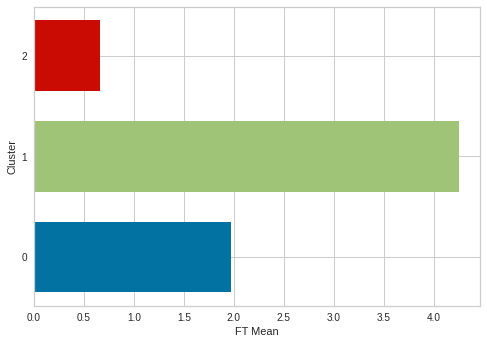

In [ ]:
# create a bar plot of the data, with the clusters as the y-axis labels
fig, ax = plt.subplots()
for i, cluster in enumerate(set(labels)):
    cluster_samples = clusters_insight2_df[labels == cluster]
    mean = cluster_samples['FT'].mean()

    ax.barh(i, mean, height=0.7)

ax.set_yticks(range(len(set(labels))))
ax.set_yticklabels(set(labels))
ax.set_xlabel('FT Mean')
ax.set_ylabel('Cluster')

plt.show()

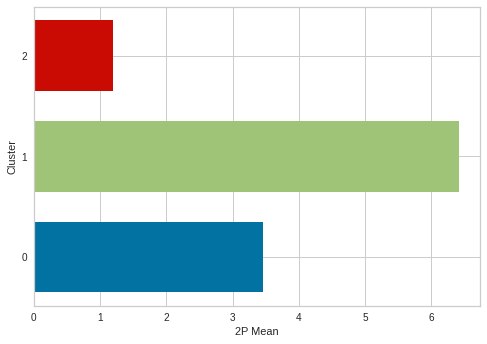

In [ ]:
# create a bar plot of the data, with the clusters as the y-axis labels
fig, ax = plt.subplots()
for i, cluster in enumerate(set(labels)):
    cluster_samples = clusters_insight2_df[labels == cluster]
    mean = cluster_samples['2P'].mean()

    ax.barh(i, mean, height=0.7)

ax.set_yticks(range(len(set(labels))))
ax.set_yticklabels(set(labels))
ax.set_xlabel('2P Mean')
ax.set_ylabel('Cluster')

plt.show()

In [ ]:
# create a pivot table showing the mean of FT and 2P for each cluster
table = pd.pivot_table(data=clusters_insight2_df,index='cluster',
                       aggfunc={'FT':np.mean,'2P':np.mean})

print(table)

          2P   FT
cluster          
0       3.46 1.97
1       6.42 4.25
2       1.19 0.67


Dari perhitungan di atas, maka untuk pasangan fitur kedua didapatkan *insight* sebagai berikut (diukur dalam satu pertandingan):

| Cluster          | Players Characteristics    
| ---------------- | ------------
| `Cluster 0`      | Kumpulan player yang memiliki rata-rata jumlah keberhasilan melakukan tembakan bebas dan tembakan dua poin ke ring basket yang kedua terbanyak  
| `Cluster 1`      | Kumpulan player yang memiliki rata-rata jumlah keberhasilan melakukan tembakan bebas dan tembakan dua poin ke ring basket yang paling banyak
| `Cluster 2`      | Kumpulan player yang memiliki rata-rata jumlah keberhasilan melakukan tembakan bebas dan tembakan dua poin ke ring basket yang paling sedikit

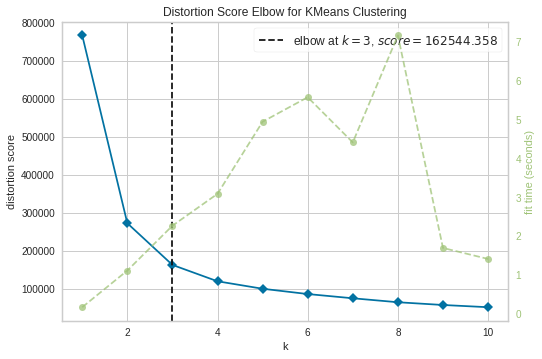

In [ ]:
elbow_method(insight3)

Berdasarkan hasil *plotting* elbow method di atas, didapat jumlah kluster yang optimum adalah 3. Maka dari itu, dibuat 3 kluster menggunakan algoritma kmeans. Setelah itu, ditampilkan visualisasi *plotting* kluster, persentase pembagian kluster, dan nilai rata-rata pada masing-masing fitur.

In [ ]:
# predict the cluster labels
clusters_insight3_3d = KMeans(n_clusters=3, random_state=42, init = "k-means++").fit(insight3)
labels = clusters_insight3_3d.predict(insight3)

In [ ]:
clusters_insight3_df = pd.concat([insight3.reset_index(drop=True), pd.DataFrame({'cluster':labels})], axis=1)
clusters_insight3_df

2PA  3PA   PTS  cluster
0      2.70 0.00  3.10        0
1     13.60 1.50 14.10        2
2      3.10 0.00  4.20        0
3     13.00 8.50 26.50        2
4     10.70 1.00 14.20        1
...     ...  ...   ...      ...
14099  5.50 2.70 10.20        1
14100  9.10 0.70 12.10        1
14101 11.30 6.30 25.30        2
14102  6.20 0.60  9.40        1
14103  5.40 0.10  9.00        1

[14104 rows x 4 columns]

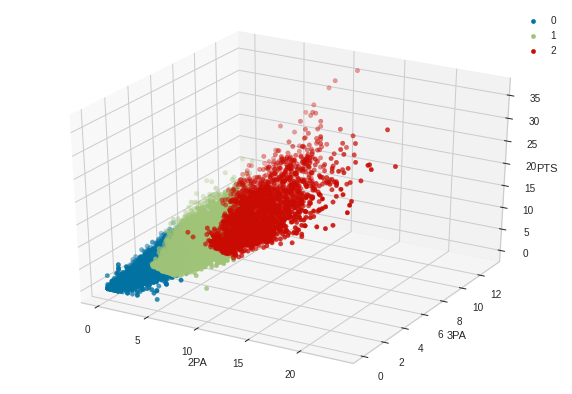

In [ ]:
# create a 3D scatter plot of the data, with the clusters color-coded
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
insight3_arr = np.array(insight3)

uniques = np.unique(labels)
for i in uniques:
  ax.scatter(insight3_arr[labels == i , 0], insight3_arr[labels == i , 1], insight3_arr[labels == i , 2], label = i, cmap='viridis')

ax.set_xlabel('2PA')
ax.set_ylabel('3PA')
ax.set_zlabel('PTS')

plt.legend()
plt.show()

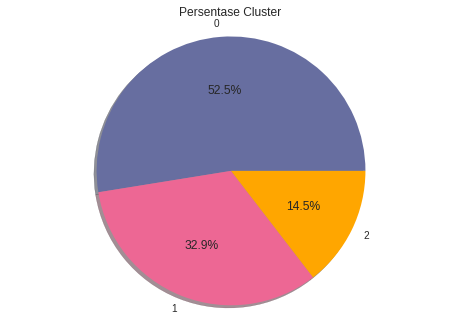

In [ ]:
# compute the cluster sizes
sizes = clusters_insight3_df['cluster'].value_counts()

# plotting the cluster sizes as a pie chart
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', colors=['#676ea0', '#ed6794', '#ffa600'], shadow=True)
plt.title('Persentase Cluster')
plt.axis('equal')
plt.show()

In [ ]:
# show the value counts of each cluster
print(sizes)

0    7411
1    4641
2    2052
Name: cluster, dtype: int64


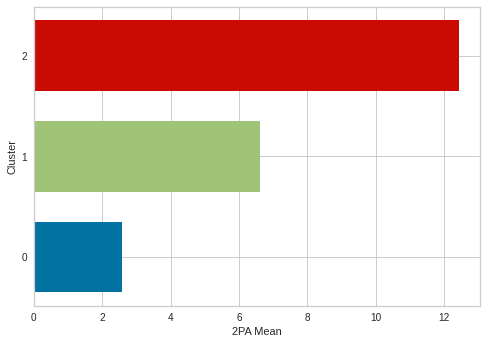

In [ ]:
# create a bar plot of the data, with the clusters as the y-axis labels
fig, ax = plt.subplots()
for i, cluster in enumerate(set(labels)):
    cluster_samples = clusters_insight3_df[labels == cluster]
    mean = cluster_samples['2PA'].mean()

    ax.barh(i, mean, height=0.7)

ax.set_yticks(range(len(set(labels))))
ax.set_yticklabels(set(labels))
ax.set_xlabel('2PA Mean')
ax.set_ylabel('Cluster')

plt.show()

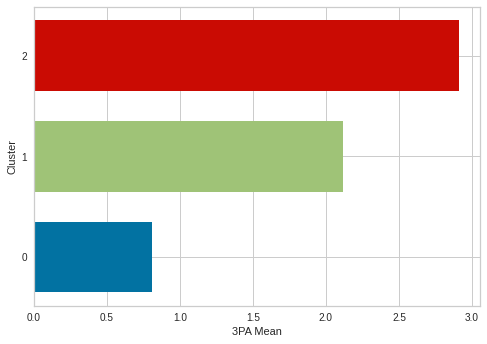

In [ ]:
# create a bar plot of the data, with the clusters as the y-axis labels
fig, ax = plt.subplots()
for i, cluster in enumerate(set(labels)):
    cluster_samples = clusters_insight3_df[labels == cluster]
    mean = cluster_samples['3PA'].mean()

    ax.barh(i, mean, height=0.7)

ax.set_yticks(range(len(set(labels))))
ax.set_yticklabels(set(labels))
ax.set_xlabel('3PA Mean')
ax.set_ylabel('Cluster')

plt.show()

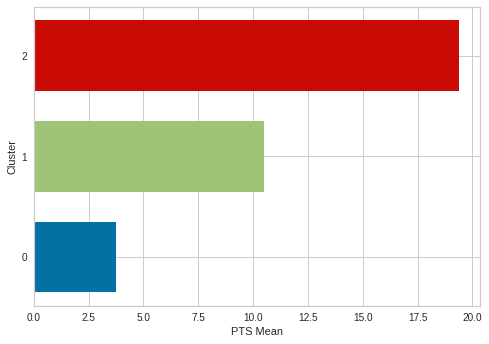

In [ ]:
# create a bar plot of the data, with the clusters as the y-axis labels
fig, ax = plt.subplots()
for i, cluster in enumerate(set(labels)):
    cluster_samples = clusters_insight3_df[labels == cluster]
    mean = cluster_samples['PTS'].mean()

    ax.barh(i, mean, height=0.7)

ax.set_yticks(range(len(set(labels))))
ax.set_yticklabels(set(labels))
ax.set_xlabel('PTS Mean')
ax.set_ylabel('Cluster')

plt.show()

In [ ]:
# create a pivot table showing the mean of 2PA, 3PA, and PTS for each cluster
table = pd.pivot_table(data=clusters_insight3_df,index='cluster',
                       aggfunc={'2PA':np.mean,'3PA':np.mean,'PTS':np.mean})

print(table)

          2PA  3PA   PTS
cluster                 
0        2.57 0.81  3.77
1        6.61 2.12 10.49
2       12.43 2.91 19.39


Dari perhitungan di atas, maka untuk pasangan fitur ketiga didapatkan *insight* sebagai berikut (diukur dalam satu pertandingan):

| Cluster          | Players Characteristics    
| ---------------- | ------------
| `Cluster 0`      | Kumpulan player yang memiliki rata-rata jumlah percobaan melakukan tembakan dua poin dan tiga poin ke ring basket serta mencetak jumlah poin yang paling sedikit  
| `Cluster 1`      | Kumpulan player yang memiliki rata-rata jumlah percobaan melakukan tembakan dua poin dan tiga poin ke ring basket serta mencetak jumlah poin yang kedua terbanyak
| `Cluster 2`      | Kumpulan player yang memiliki rata-rata jumlah percobaan melakukan tembakan dua poin dan tiga poin ke ring basket serta mencetak jumlah poin yang paling banyak

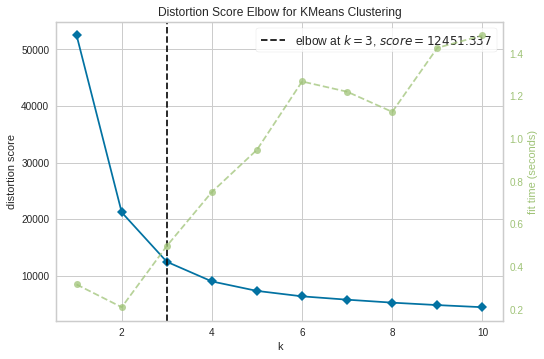

In [ ]:
elbow_method(insight4)

Berdasarkan hasil *plotting* elbow method di atas, didapat jumlah kluster yang optimum adalah 3. Maka dari itu, dibuat 3 kluster menggunakan algoritma kmeans. Setelah itu, ditampilkan visualisasi *plotting* kluster, persentase pembagian kluster, dan nilai rata-rata pada masing-masing fitur.

In [ ]:
# predict the cluster labels
clusters_insight4_3d = KMeans(n_clusters=3, random_state=42, init = "k-means++").fit(insight4)
labels = clusters_insight4_3d.predict(insight4)

In [ ]:
clusters_insight4_df = pd.concat([insight4.reset_index(drop=True), pd.DataFrame({'cluster':labels})], axis=1)
clusters_insight4_df

BLK  STL  DRB  cluster
0     0.30 0.10 1.40        0
1     0.10 0.80 1.30        0
2     0.40 0.40 3.20        2
3     0.10 2.20 3.00        2
4     0.30 0.60 3.10        2
...    ...  ...  ...      ...
14099 0.50 1.60 3.20        2
14100 0.60 1.10 3.80        2
14101 0.20 0.80 3.30        2
14102 0.40 0.60 4.40        2
14103 0.90 0.30 4.60        2

[14104 rows x 4 columns]

In [ ]:
# create a 3D scatter plot of the data, with the clusters color-coded
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
insight4_arr = np.array(insight4)

uniques = np.unique(labels)
for i in uniques:
  ax.scatter(insight4_arr[labels == i , 0], insight4_arr[labels == i , 1], insight4_arr[labels == i , 2], label = i, cmap='viridis')

ax.set_xlabel('BLK')
ax.set_ylabel('STL')
ax.set_zlabel('DRB')

plt.legend()
plt.show()

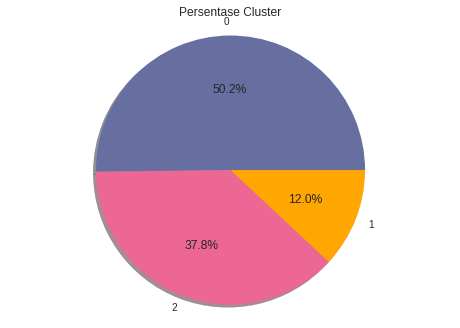

In [ ]:
# compute the cluster sizes
sizes = clusters_insight4_df['cluster'].value_counts()

# plotting the cluster sizes as a pie chart
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', colors=['#676ea0', '#ed6794', '#ffa600'], shadow=True)
plt.title('Persentase Cluster')
plt.axis('equal')
plt.show()

In [ ]:
# show the value counts of each cluster
print(sizes)

0    7080
2    5338
1    1686
Name: cluster, dtype: int64


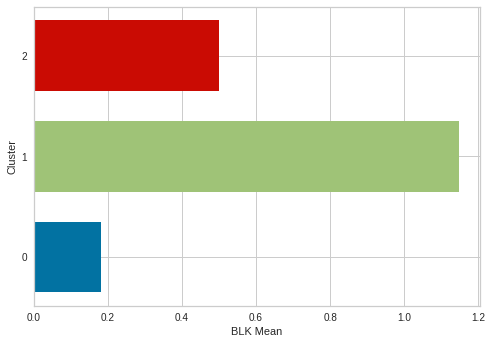

In [ ]:
# create a bar plot of the data, with the clusters as the y-axis labels
fig, ax = plt.subplots()
for i, cluster in enumerate(set(labels)):
    cluster_samples = clusters_insight4_df[labels == cluster]
    mean = cluster_samples['BLK'].mean()

    ax.barh(i, mean, height=0.7)

ax.set_yticks(range(len(set(labels))))
ax.set_yticklabels(set(labels))
ax.set_xlabel('BLK Mean')
ax.set_ylabel('Cluster')

plt.show()

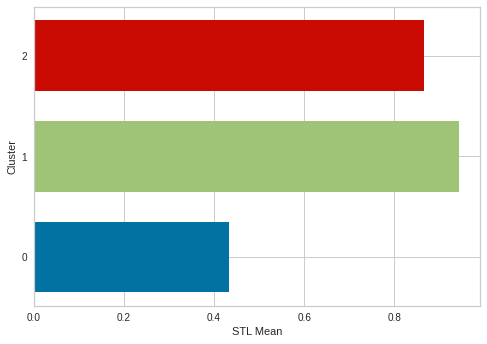

In [ ]:
# create a bar plot of the data, with the clusters as the y-axis labels
fig, ax = plt.subplots()
for i, cluster in enumerate(set(labels)):
    cluster_samples = clusters_insight4_df[labels == cluster]
    mean = cluster_samples['STL'].mean()

    ax.barh(i, mean, height=0.7)

ax.set_yticks(range(len(set(labels))))
ax.set_yticklabels(set(labels))
ax.set_xlabel('STL Mean')
ax.set_ylabel('Cluster')

plt.show()

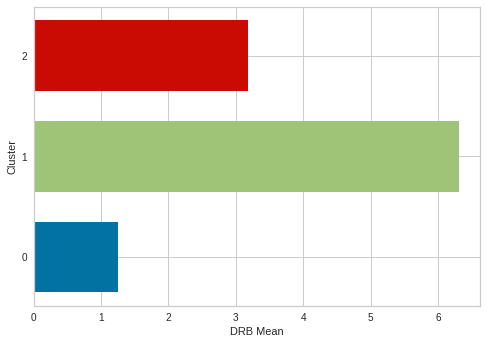

In [ ]:
# create a bar plot of the data, with the clusters as the y-axis labels
fig, ax = plt.subplots()
for i, cluster in enumerate(set(labels)):
    cluster_samples = clusters_insight4_df[labels == cluster]
    mean = cluster_samples['DRB'].mean()

    ax.barh(i, mean, height=0.7)

ax.set_yticks(range(len(set(labels))))
ax.set_yticklabels(set(labels))
ax.set_xlabel('DRB Mean')
ax.set_ylabel('Cluster')

plt.show()

In [ ]:
# create a pivot table showing the mean of BLK, STL, and DRB for each cluster
table = pd.pivot_table(data=clusters_insight4_df,index='cluster',
                       aggfunc={'BLK':np.mean,'STL':np.mean,'DRB':np.mean})

print(table)

         BLK  DRB  STL
cluster               
0       0.18 1.25 0.43
1       1.15 6.31 0.94
2       0.50 3.18 0.87


Dari perhitungan di atas, maka untuk pasangan fitur keempat didapatkan *insight* sebagai berikut (diukur dalam satu pertandingan):

| Cluster          | Players Characteristics    
| ---------------- | ------------
| `Cluster 0`      | Kumpulan player yang memiliki rata-rata jumlah *blocking*, *stealing*, dan mengambil alih bola saat mode defensif yang paling sedikit  
| `Cluster 1`      | Kumpulan player yang memiliki rata-rata jumlah *blocking*, *stealing*, dan mengambil alih bola saat mode defensif yang paling banyak
| `Cluster 2`      | Kumpulan player yang memiliki rata-rata jumlah *blocking*, *stealing*, dan mengambil alih bola saat mode defensif yang kedua terbanyak

> Dari keempat *insight* yang didapatkan, kami melakukan generalisasi menjadi tiga pembagian kluster dengan karakteristik player sebagai berikut:
> >
| Cluster          | Players Type    | Players Characteristics |
| ---------------- | ------------    | ------------ |
| `Cluster 0`      | *Center*          | Player yang memiliki kemampuan mencetak poin yang cukup baik melalui lemparan bebas dan tembakan dua poin. Namun, mereka kurang sering mencoba tembakan tiga poin dan tidak terlalu aktif dalam *blocking*, *stealing*, dan *defensive rebound*.|
| `Cluster 1`      | *Defense*         | Players yang cukup aktif dalam *blocking*, *stealing*, dan *defensive rebound*. Namun, mereka kurang sering mencetak poin melalui lemparan bebas dan tembakan dua poin, tetapi cukup sering mencoba tembakan tiga poin sehingga masih bisa mencetak poin dengan jumlah yang cukup tinggi.|
| `Cluster 2`      |*All-around*    | Players yang memiliki kemampuan mencetak poin yang baik melalui lemparan bebas, tembakan dua poin, dan tembakan tiga poin. Mereka juga cukup aktif dalam *blocking*, *stealing*, dan *defensive rebound*.|

###### 4. **Buatlah model untuk memprediksi seorang pemain masuk kedalam kategori MVP!**

In [ ]:
players_with_mvps_candidate = players.copy()

def is_mvps_candidate(row):
    player_name = row['Player']
    year = row['Year']
    return int(((mvps['Player'] == player_name) & (mvps['Year'] == year)).any())

players_with_mvps_candidate['mvps_candidate'] = players_with_mvps_candidate.apply(is_mvps_candidate, axis=1)
players_with_mvps_candidate

Player Pos  Age   Tm   G  GS    MP   FG   FGA   FG%  ...  \
0          Alaa Abdelnaby  PF   22  POR  43   0  6.70 1.30  2.70 48.15  ...   
1      Mahmoud Abdul-Rauf  PG   21  DEN  67  19 22.50 6.20 15.10 41.06  ...   
2              Mark Acres   C   28  ORL  68   0 19.30 1.60  3.10 51.61  ...   
3           Michael Adams  PG   28  DEN  66  66 35.50 8.50 21.50 39.53  ...   
4            Mark Aguirre  SF   31  DET  78  13 25.70 5.40 11.70 46.15  ...   
...                   ...  ..  ...  ...  ..  ..   ...  ...   ...   ...  ...   
18037        Delon Wright  PG   28  SAC  63  39 27.70 3.80  8.20 46.34  ...   
18040      Thaddeus Young  PF   32  CHI  68  23 24.30 5.40  9.70 55.67  ...   
18041          Trae Young  PG   22  ATL  63  63 33.70 7.70 17.70 43.50  ...   
18042         Cody Zeller   C   28  CHO  48  21 20.90 3.80  6.80 55.88  ...   
18043         Ivica Zubac   C   23  LAC  72  33 22.30 3.60  5.50 65.45  ...   

       TRB   AST  STL  BLK  TOV   PF   PTS  Year                    Team  \
0     2.10  0.30 0.10 0.30 0.50 0.90  3.10  1991  Portland Trail Blazers   
1     1.80  3.10 0.80 0.10 1.60 2.20 14.10  1991          Denver Nuggets   
2     5.30  0.40 0.40 0.40 0.60 3.20  4.20  1991           Orlando Magic   
3     3.90 10.50 2.20 0.10 3.60 2.50 26.50  1991          Denver Nuggets   
4     4.80  1.80 0.60 0.30 1.60 2.70 14.20  1991         Detroit Pistons   
...    ...   ...  ...  ...  ...  ...   ...   ...                     ...   
18037 4.30  4.40 1.60 0.50 1.30 1.20 10.20  2021        Sacramento Kings   
18040 6.20  4.30 1.10 0.60 2.00 2.20 12.10  2021           Chicago Bulls   
18041 3.90  9.40 0.80 0.20 4.10 1.80 25.30  2021           Atlanta Hawks   
18042 6.80  1.80 0.60 0.40 1.10 2.50  9.40  2021       Charlotte Hornets   
18043 7.20  1.30 0.30 0.90 1.10 2.60  9.00  2021    Los Angeles Clippers   

       mvps_candidate  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
18037               0  
18040               0  
18041               0  
18042               0  
18043               0  

[14104 rows x 32 columns]

In [ ]:
players_with_mvps_candidate['mvps_candidate'].value_counts()

0    13630
1      474
Name: mvps_candidate, dtype: int64

Berdasarkan output diatas, terlihat bahwa label 1 jauh (kandidat MVP) jauh lebih sedikit dibandingkan label 0 sehingga data dapat dikatakan imbalance

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(players_with_mvps_candidate.corr(method='pearson'), annot = True)

Menghapus beberapa fitur yang tidak merepresentasikan statistik permainan pemain, seperti nama, posisi, umur, tim, dan tahun. Selain itu butuh di hapus juga beberapa fitur yang sudah di representasikan oleh fitur lain seperti FT%, FG%, 3P%, 2P%, dan TRB.

In [ ]:
players_with_mvps_candidate.drop(['Player', 'Tm', 'Team', 'Pos', 'Age'], axis=1, inplace=True)
players_with_mvps_candidate.drop(['FT%','FG%', '3P%', '2P%', 'TRB'], axis=1, inplace=True)
players_with_mvps_candidate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14104 entries, 0 to 18043
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   G               14104 non-null  int64  
 1   GS              14104 non-null  int64  
 2   MP              14104 non-null  float64
 3   FG              14104 non-null  float64
 4   FGA             14104 non-null  float64
 5   3P              14104 non-null  float64
 6   3PA             14104 non-null  float64
 7   2P              14104 non-null  float64
 8   2PA             14104 non-null  float64
 9   eFG%            14104 non-null  float64
 10  FT              14104 non-null  float64
 11  FTA             14104 non-null  float64
 12  ORB             14104 non-null  float64
 13  DRB             14104 non-null  float64
 14  AST             14104 non-null  float64
 15  STL             14104 non-null  float64
 16  BLK             14104 non-null  float64
 17  TOV             14104 non-null 

In [ ]:
players_with_mvps_candidate.corr()['mvps_candidate'].sort_values()

Year             -0.04
eFG%              0.11
PF                0.14
3P                0.14
3PA               0.14
G                 0.15
ORB               0.17
BLK               0.21
MP                0.30
GS                0.30
STL               0.30
DRB               0.32
AST               0.34
TOV               0.38
FGA               0.40
2PA               0.40
FG                0.42
2P                0.42
PTS               0.44
FT                0.47
FTA               0.47
mvps_candidate    1.00
Name: mvps_candidate, dtype: float64

In [ ]:
players_with_mvps_candidate.corr()['mvps_candidate'].sort_values().plot(kind='bar')

In [ ]:
feature_mvps_candidate = players_with_mvps_candidate.drop('mvps_candidate',axis=1).values
label_mvps_candidate = players_with_mvps_candidate['mvps_candidate'].values

In [ ]:
columns = players_with_mvps_candidate.drop('mvps_candidate',axis=1).columns.tolist()
columns

['G',
 'GS',
 'MP',
 'FG',
 'FGA',
 '3P',
 '3PA',
 '2P',
 '2PA',
 'eFG%',
 'FT',
 'FTA',
 'ORB',
 'DRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'Year']

In [ ]:
from imblearn.over_sampling import ADASYN

# Inisiasi ADASYN
ada = ADASYN(random_state=42)

# Inisiasi SMOTEEN (Undersampling + Oversampling)
smote_enn = SMOTEENN(random_state=42)

# Inisiasi RandomUndersampler dan SMOTE
rus = RandomUnderSampler(sampling_strategy=.35)
smote = SMOTE()

# Aplikasikan ADASYN ke dataset
feature_train_resampled, label_train_resampled = rus.fit_resample(feature_mvps_candidate, label_mvps_candidate)
feature_train_resampled, label_train_resampled = smote.fit_resample(feature_train_resampled, label_train_resampled)
label_train_resampled_check_value = label_train_resampled.copy()
label_train_resampled_check_value = pd.DataFrame({'mvps_candidate': label_train_resampled_check_value})

label_train_resampled_check_value['mvps_candidate'].value_counts()

0    1354
1    1354
Name: mvps_candidate, dtype: int64

In [ ]:
pd.DataFrame(feature_train_resampled, columns=columns)

G    GS    MP   FG   FGA   3P  3PA   2P   2PA  eFG%  ...  FTA  ORB  \
0    63.00  6.00 12.30 0.90  2.10 0.00 0.10 0.90  2.00 42.86  ... 0.20 0.30   
1    21.00  0.00  4.50 0.40  1.20 0.00 0.00 0.40  1.20 33.33  ... 0.30 0.60   
2    19.00  0.00  4.40 0.40  1.40 0.20 0.70 0.30  0.70 42.86  ... 0.50 0.30   
3    13.00  0.00  6.30 0.80  1.60 0.00 0.00 0.80  1.60 50.00  ... 1.20 0.50   
4    50.00 21.00 22.60 2.00  5.30 0.80 1.90 1.20  3.30 58.79  ... 1.60 0.40   
...    ...   ...   ...  ...   ...  ...  ...  ...   ...   ...  ...  ...  ...   
2703 72.91 72.91 36.71 9.79 18.74 2.19 5.74 7.65 12.96 71.27  ... 7.04 0.92   
2704 72.88  7.56 31.30 6.91 12.67 0.24 0.66 6.67 12.00 73.15  ... 4.61 2.26   
2705 54.92 54.92 38.95 8.53 18.84 1.75 4.71 6.78 14.04 62.74  ... 8.57 4.07   
2706 73.00 73.00 36.33 8.54 19.76 2.43 7.26 6.11 12.45 59.62  ... 6.86 1.11   
2707 80.33 80.33 34.68 8.57 15.57 0.00 0.00 8.55 15.57 55.04  ... 5.03 2.43   

      DRB  AST  STL  BLK  TOV   PF   PTS    Year  
0    1.00 0.70 0.20 0.00 0.30 1.40  2.00 2008.00  
1    0.60 0.00 0.00 0.10 0.10 0.90  0.90 2010.00  
2    0.90 0.00 0.30 0.00 0.20 0.40  1.50 2016.00  
3    1.30 0.20 0.10 0.30 0.40 0.80  2.50 2011.00  
4    1.40 3.90 1.20 0.00 1.50 1.90  5.90 1999.00  
...   ...  ...  ...  ...  ...  ...   ...     ...  
2703 7.46 6.69 1.09 0.93 3.77 1.85 27.38 2016.46  
2704 5.80 2.71 0.56 1.45 2.22 3.18 17.95 1991.41  
2705 9.32 1.99 0.95 0.62 2.37 2.81 25.58 2012.00  
2706 6.28 8.43 1.46 0.44 3.56 2.40 25.12 2018.45  
2707 7.87 2.72 1.07 0.73 2.67 3.55 20.87 2008.17  

[2708 rows x 21 columns]

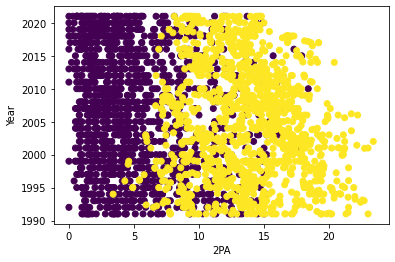

In [ ]:
data_resample = pd.DataFrame(feature_train_resampled, columns=columns)
plt.scatter(data_resample['2PA'], data_resample['Year'], c=label_train_resampled)
plt.xlabel('2PA')
plt.ylabel('Year')
plt.show()

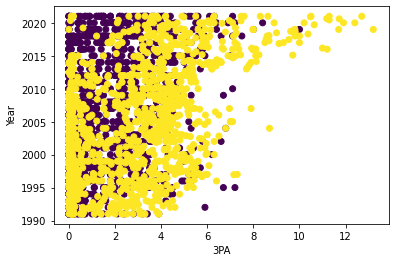

In [ ]:
data_resample = pd.DataFrame(feature_train_resampled, columns=columns)
plt.scatter(data_resample['3PA'], data_resample['Year'], c=label_train_resampled)
plt.xlabel('3PA')
plt.ylabel('Year')
plt.show()

In [ ]:
data_resample = pd.DataFrame(feature_train_resampled, columns=columns)
plt.scatter(data_resample['FGA'], data_resample['Year'], c=label_train_resampled)
plt.xlabel('FGA')
plt.ylabel('Year')
plt.show()

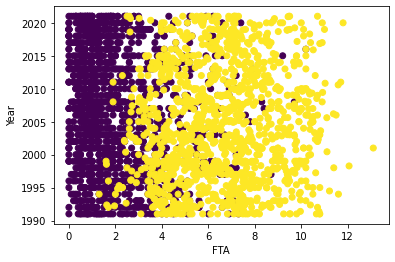

In [ ]:
data_resample = pd.DataFrame(feature_train_resampled, columns=columns)
plt.scatter(data_resample['FTA'], data_resample['Year'], c=label_train_resampled)
plt.xlabel('FTA')
plt.ylabel('Year')
plt.show()

In [ ]:
feature_mvps_candidate = pd.DataFrame(
    feature_mvps_candidate,
    columns=columns
  ).drop('Year', axis=1)
feature_mvps_candidate

G    GS    MP   FG   FGA   3P  3PA   2P   2PA  eFG%   FT  FTA  ORB  \
0     43.00  0.00  6.70 1.30  2.70 0.00 0.00 1.30  2.70 48.15 0.60 1.00 0.60   
1     67.00 19.00 22.50 6.20 15.10 0.40 1.50 5.90 13.60 54.39 1.30 1.50 0.50   
2     68.00  0.00 19.30 1.60  3.10 0.00 0.00 1.60  3.10 51.61 1.00 1.50 2.10   
3     66.00 66.00 35.50 8.50 21.50 2.50 8.50 6.00 13.00 54.24 7.00 8.00 0.90   
4     78.00 13.00 25.70 5.40 11.70 0.30 1.00 5.10 10.70 61.15 3.10 4.10 1.70   
...     ...   ...   ...  ...   ...  ...  ...  ...   ...   ...  ...  ...  ...   
14099 63.00 39.00 27.70 3.80  8.20 1.00 2.70 2.80  5.50 64.86 1.60 2.00 1.00   
14100 68.00 23.00 24.30 5.40  9.70 0.20 0.70 5.30  9.10 69.96 1.00 1.70 2.50   
14101 63.00 63.00 33.70 7.70 17.70 2.20 6.30 5.60 11.30 60.96 7.70 8.70 0.60   
14102 48.00 21.00 20.90 3.80  6.80 0.10 0.60 3.70  6.20 64.22 1.80 2.50 2.50   
14103 72.00 33.00 22.30 3.60  5.50 0.00 0.10 3.60  5.40 65.45 1.90 2.40 2.60   

       DRB   AST  STL  BLK  TOV   PF   PTS  
0     1.40  0.30 0.10 0.30 0.50 0.90  3.10  
1     1.30  3.10 0.80 0.10 1.60 2.20 14.10  
2     3.20  0.40 0.40 0.40 0.60 3.20  4.20  
3     3.00 10.50 2.20 0.10 3.60 2.50 26.50  
4     3.10  1.80 0.60 0.30 1.60 2.70 14.20  
...    ...   ...  ...  ...  ...  ...   ...  
14099 3.20  4.40 1.60 0.50 1.30 1.20 10.20  
14100 3.80  4.30 1.10 0.60 2.00 2.20 12.10  
14101 3.30  9.40 0.80 0.20 4.10 1.80 25.30  
14102 4.40  1.80 0.60 0.40 1.10 2.50  9.40  
14103 4.60  1.30 0.30 0.90 1.10 2.60  9.00  

[14104 rows x 20 columns]

In [ ]:
feature_mvps_candidate = feature_mvps_candidate.values

In [ ]:
feature_train, feature_test, label_train, label_test = train_test_split(
    feature_mvps_candidate,
    label_mvps_candidate,
    test_size=0.008,
    random_state=42,
    stratify=label_mvps_candidate
  )

melakukan sintetik data untuk mendapatkan hasil yang optimal, melihat data label imbalance.

In [ ]:
from imblearn.over_sampling import ADASYN

# Inisiasi ADASYN
ada = ADASYN(random_state=42)

# Inisiasi SMOTEEN (Undersampling + Oversampling)
smote_enn = SMOTEENN(random_state=42)

# Inisiasi RandomUndersampler dan SMOTE
rus = RandomUnderSampler(sampling_strategy=.18)
smote = SMOTE()

# Aplikasikan ADASYN ke dataset
feature_train_resampled, label_train_resampled = rus.fit_resample(feature_train, label_train)
feature_train_resampled, label_train_resampled = smote.fit_resample(feature_train_resampled, label_train_resampled)
label_train_resampled_check_value = label_train_resampled.copy()
label_train_resampled_check_value = pd.DataFrame({'mvps_candidate': label_train_resampled_check_value})

label_train_resampled_check_value['mvps_candidate'].value_counts()

0    2611
1    2611
Name: mvps_candidate, dtype: int64

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(20,)),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['acc']
  )

# Train the Model
r = model.fit(
    feature_train_resampled,
    y=label_train_resampled,
    epochs=20,
    validation_data=(feature_test,label_test)
)

Epoch 1/20
164/164 [==============================] - 1s 3ms/step - loss: 2.7673 - acc: 0.6375 - val_loss: 0.5177 - val_acc: 0.3628
Epoch 2/20
164/164 [==============================] - 0s 3ms/step - loss: 0.6098 - acc: 0.6737 - val_loss: 0.5238 - val_acc: 0.3805
Epoch 3/20
164/164 [==============================] - 0s 2ms/step - loss: 0.5055 - acc: 0.6903 - val_loss: 0.5047 - val_acc: 0.4336
Epoch 4/20
164/164 [==============================] - 0s 3ms/step - loss: 0.4831 - acc: 0.7518 - val_loss: 0.4892 - val_acc: 0.7168
Epoch 5/20
164/164 [==============================] - 0s 2ms/step - loss: 0.4444 - acc: 0.7777 - val_loss: 0.4457 - val_acc: 0.7788
Epoch 6/20
164/164 [==============================] - 2s 11ms/step - loss: 0.4331 - acc: 0.7849 - val_loss: 0.4138 - val_acc: 0.8142
Epoch 7/20
164/164 [==============================] - 1s 6ms/step - loss: 0.4196 - acc: 0.8005 - val_loss: 0.3968 - val_acc: 0.8319
Epoch 8/20
164/164 [==============================] - 0s 2ms/step - loss: 0

In [ ]:
print("Train score:", model.evaluate(feature_train_resampled, label_train_resampled))

164/164 [==============================] - 1s 3ms/step - loss: 0.2239 - acc: 0.9104
Train score: [0.22391590476036072, 0.91037917137146]


In [ ]:
print("Test score:", model.evaluate(feature_test, label_test))

4/4 [==============================] - 0s 7ms/step - loss: 0.2433 - acc: 0.8496
Test score: [0.24334914982318878, 0.8495575189590454]


In [ ]:
train_predictions_baseline = model.predict(feature_train)
test_predictions_baseline = model.predict(feature_test)

4/4 [==============================] - 0s 4ms/step


In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print('(False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print('(True Positives): ', cm[1][1])

4/4 [==============================] - 0s 4ms/step - loss: 0.2433 - acc: 0.8496
loss :  0.24334914982318878
acc :  0.8495575189590454

(True Negatives):  94
(False Positives):  15
(False Negatives):  2
(True Positives):  2


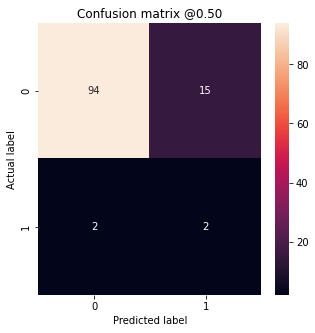

In [ ]:
baseline_results = model.evaluate(feature_test, label_test)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(label_test, test_predictions_baseline)

Hasil dari penggunaan Tensorflow dengan tambahan oversampling dan undersampling tidak menghasilkan model yang baik dan bagus, serta sangat tidak akurat. Oleh karena itu akan dicoba pendekatan lain untuk model kasus soal ini

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
score = cross_val_score(lgb.LGBMClassifier(),feature_train_resampled, label_train_resampled, cv = kf, scoring="accuracy")
print(f'Scores for each fold: {score}')
print(np.mean(score))

Scores for each fold: [0.97129187 0.96842105 0.98084291 0.9789272  0.96934866]
0.9737663385213293


In [ ]:
clf = lgb.LGBMClassifier()
clf.fit(feature_train_resampled, label_train_resampled,)

LGBMClassifier()

In [ ]:
label_pred=clf.predict(feature_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(label_test, label_pred)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy))

LightGBM Model accuracy score: 0.9381


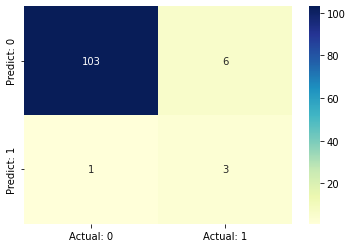

In [ ]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test, label_pred)
cm_matrix = pd.DataFrame(
    data=cm,
    columns=['Actual: 0', 'Actual: 1'],
    index=['Predict: 0', 'Predict: 1']
  )
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_test, label_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       109
           1       0.33      0.75      0.46         4

    accuracy                           0.94       113
   macro avg       0.66      0.85      0.71       113
weighted avg       0.97      0.94      0.95       113



**Kesimpulan**

Dari hasil evaluasi matriks di kedua model, hasil evaluasi masih jauh dari kata baik, tapi based on data yang kita punya, angka persisi dari hasil tersebut adalah angka yang paling realistis untuk di capai. Hal ini karena terdapat ketimpangan yang cukup besar antara label candidate mvps dan tidak itu sendiri. awalnya majority sebesar 13000 data dan minority 400 data. Selain itu tedapat ketimpangan juga pada data pemain mvps pertahun dikarenakan cara bermain yang berkembang setiap tahun nya, dan penentuan mvps sendiri tidak menjadi hal utama ditentukan oleh kualitas bermain suatu pemain, melibihi dilihat dari hasil vote para pengamat dan jurnalis basket.

Sangat disayangkan kami mengharapkan nilai persisi dari prediksi mvps yang lebih besar, yaitu di angka 0,4 - 0,6. Namun hasil model hanya menunjukkan pada angka persisi 0,33. menurut kami hal ini dapat di tingkatkan dan kami mengharapkan masukan dan bimbingan lebih lanjut untuk menentukan nilai persisi yang baik dari tim dosen dan asdos sendiri.